In [3]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from JSAnimation import IPython_display
from matplotlib import animation

Populating the interactive namespace from numpy and matplotlib


In [4]:
class Planeta:
    step=0
    area_blanca = []
    area_negra =[]
    def __init__(self,plantas, albedo_f, luminosidad, prop_fertil = 0.98, q = 15, boltz = 5.67e-8):
        self.blanca = plantas[0]
        self.negra = plantas[1]       
        self.albedo_f = albedo_f
        self.luminosidad = luminosidad
        self.boltz = boltz
        self.albedo_p = None
        self.temp_g = None
        self.q = q
        self.prop_fertil = prop_fertil
        self.step = 0
        
    def actualiza_temp_g(self):
        self.temp_g = ((self.luminosidad[self.step]/(self.boltz))*(1 - self.albedo_p))**0.25 
        #print self.temp_g
    
    def actualiza_albedo_p(self):
        self.prop_fertil = 1 - self.blanca.prop_area - self.negra.prop_area
        self.albedo_p = self.blanca.prop_area * self.blanca.albedo + self.negra.prop_area * self.negra.albedo + self.prop_fertil * self.albedo_f
        #print self.albedo_p
        
    def vivir(self):
        for i in self.luminosidad:
            self.actualiza_albedo_p()
            self.actualiza_temp_g()
            self.blanca.actualizar(self)
            self.negra.actualizar(self)
            self.area_blanca.append(blanca.prop_area)
            self.area_negra.append(negra.prop_area)
            self.step += 1
        
        
    def iam(self):
        print "TEMPERATUA GLOBAL: " + str(self.temp_g) + " ALBEDO GLOBAL: " + str(self.albedo_p)
        print "PROPORCION FERTIL: " + str(self.prop_fertil)
        print "STEP " + str(self.step)
        print "AREA NEGRAS " + str(len(self.area_negra))
        for i in self.area_negra:
            print i
        print "AREAS BLANCAS:" + str(len(self.area_blanca))
        for i in self.area_blanca:
            print i
        
        
    def grafica(self):
        plt.plot(self.luminosidad,self.area_blanca)
        plt.plot(self.luminosidad,self.area_negra)
    
    
    
   

In [5]:
class Planta:
    dif_area =0
    temp_l=0
    tasa_cre = 0
    def __init__(self,color, albedo, prop_area = 0.01, tasa_muerte = 0.1
               ,superior = 313, inferior = 278):
        self.color = color
        self.albedo = albedo
        self.prop_area = prop_area
        self.tasa_muerte = tasa_muerte
        self.superior = superior
        self.inferior = inferior
        

        
    def actualiza_temp_l(self, mundo):
        self.temp_l = mundo.q * (mundo.albedo_p - self.albedo) + mundo.temp_g
        #print self.color + " : " + str(self.temp_l)
        
    def actualiza_taza_cre(self):
        if self.temp_l > self.inferior and self.temp_l < self.superior :
            self.tasa_cre = (self.temp_l - self.inferior) * (self.superior - self.temp_l) * 4 / (self.inferior -self.superior)**2
            #print "TASA DE CRECIMIENTO "+ str(self.tasa_cre)
        else:
            self.tasa_cre = 0
                
            
    def actualiza_area(self,mundo):
        self.dif_area = self.prop_area*(self.tasa_cre * mundo.prop_fertil - self.tasa_muerte)
        #print "El difrencial de area" + str(self.dif_area)
        self.prop_area = self.prop_area  + self.dif_area
        if self.prop_area <= 0.01:
            self.prop_area = 0.01
        if self.prop_area >= .99:
            self.prop_area = .99

    def actualizar(self,mundo):
        self.actualiza_temp_l(mundo)
        self.actualiza_taza_cre()
        self.actualiza_area(mundo)
    
    def iam(self):
        print "COLOR: " + self.color + " ALBEDO: " + str(self.albedo)
        print "TASA DE MUERTE: " + str(self.tasa_muerte) + " TASA DE CRECIMIENTO: " + str(self.tasa_cre)
        print "TEMPERATURA LOCAL:" + str(self.temp_l) 
        print "AREA " + str(self.prop_area)
        

In [6]:
negra = Planta("negra",.25)
blanca = Planta("blanca",.75)
luminosidad = np.linspace(.6,1.8,100)
luminosidad *=1000
plantas = [negra,blanca]
primer_intento = Planeta(plantas, 0.5,luminosidad)
primer_intento.vivir()

In [7]:
area_blanca= np.array(primer_intento.area_blanca)*100
area_blanca = np.round(area_blanca).astype(int)

In [8]:
area_blanca

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  4,  6,  7,
        8,  9, 10, 12, 14, 16, 19, 22, 25, 28, 32, 35, 38, 41, 43, 45, 47,
       48, 50, 51, 53, 54, 55, 56, 57, 59, 60, 61, 62, 63, 64, 65, 66, 66,
       67, 68, 69, 70, 70, 71, 72, 72, 73, 74, 74, 75, 76, 76, 77, 77, 78,
       78, 79, 79, 79, 80, 80, 81, 81, 81, 82, 82, 82, 82, 82, 83, 83, 83,
       83, 83, 82, 82, 82, 81, 79, 77, 73, 65, 59, 53, 48, 43, 39])

In [9]:
area_negra= np.array(primer_intento.area_negra)*100
area_negra = np.round(area_negra).astype(int)

In [10]:
area_negra

array([ 1,  1,  1,  1,  1,  1,  1,  2,  3,  4,  7, 12, 20, 34, 50, 61, 63,
       62, 59, 57, 55, 52, 50, 49, 47, 46, 45, 45, 44, 43, 42, 41, 40, 39,
       37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 22,
       21, 20, 19, 18, 18, 17, 16, 16, 15, 15, 14, 13, 13, 12, 12, 11, 11,
       10, 10,  9,  9,  8,  8,  7,  7,  7,  6,  6,  5,  5,  5,  4,  4,  4,
        3,  3,  3,  2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1])

In [11]:
area_fertil = np.ones(100)*100 - area_blanca - area_negra
area_fertil = area_fertil.astype(int)

In [12]:
area_fertil

array([98, 98, 98, 98, 98, 98, 98, 97, 96, 95, 92, 87, 78, 63, 46, 33, 30,
       30, 32, 33, 33, 34, 34, 32, 31, 29, 27, 23, 21, 19, 17, 16, 15, 14,
       15, 14, 14, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 12, 12, 11, 12, 11, 12, 11,
       12, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       14, 14, 15, 16, 16, 17, 19, 21, 26, 34, 40, 46, 51, 56, 60])

In [13]:
def obtener_posiciones(area_negra,area_blanca,area_fertil,step):
    negras = area_negra[step]
    blancas = area_blanca[step]
    fertil = 100-negras-blancas
    posiciones = [(i+.5,j+.5) for i in range(0,10)for j in range(0,10)]
    po_neg=[]
    for i in  range(negras): 
        n = np.random.choice(100-i)
        po_neg.append(posiciones.pop(n))  
    po_blan = []
    k = 100-negras
    for i in  range(blancas):
        n = np.random.choice(k-i)
        po_blan.append(posiciones.pop(n))
    return po_neg,po_blan,posiciones


In [14]:
obtener_posiciones(area_negra,area_blanca,area_fertil,99);

In [15]:
pos = obtener_posiciones(area_negra,area_blanca,area_fertil,0)

In [16]:
[pos[0][i] for i in range(len(pos[0]))];

In [22]:
[pos[1][i] for i in range(len(pos[1]))];


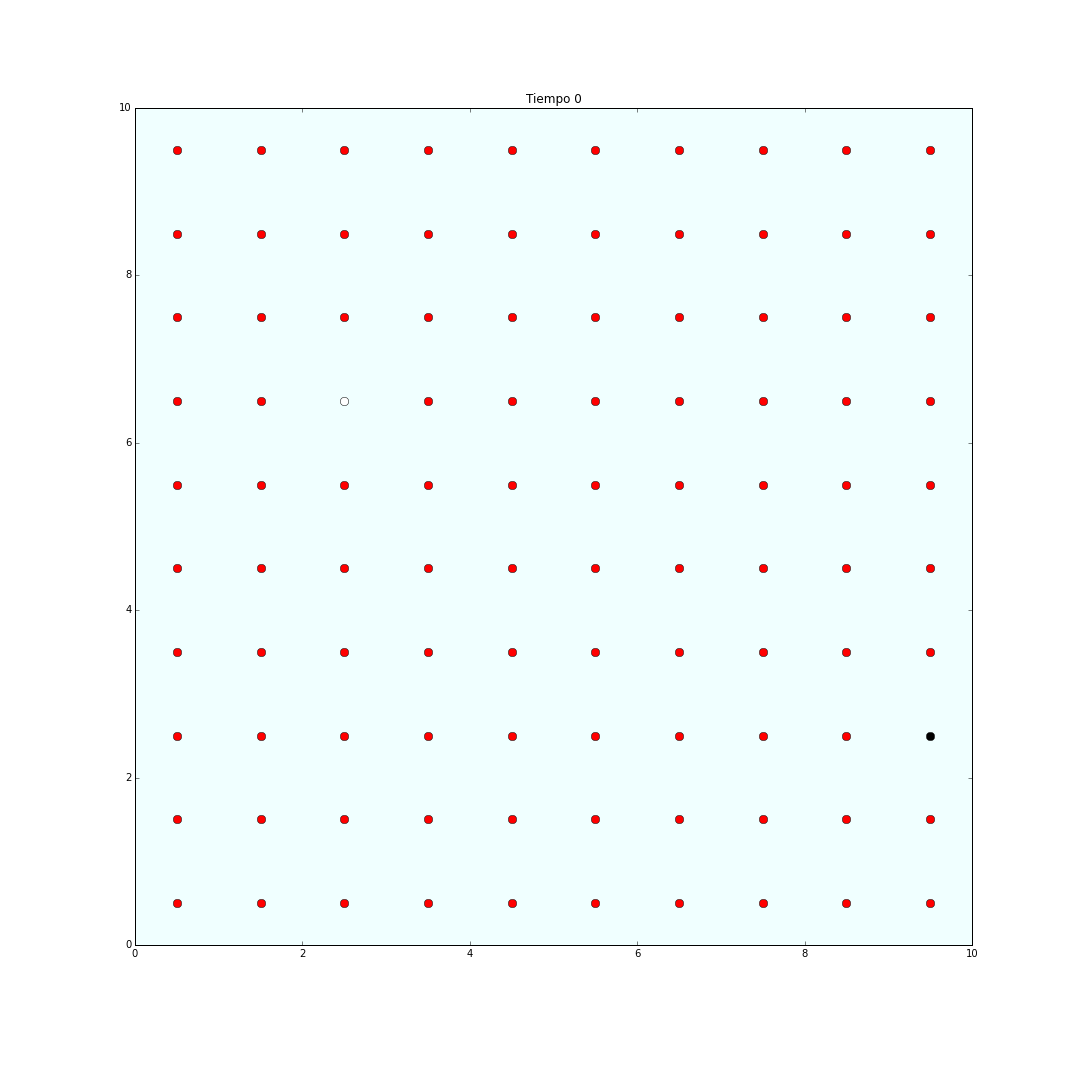
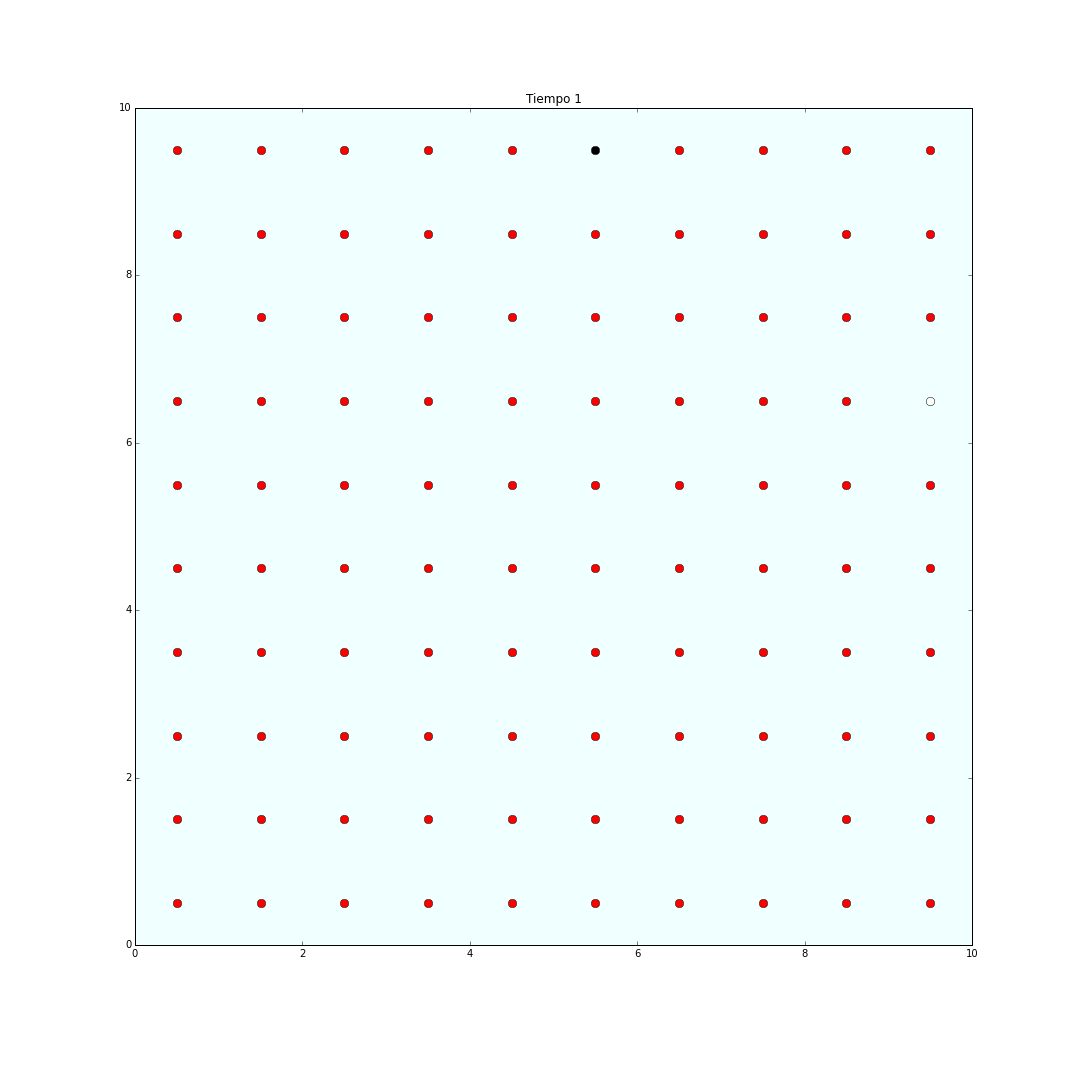
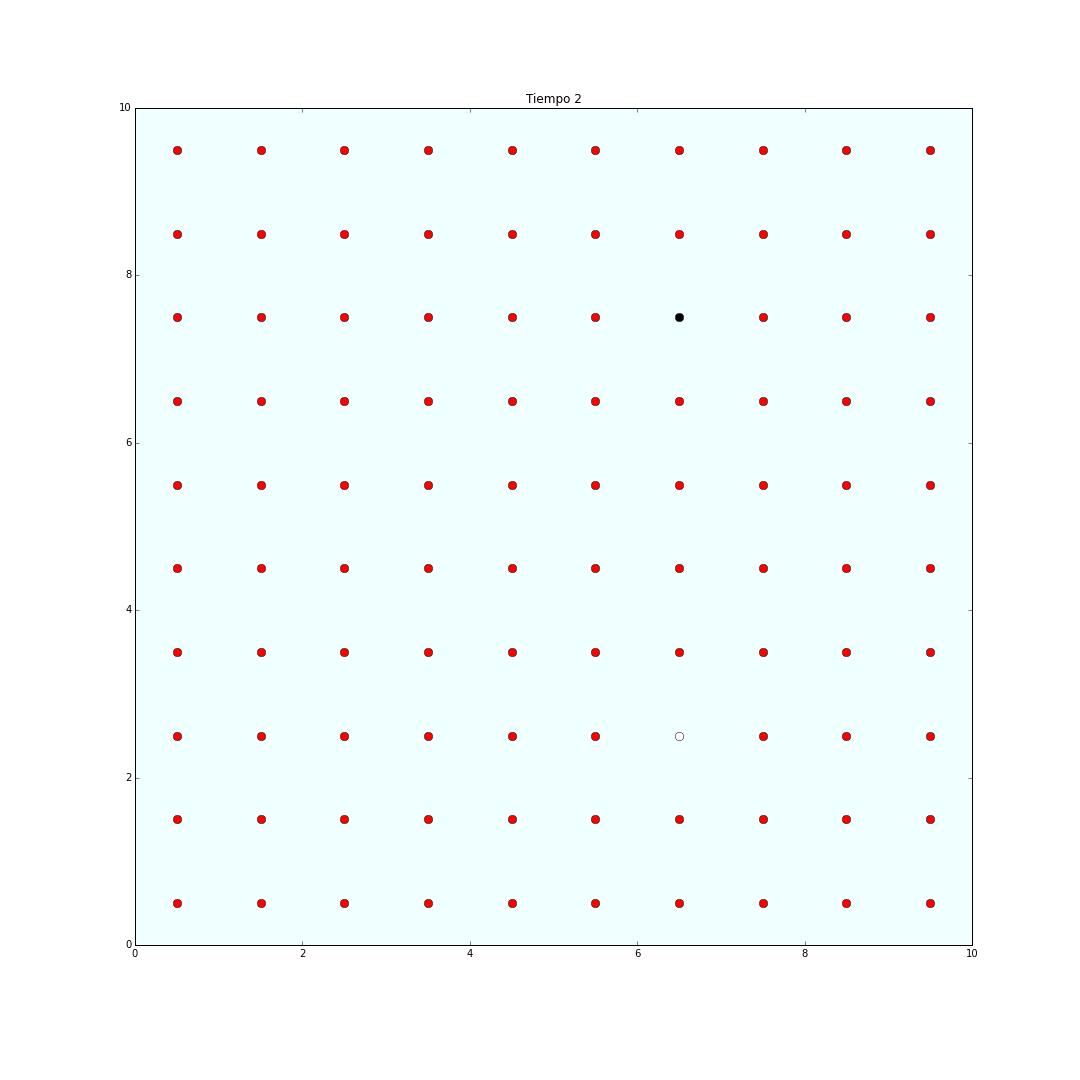
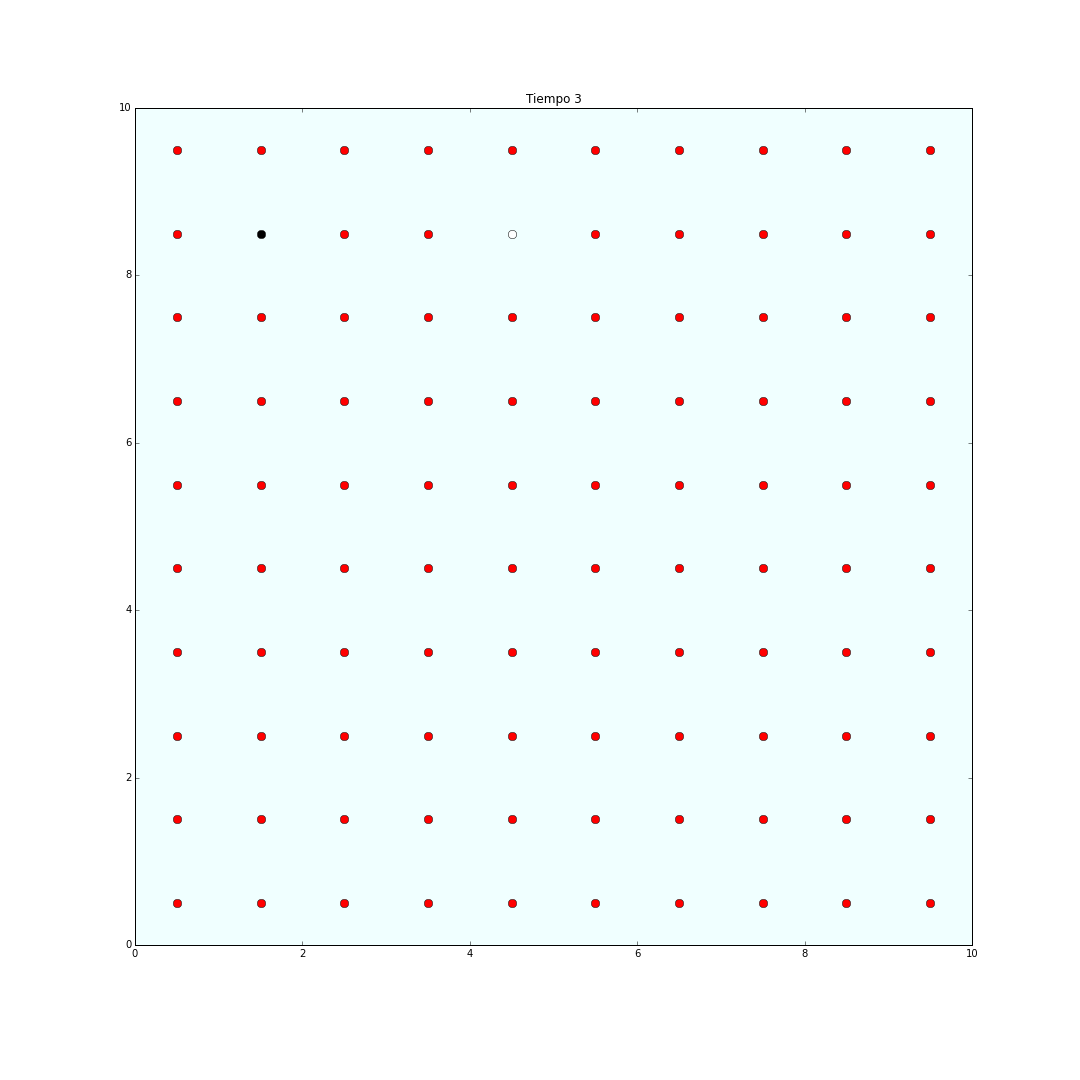
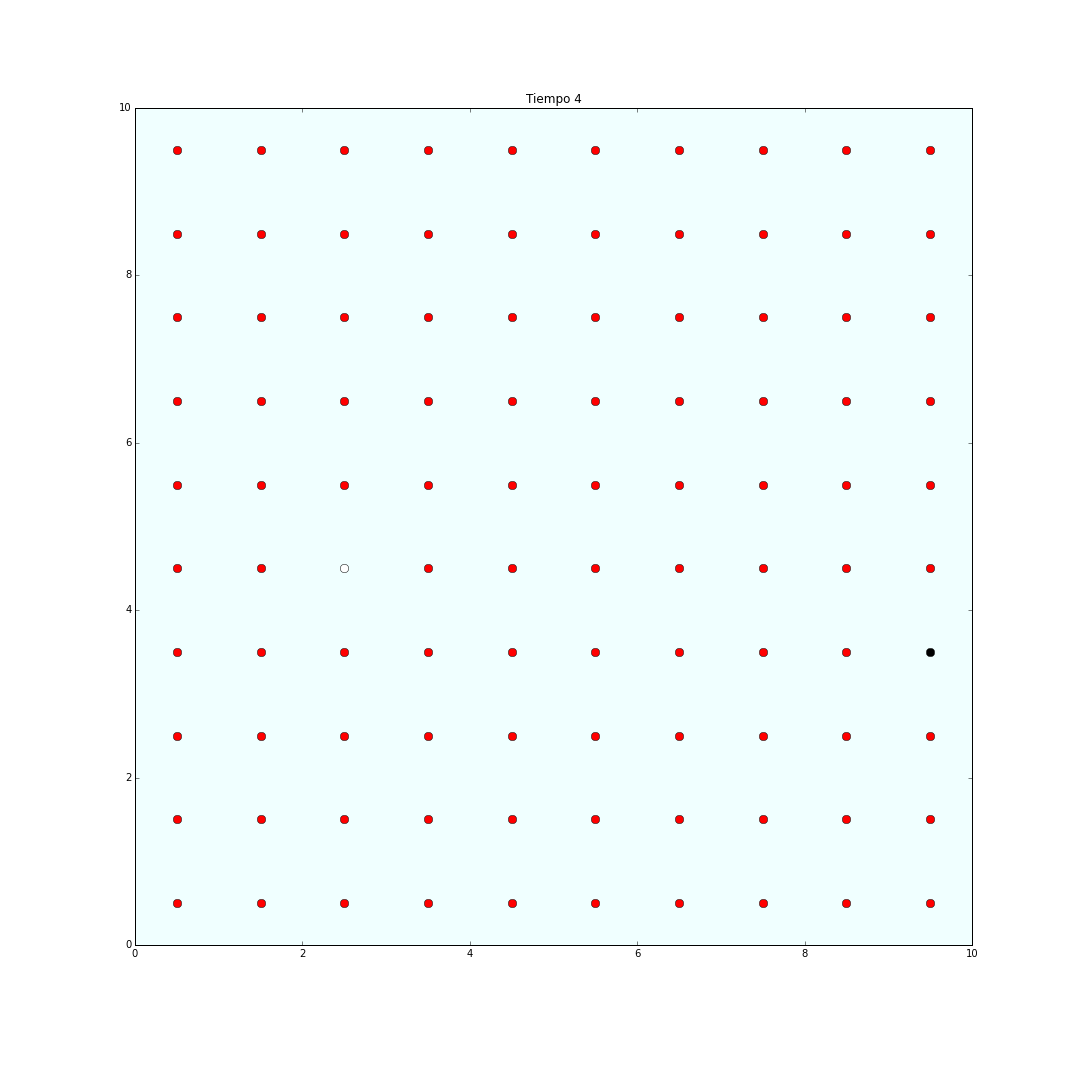
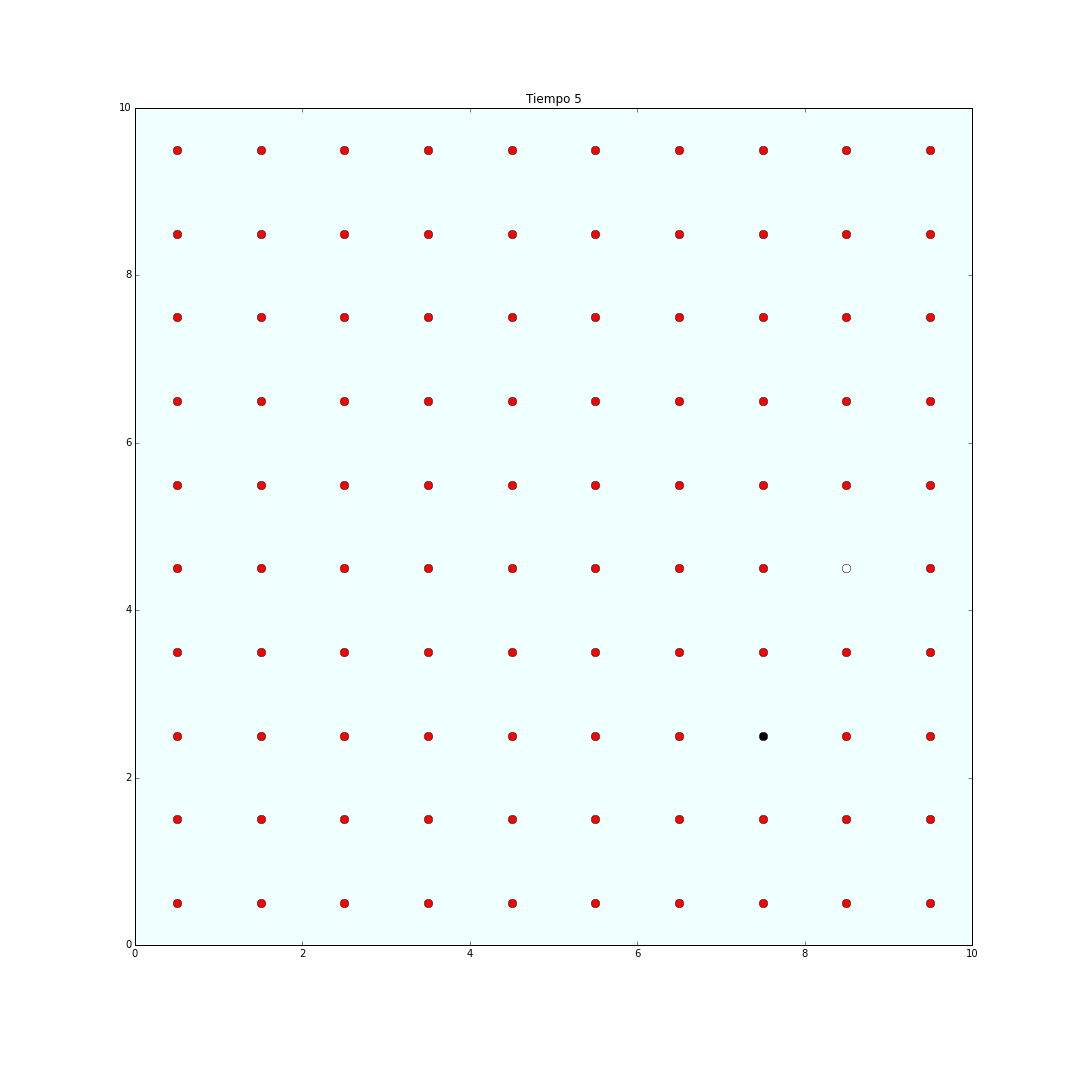
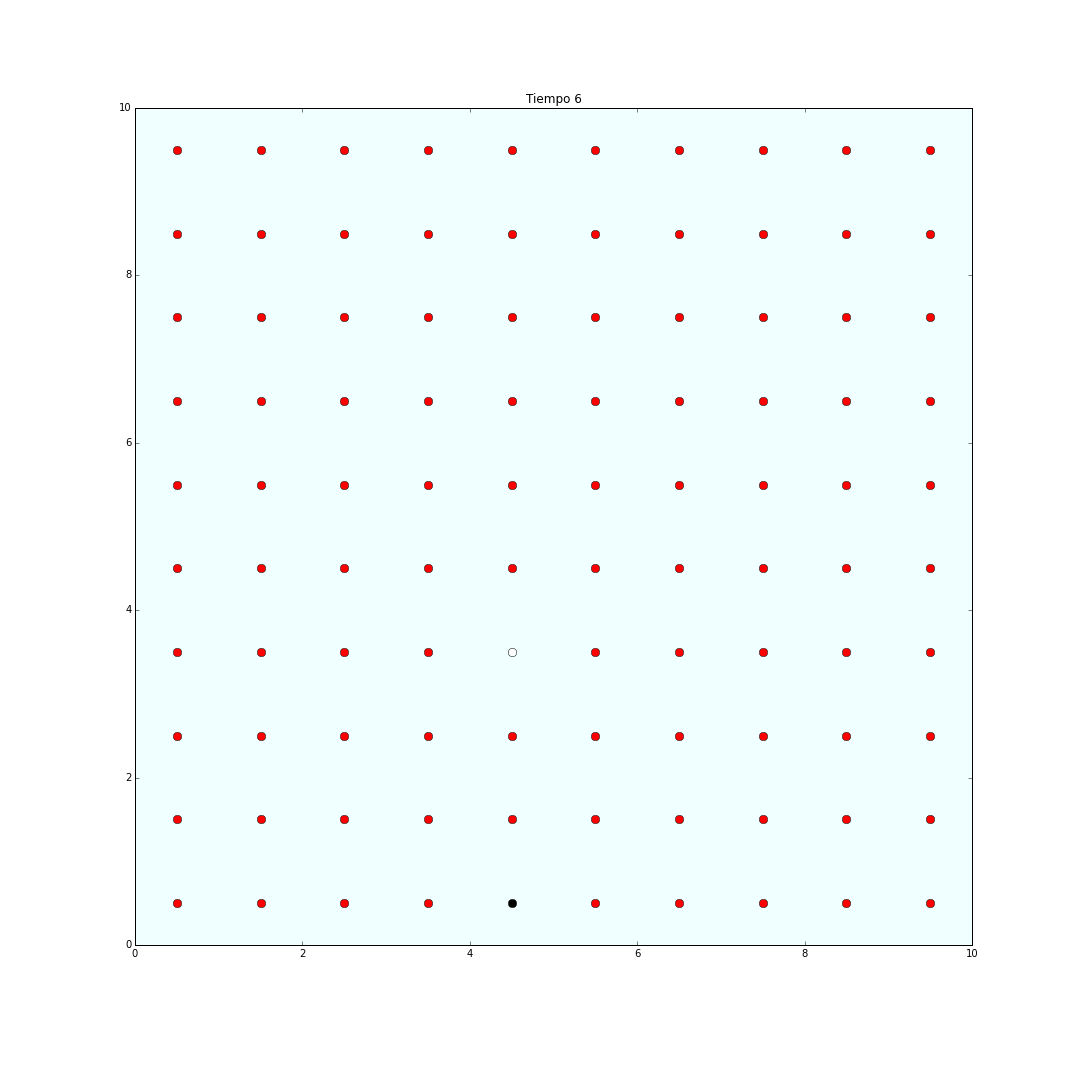
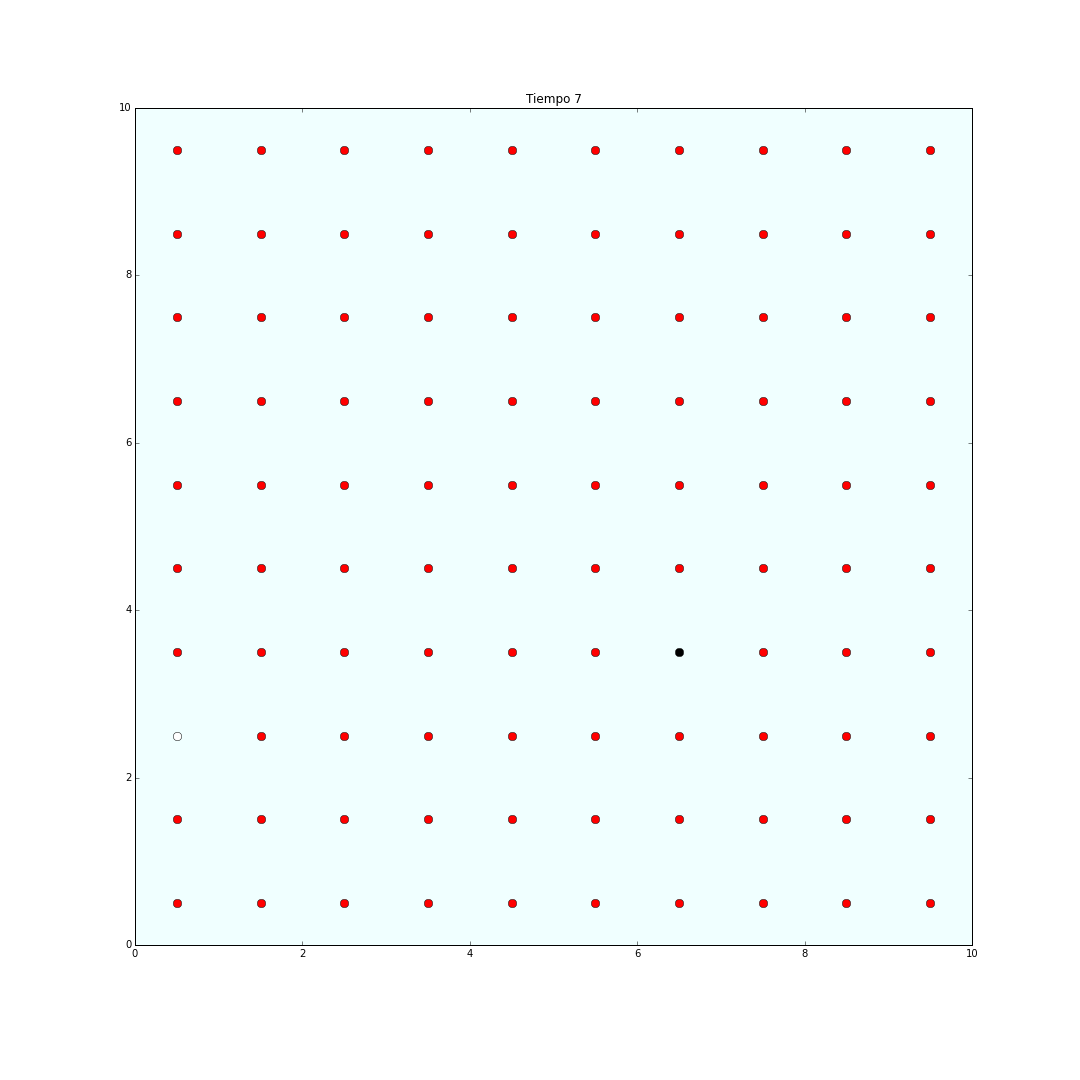
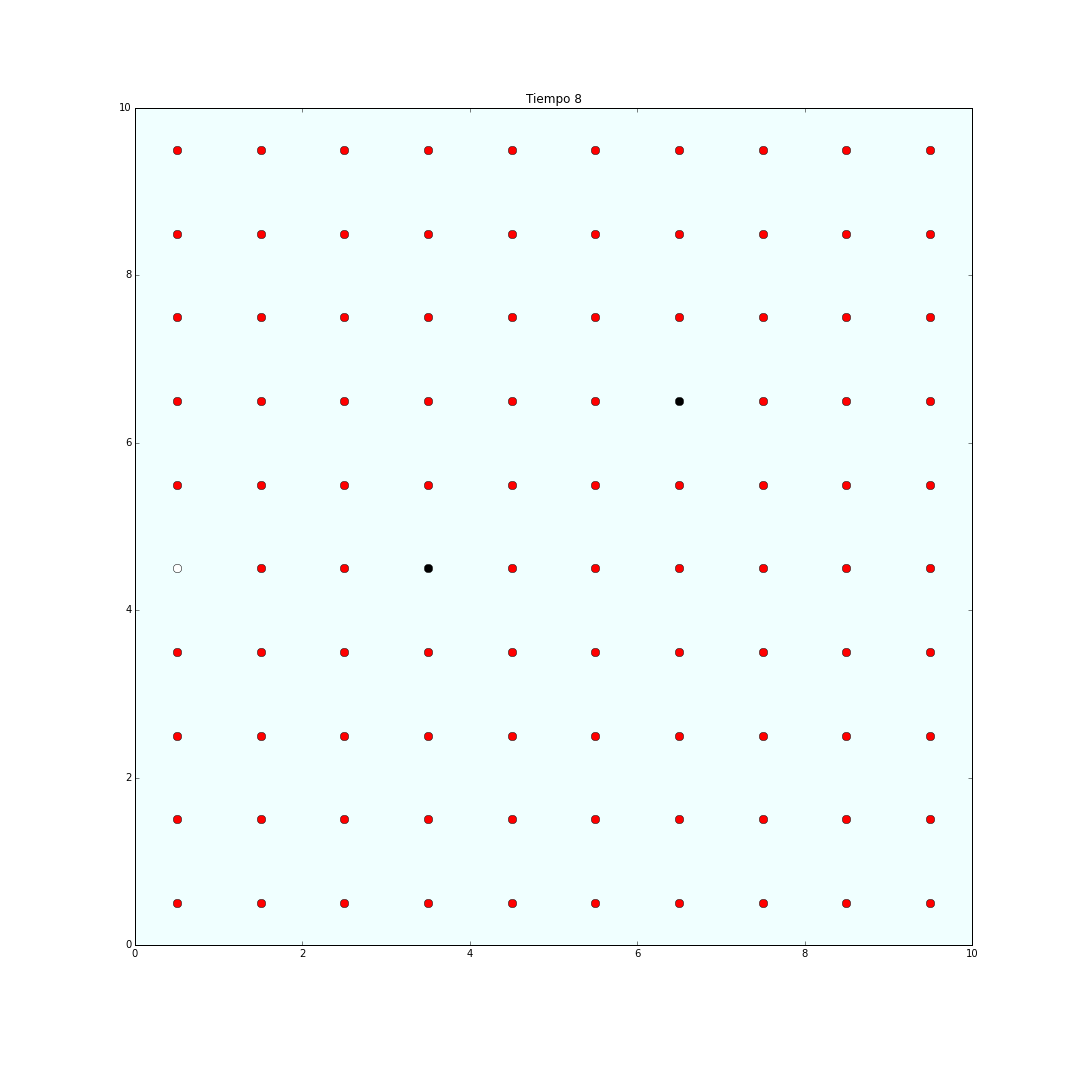
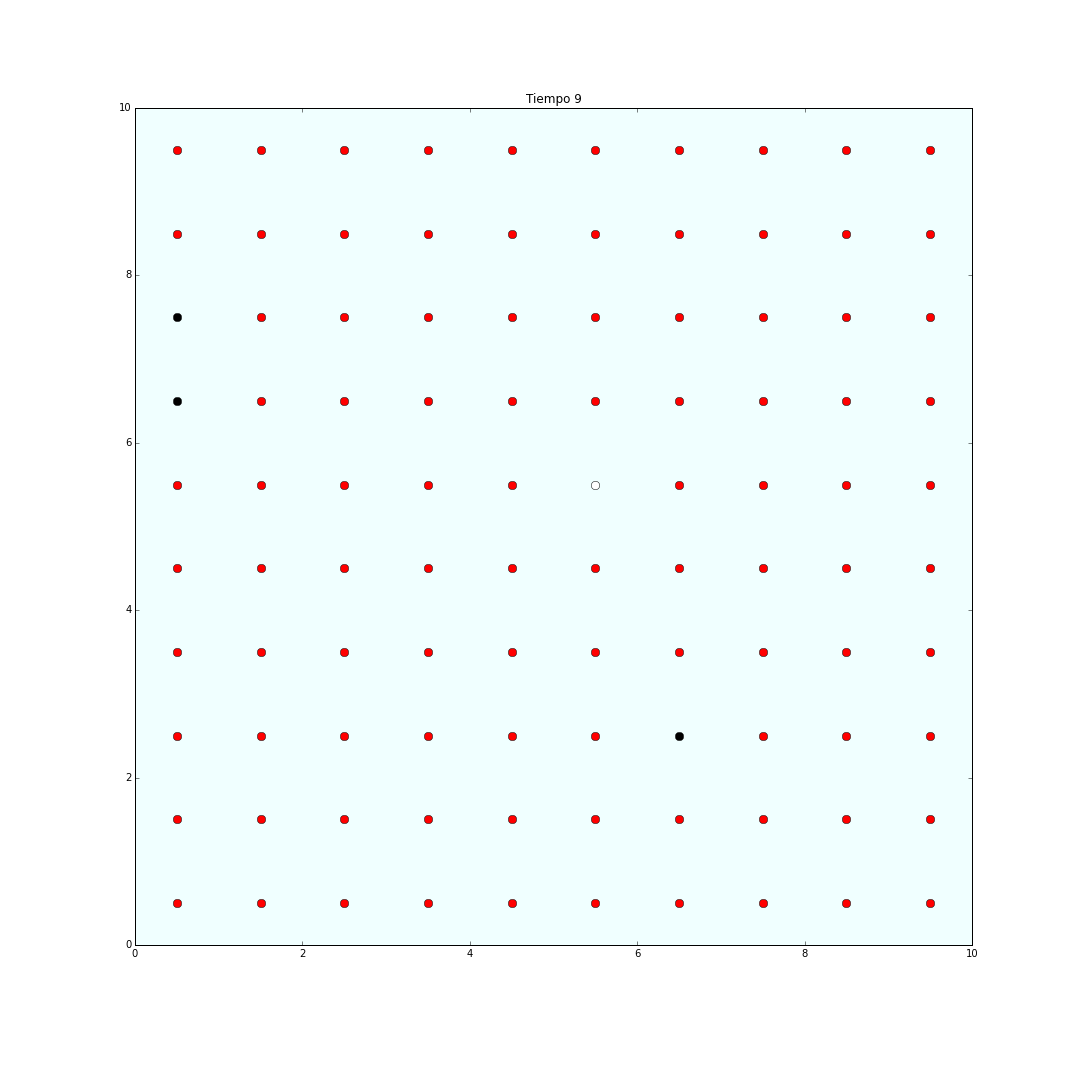
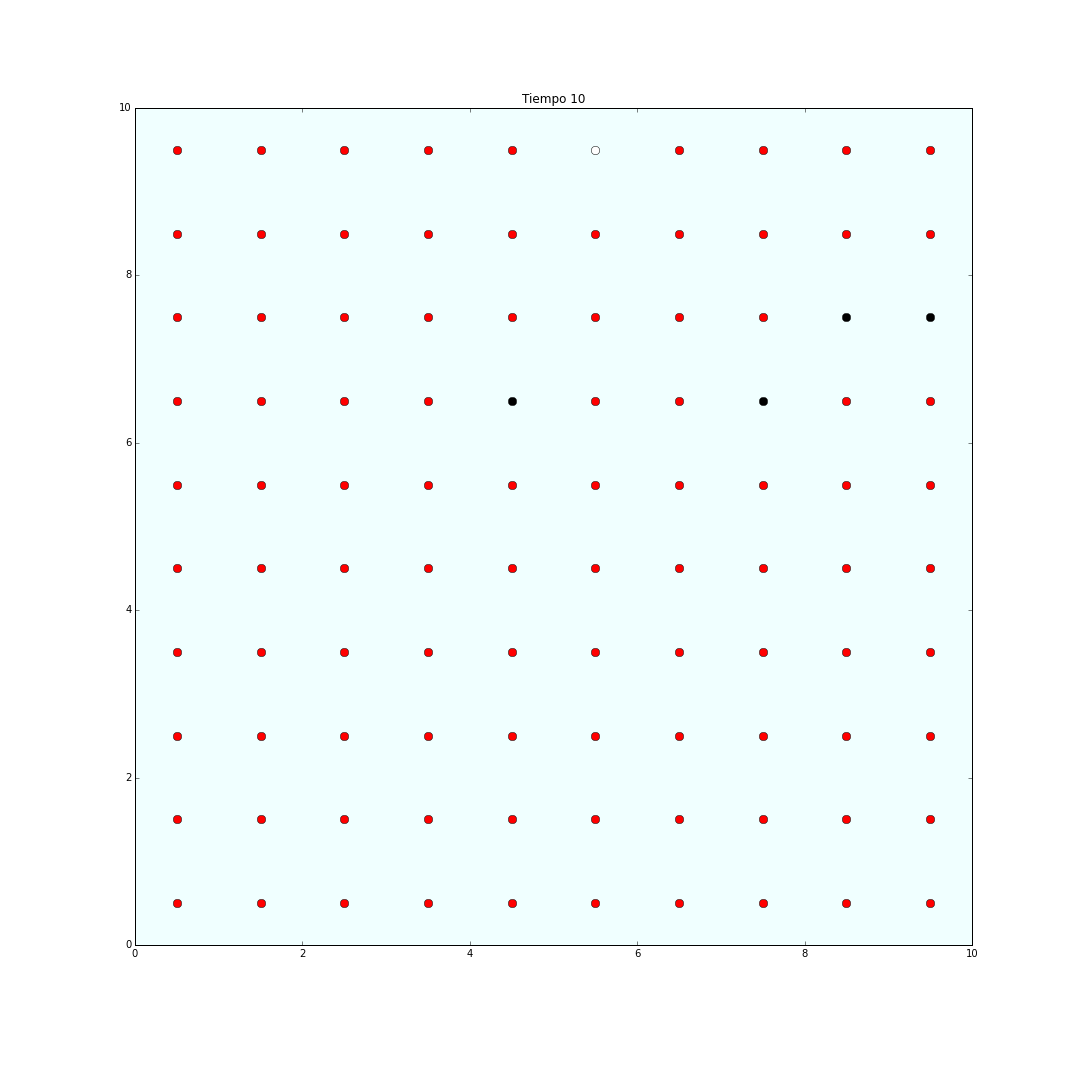
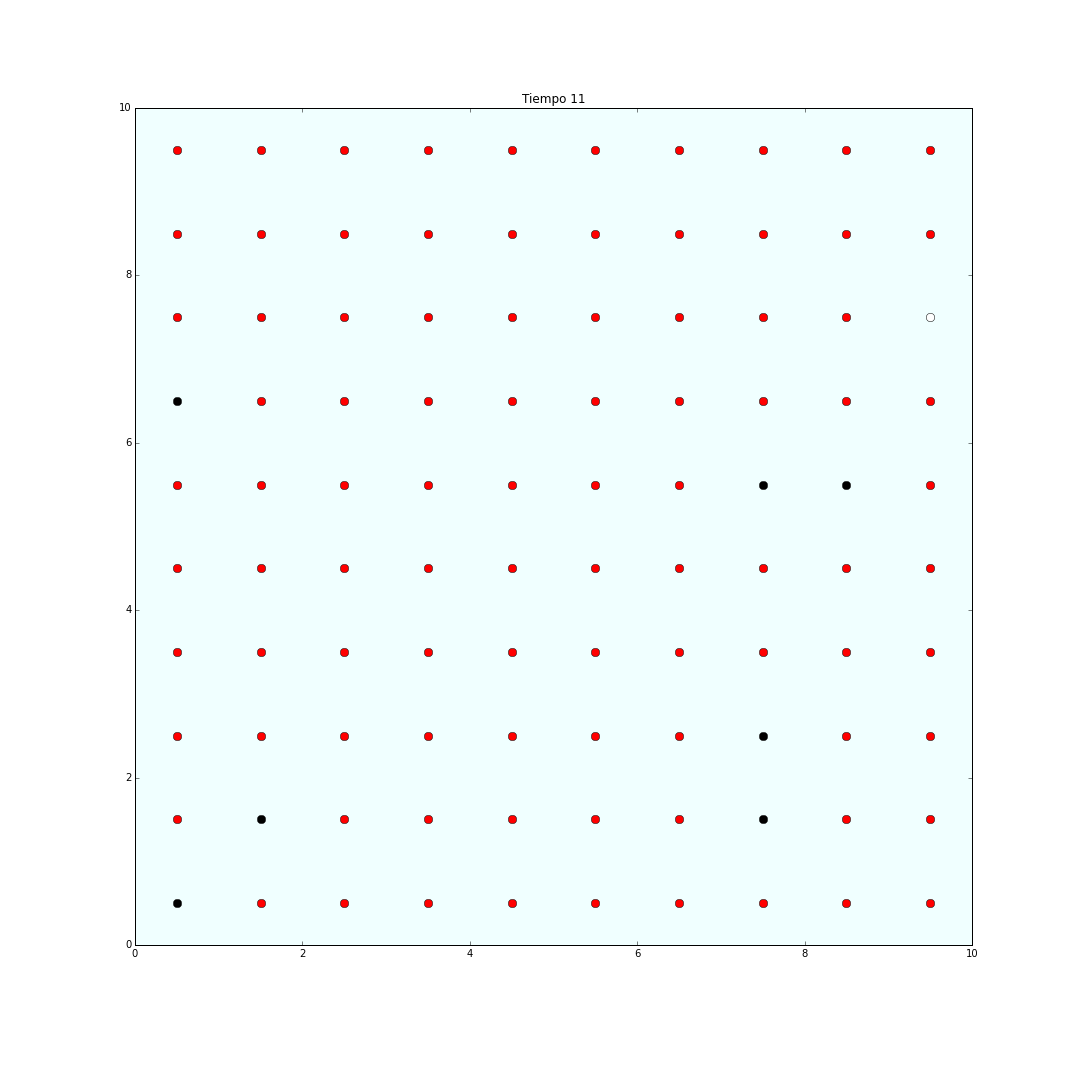
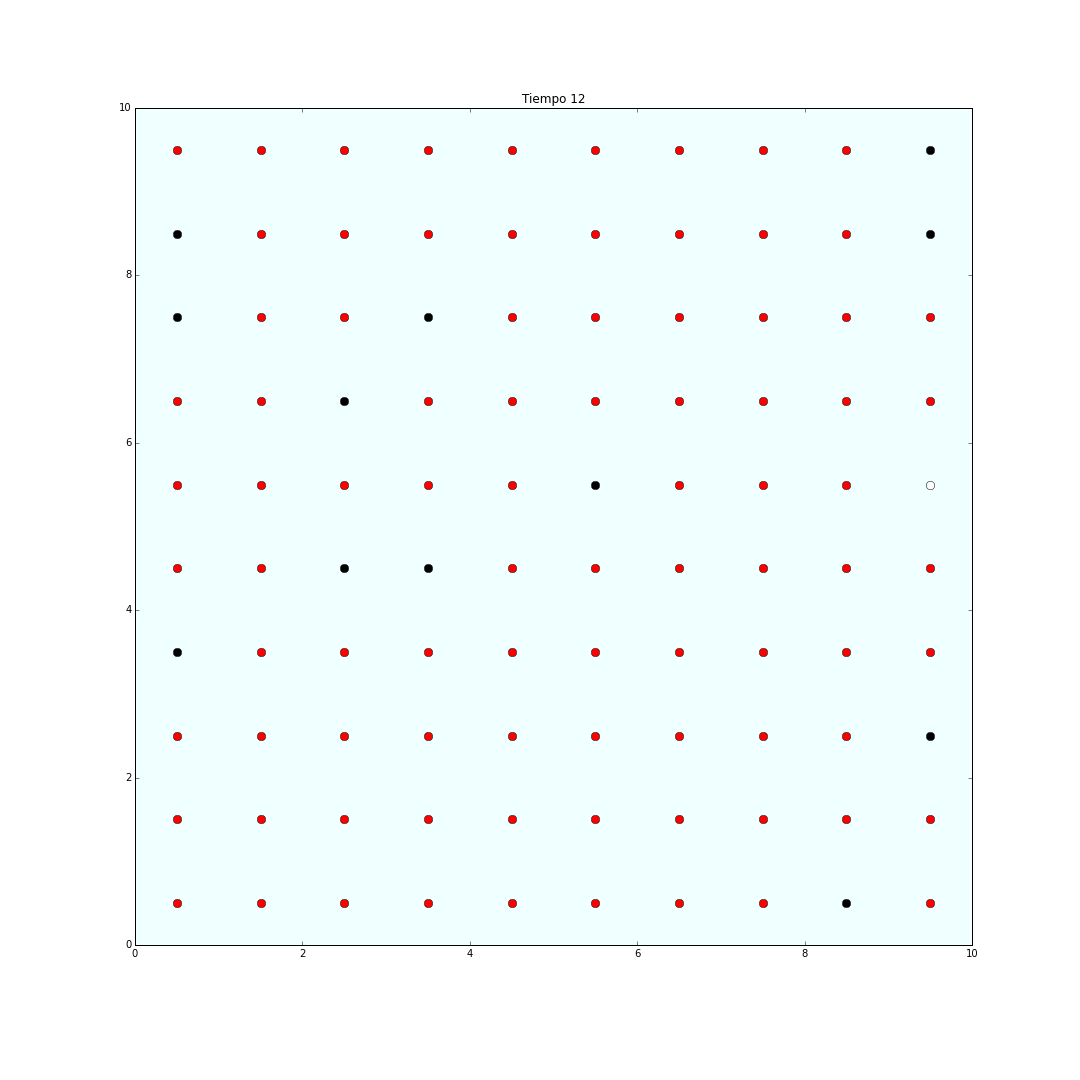
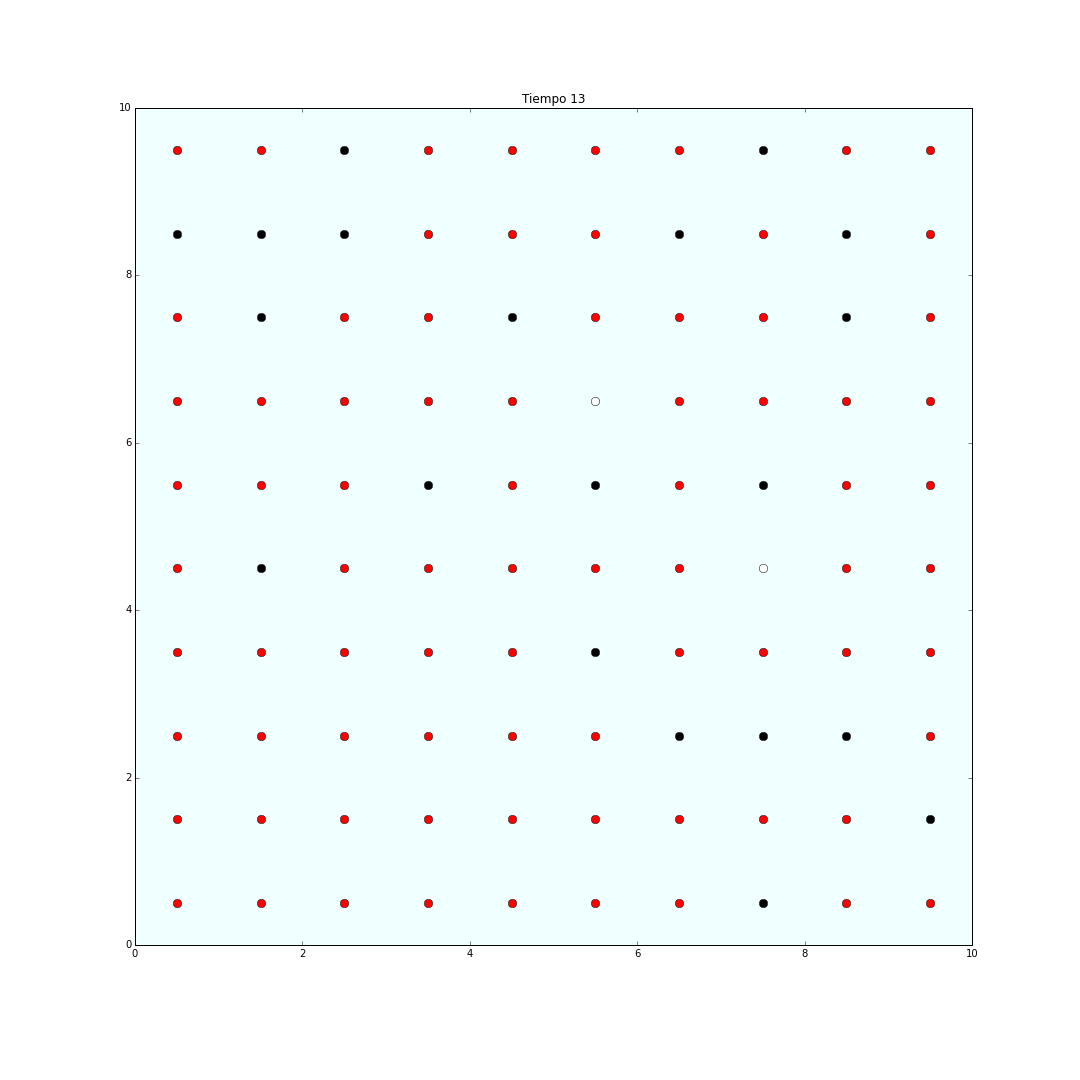
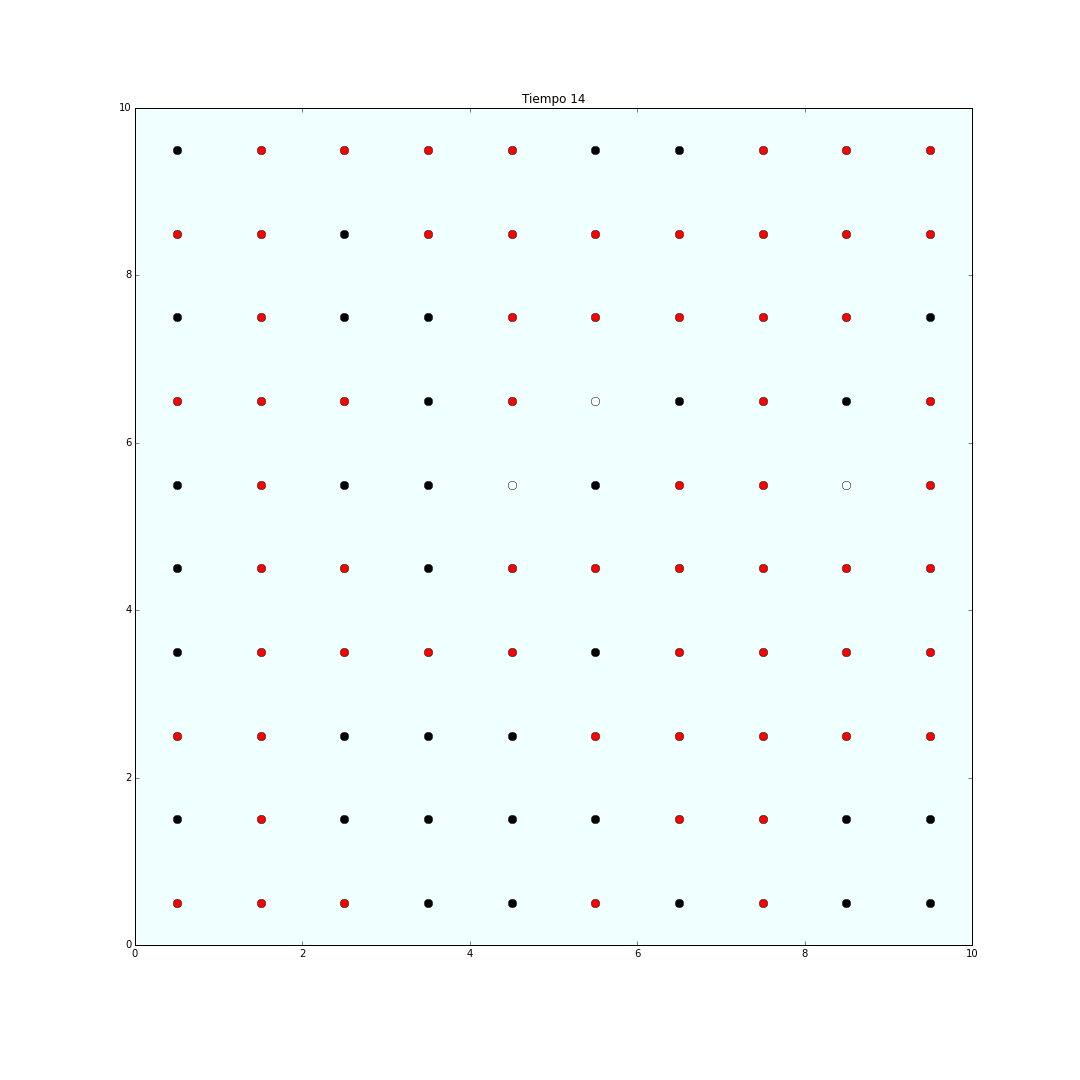
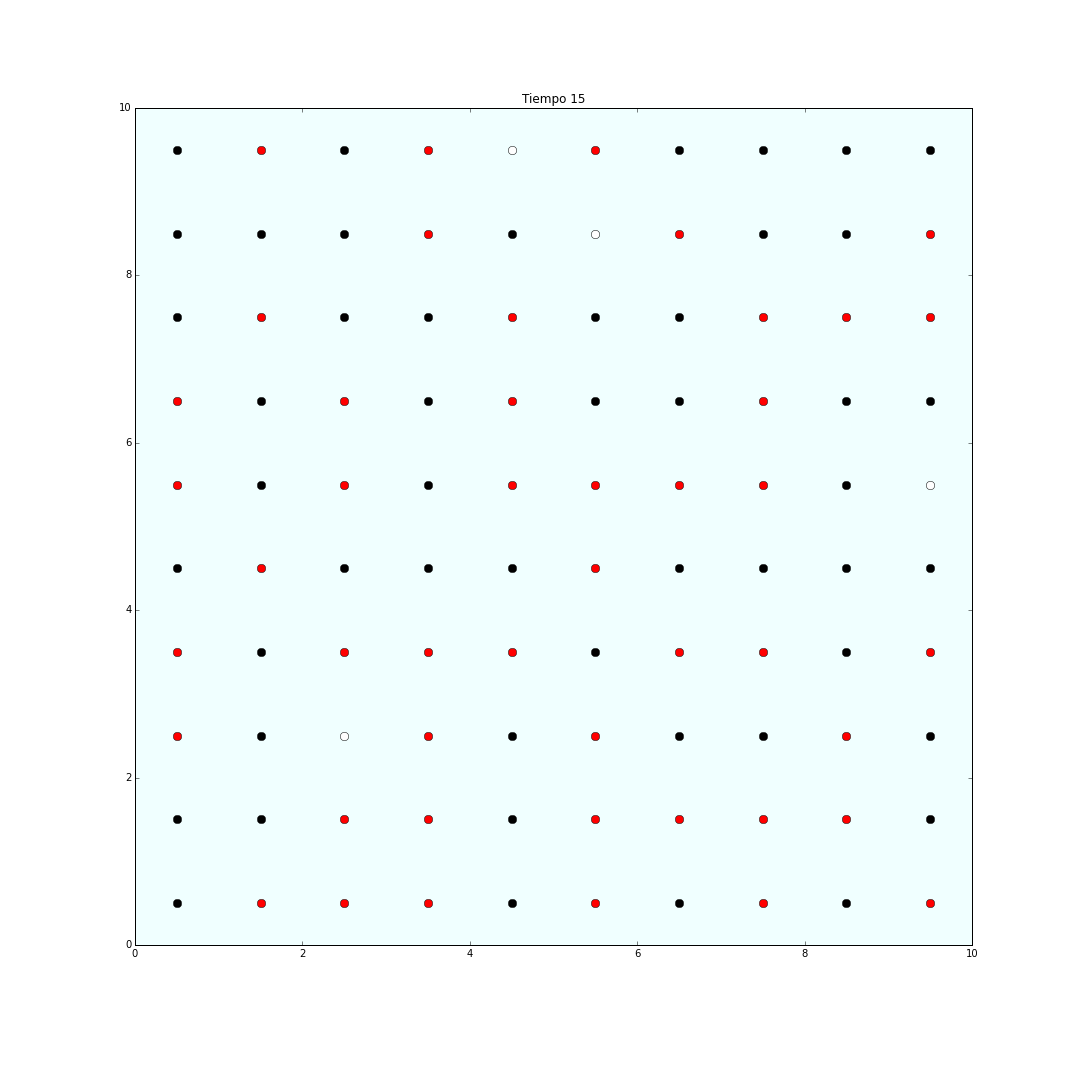
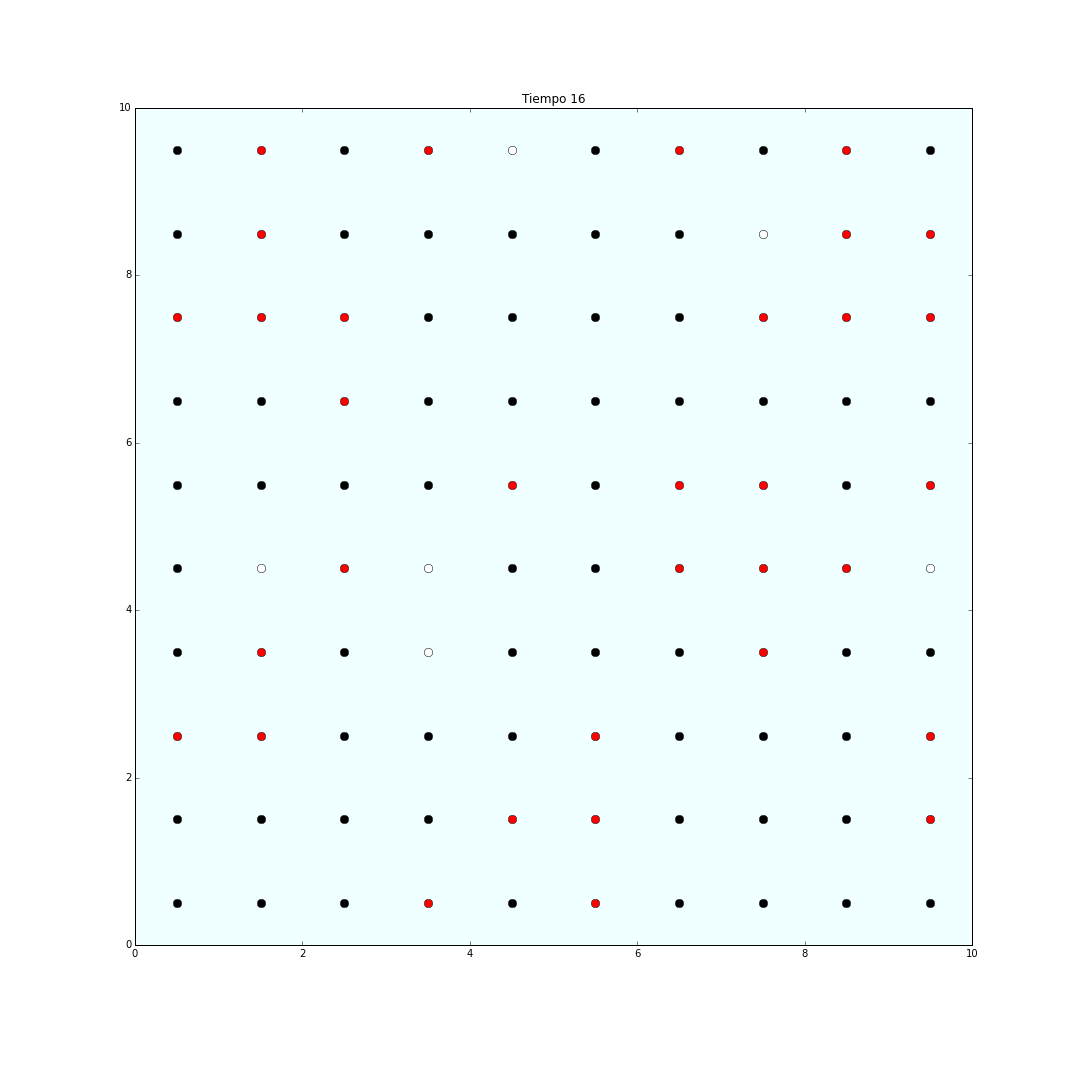
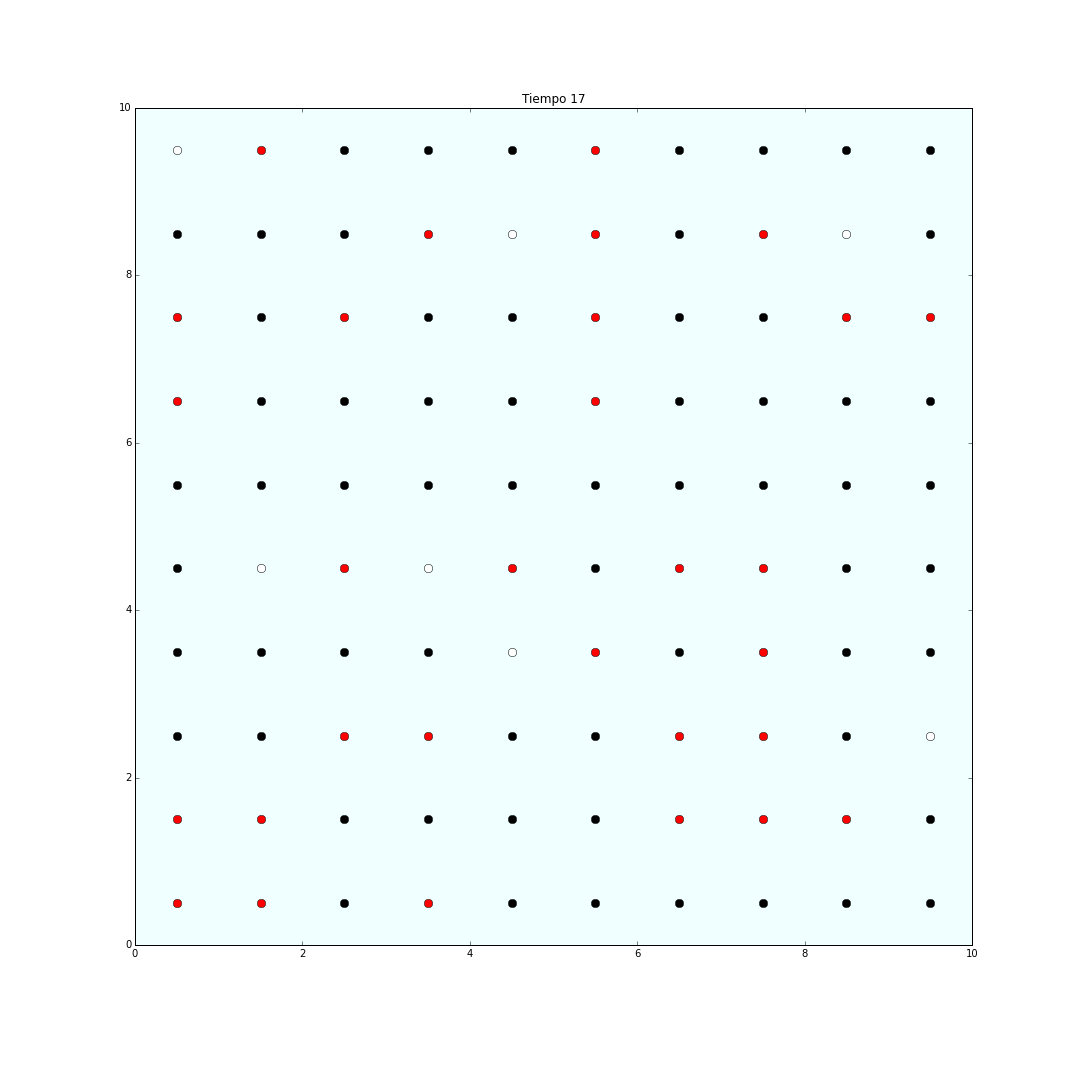
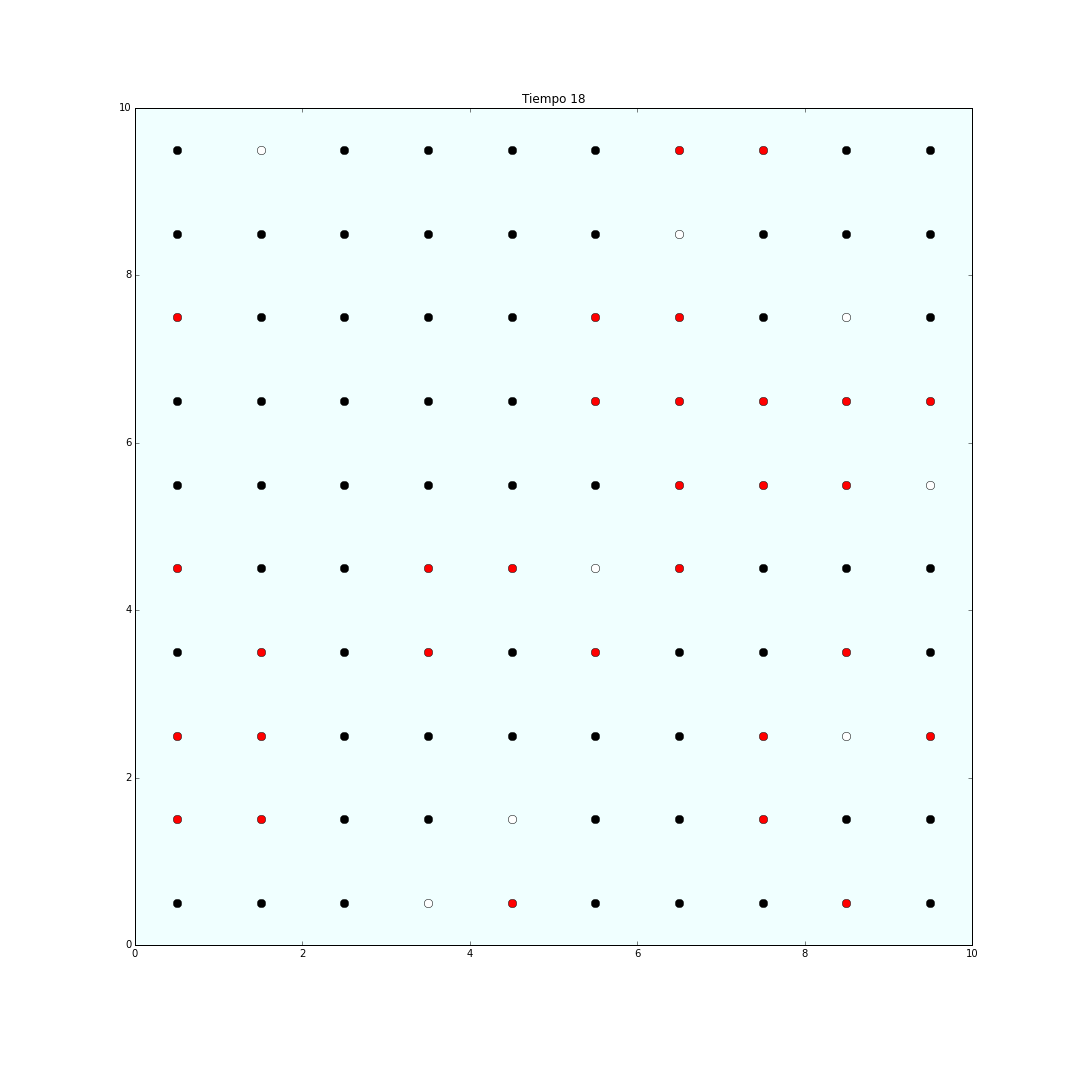
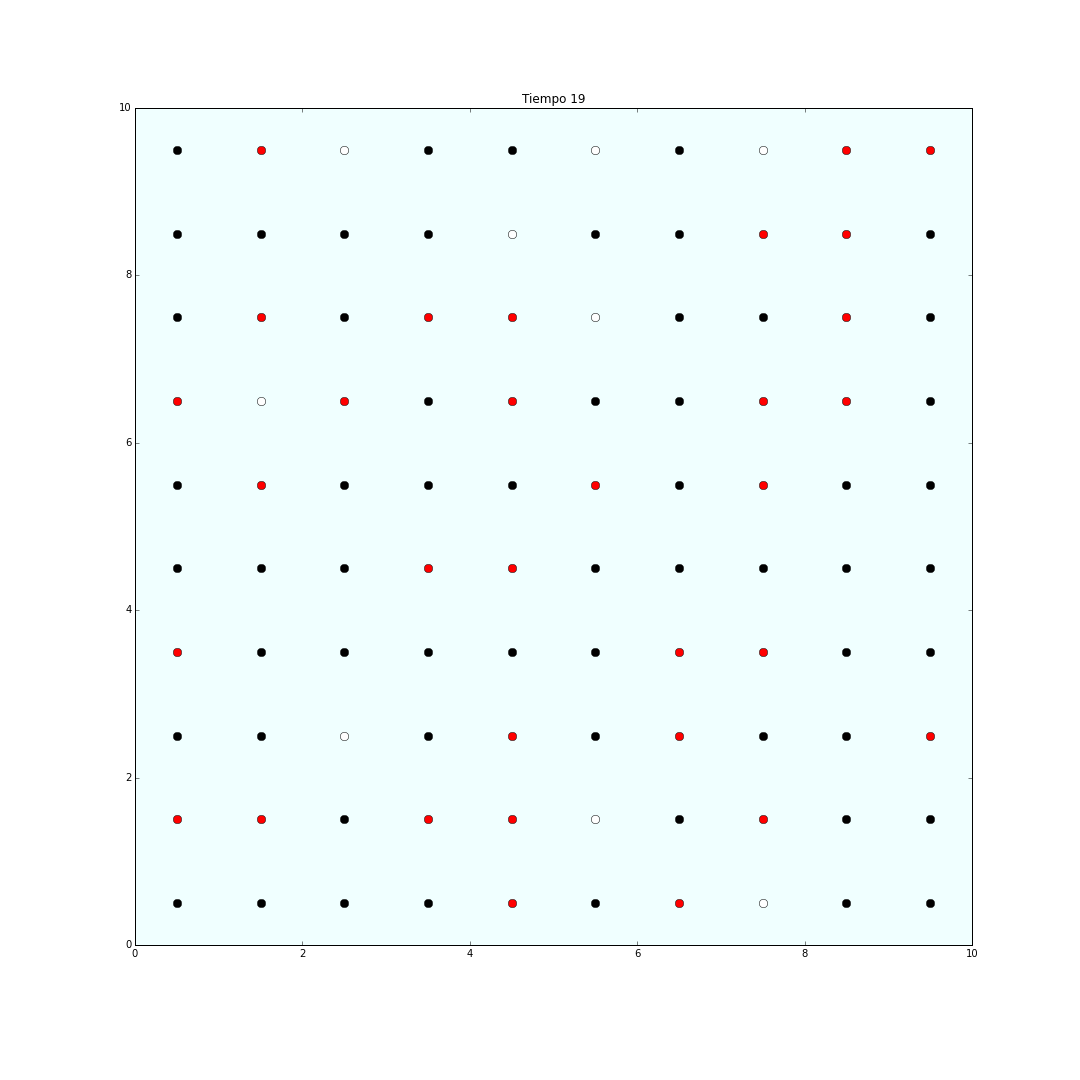
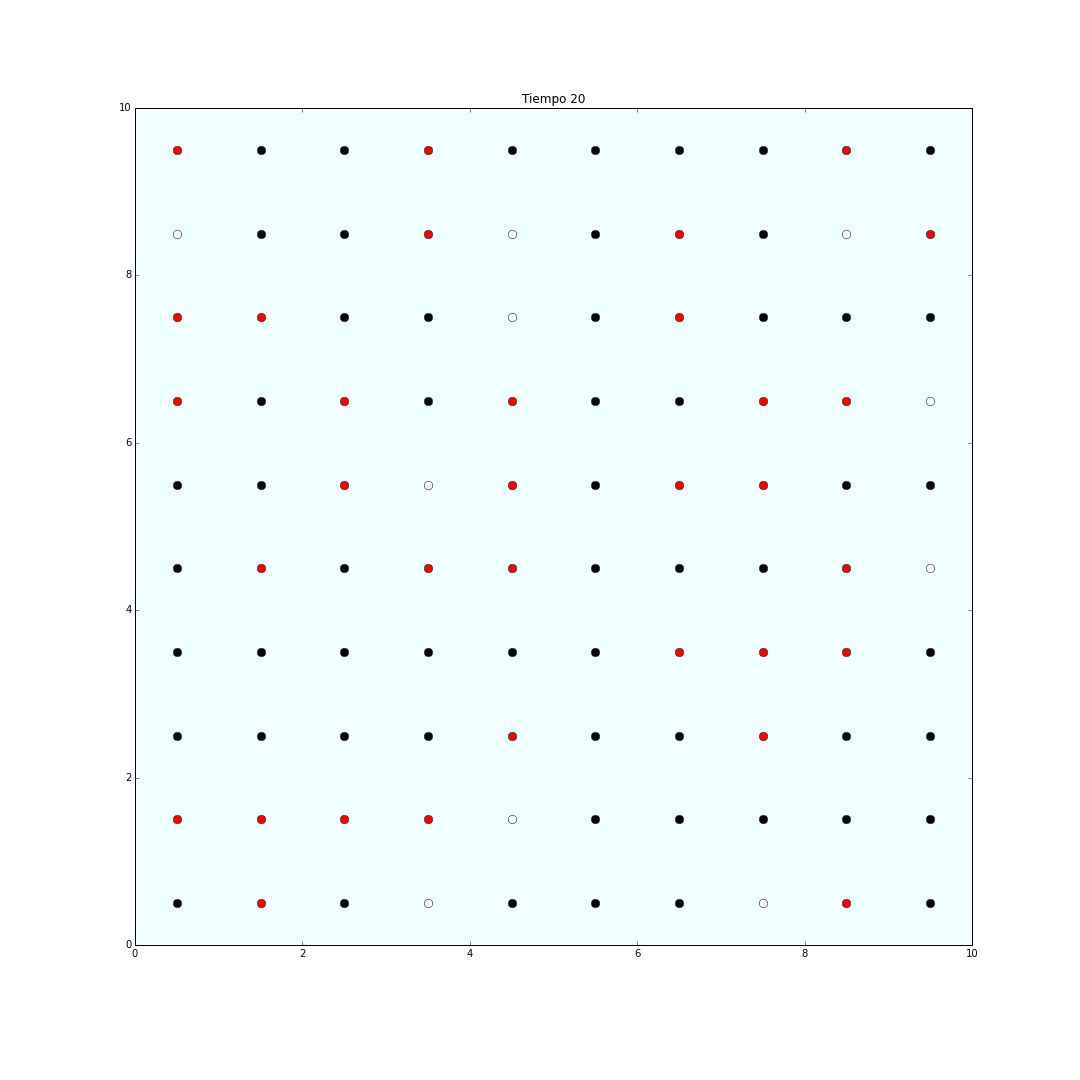
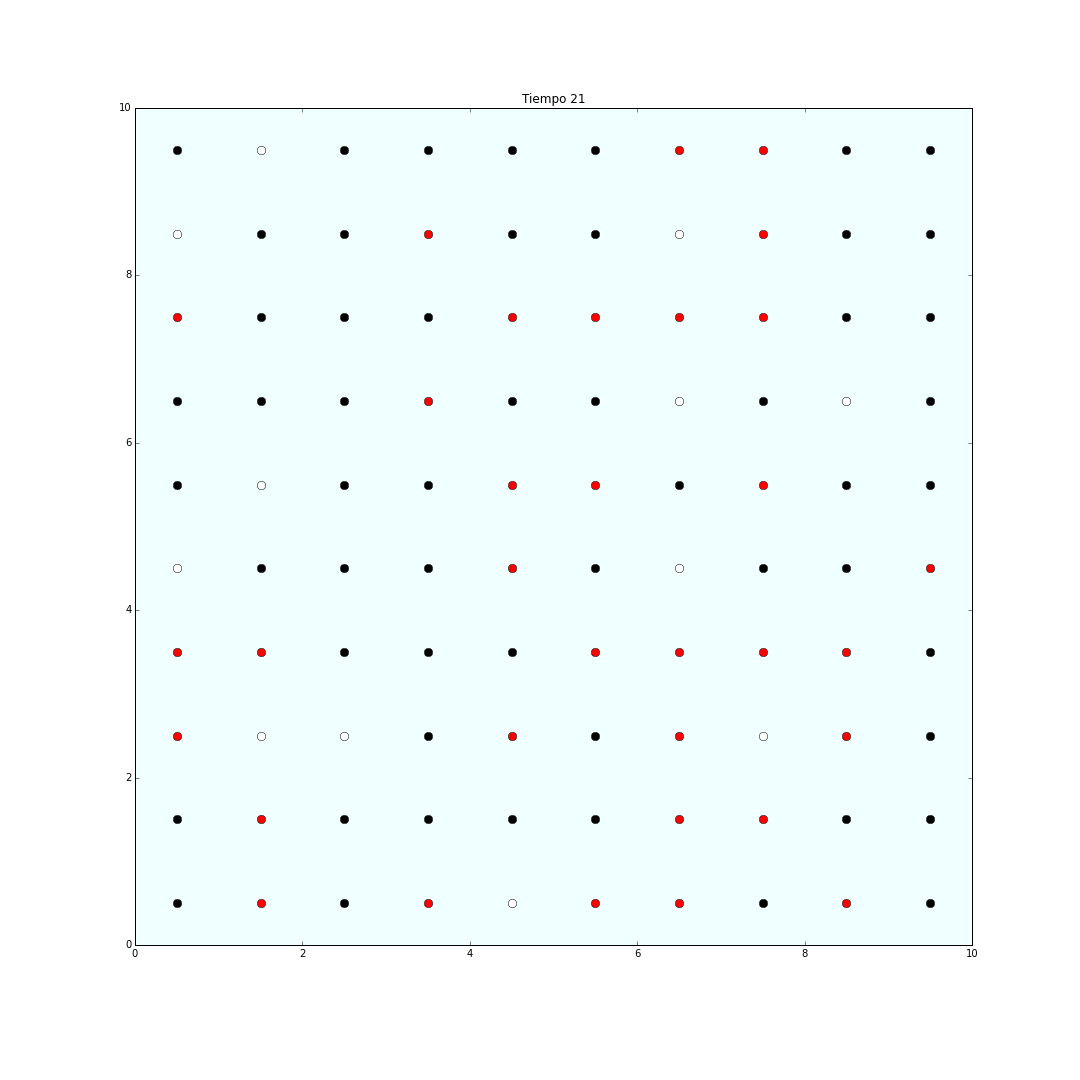
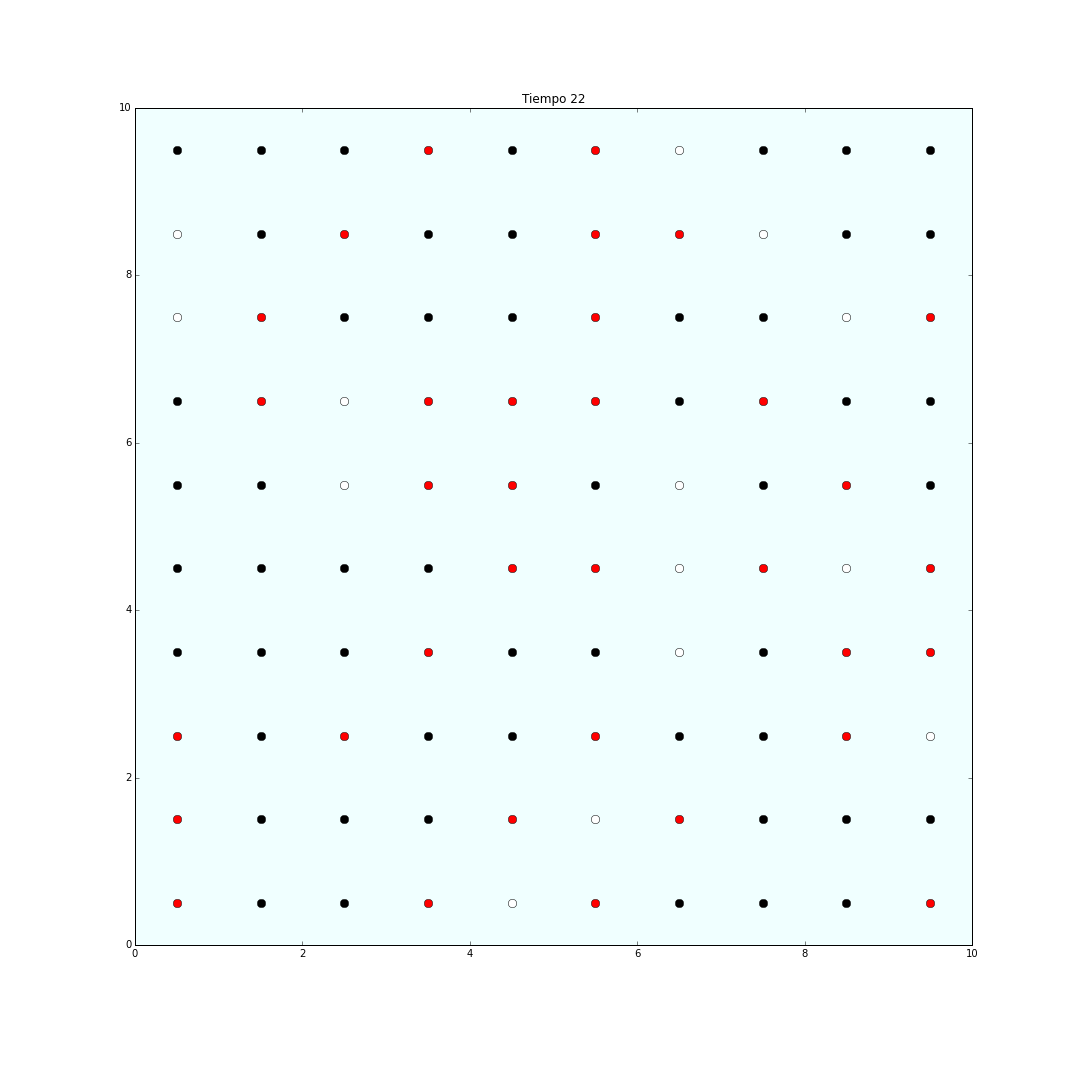
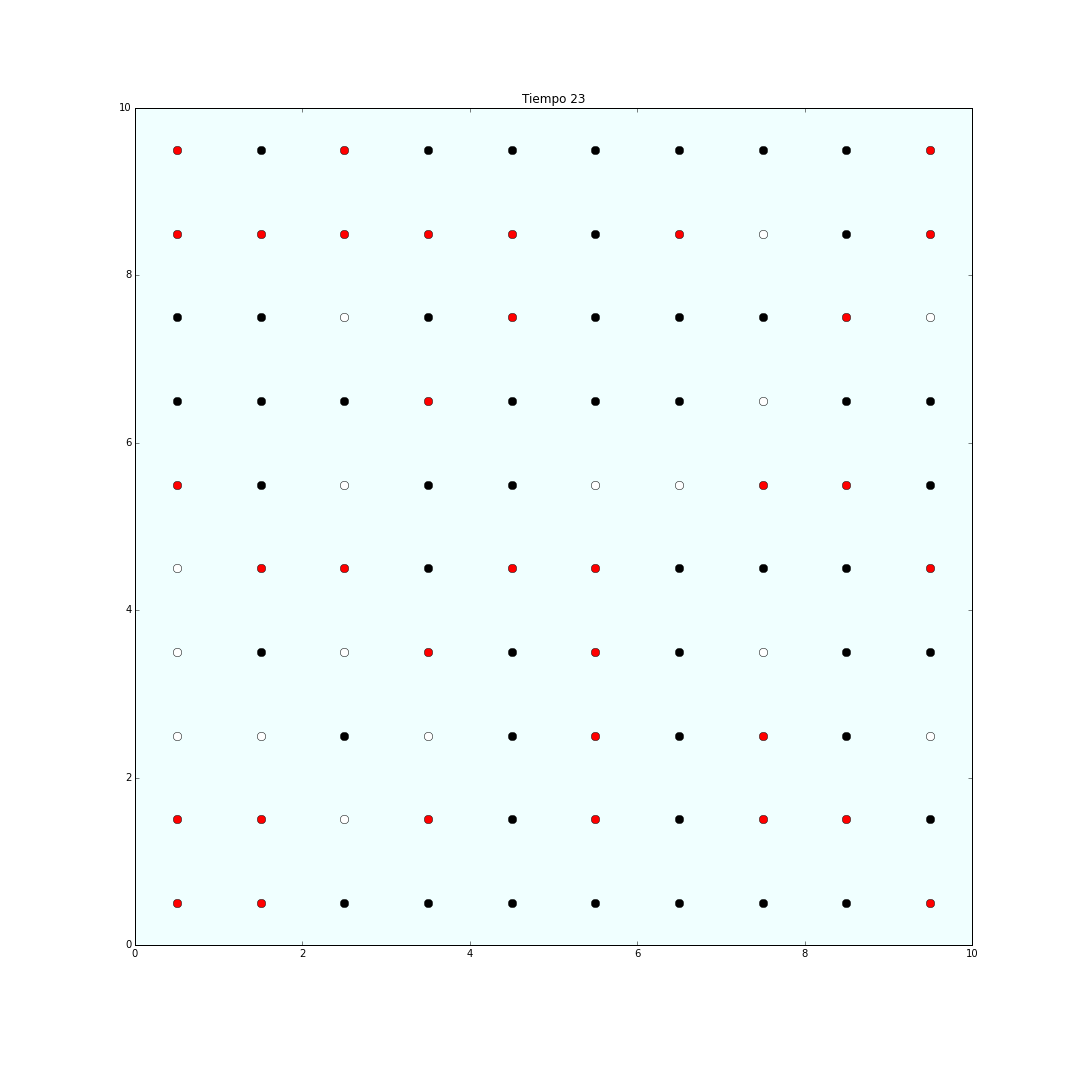
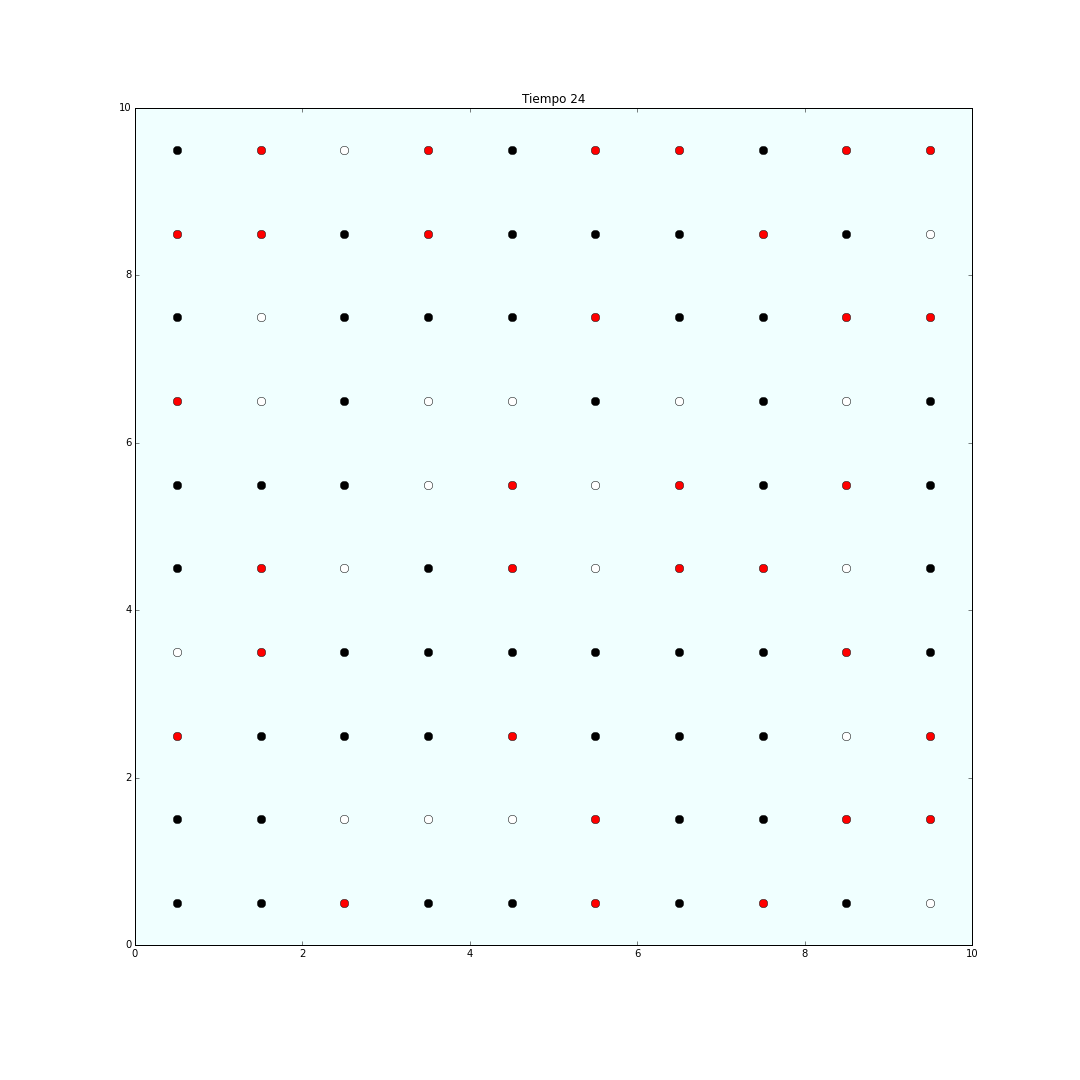
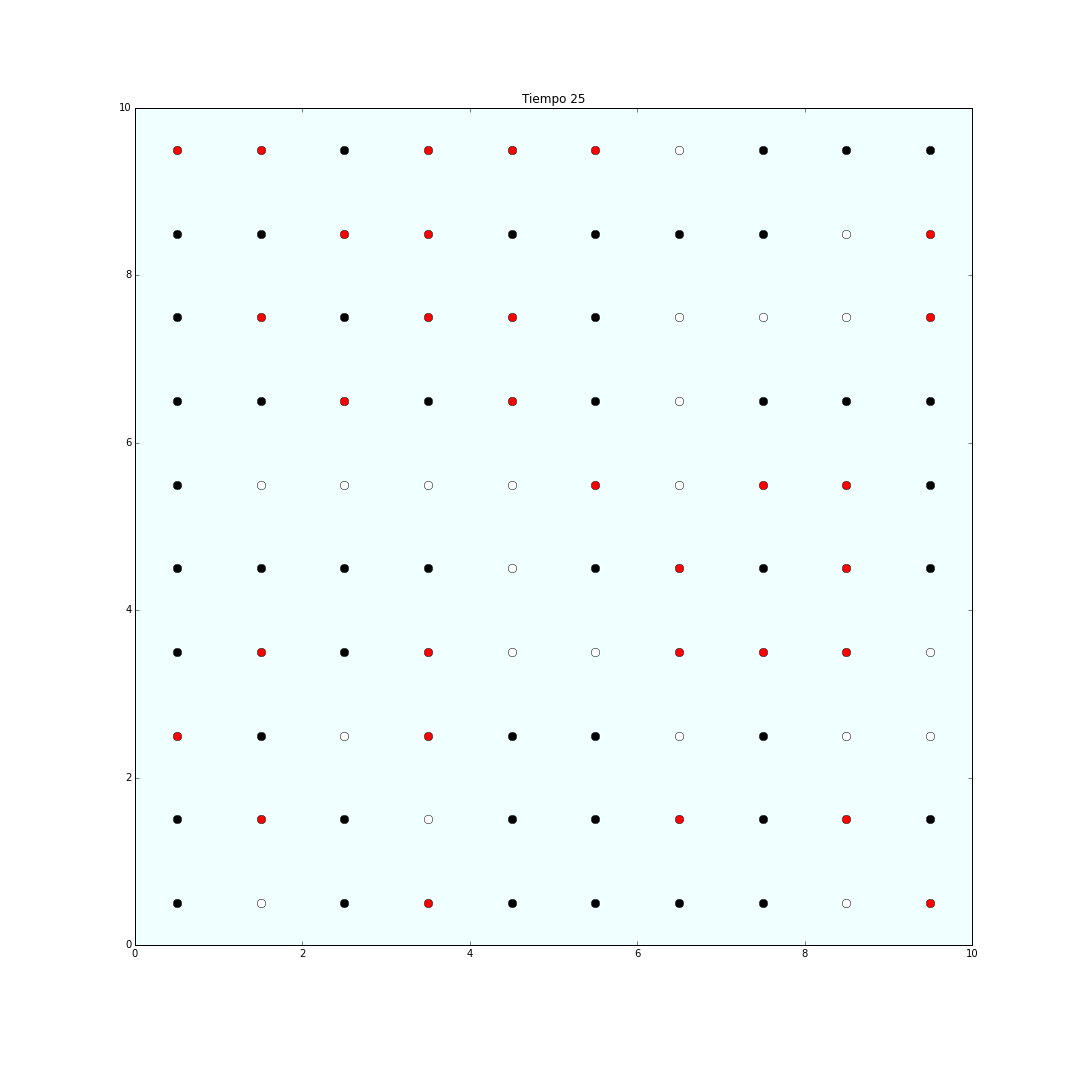
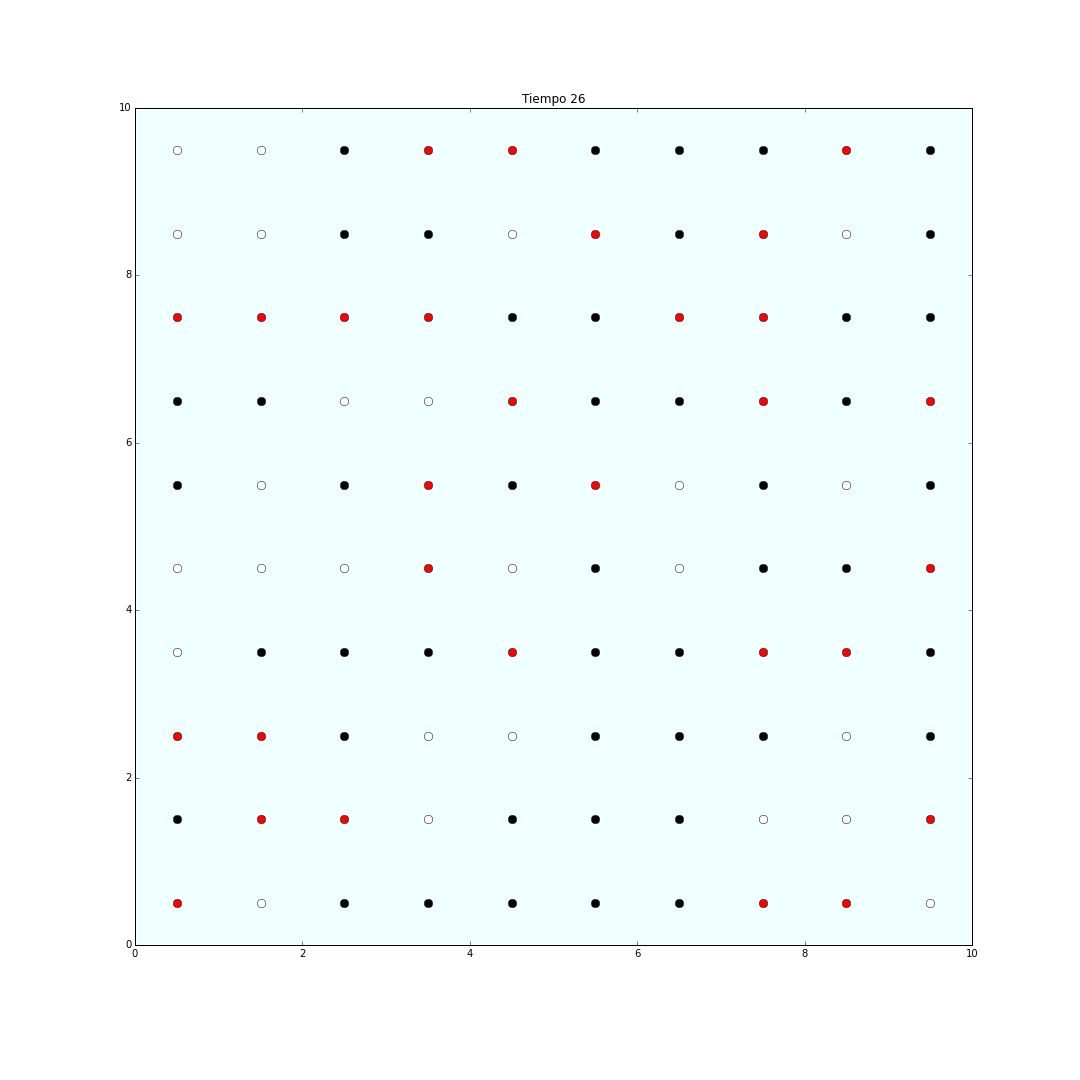
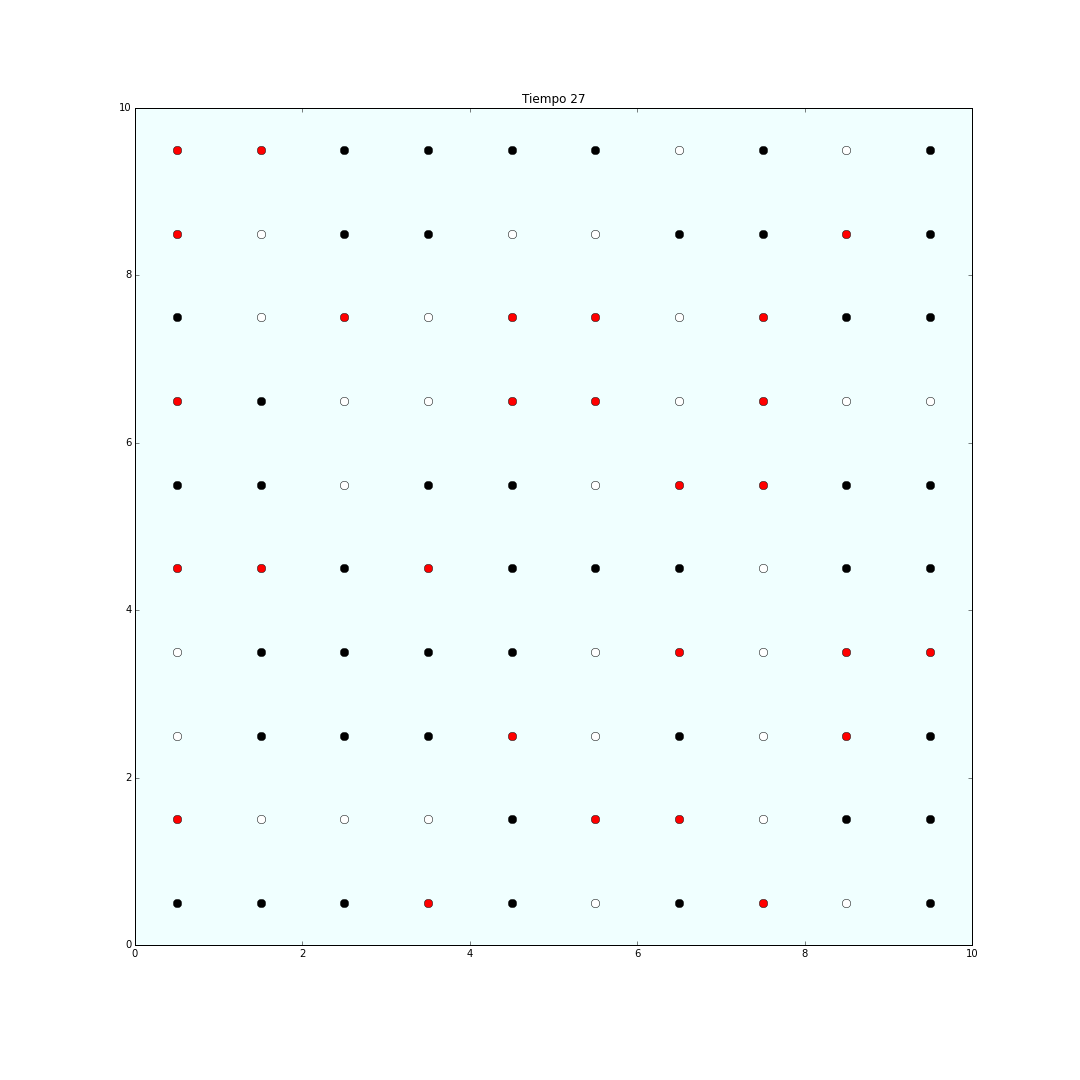
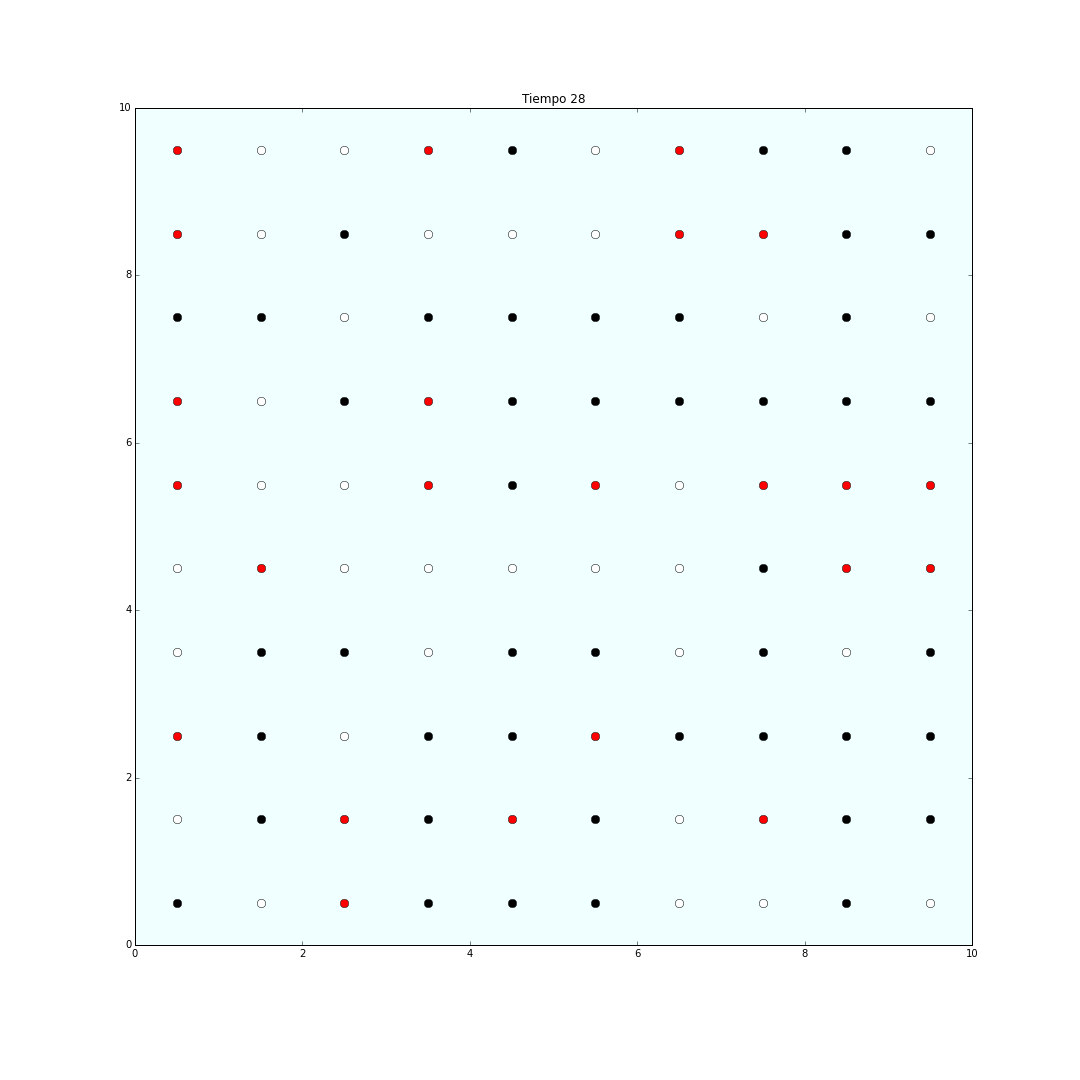
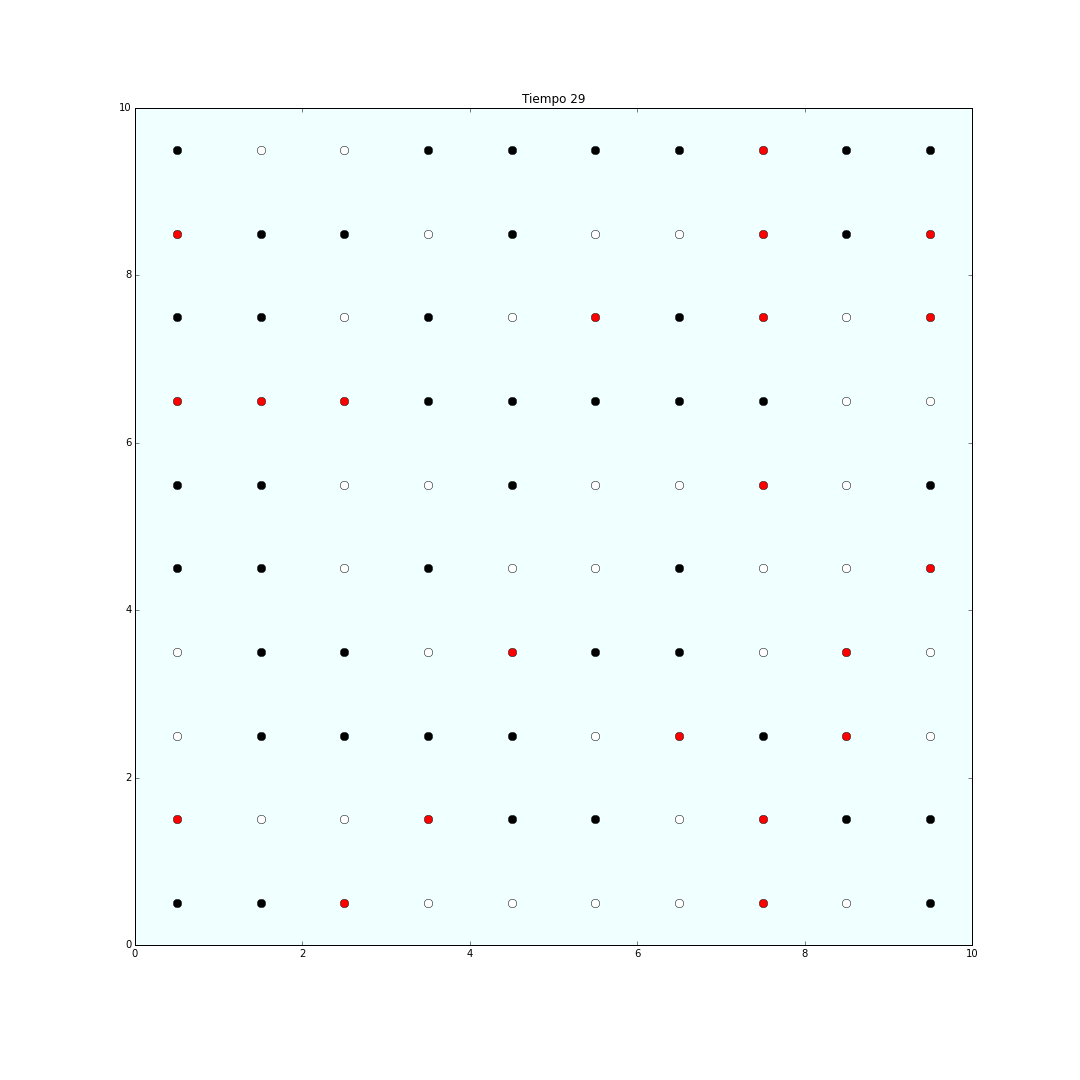
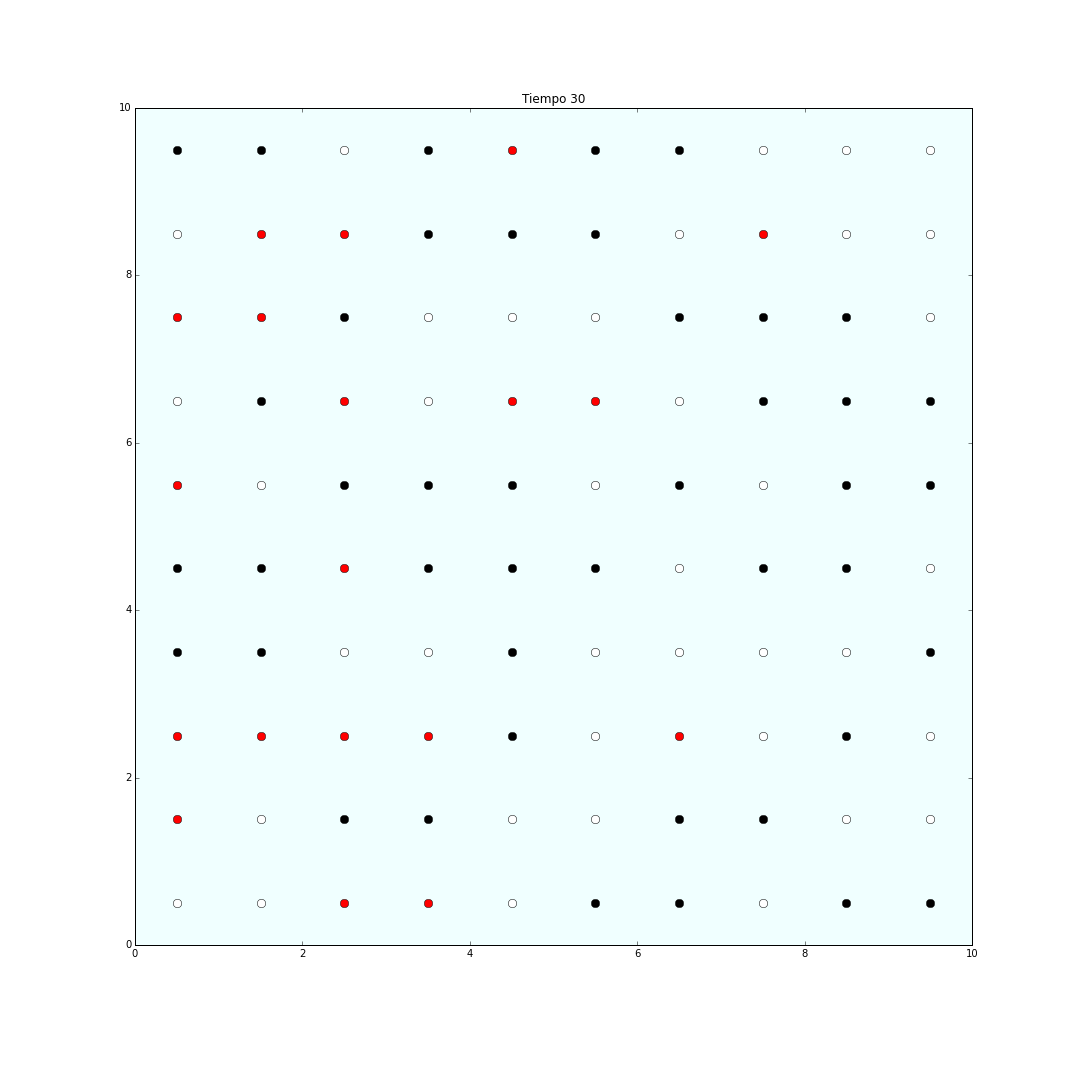
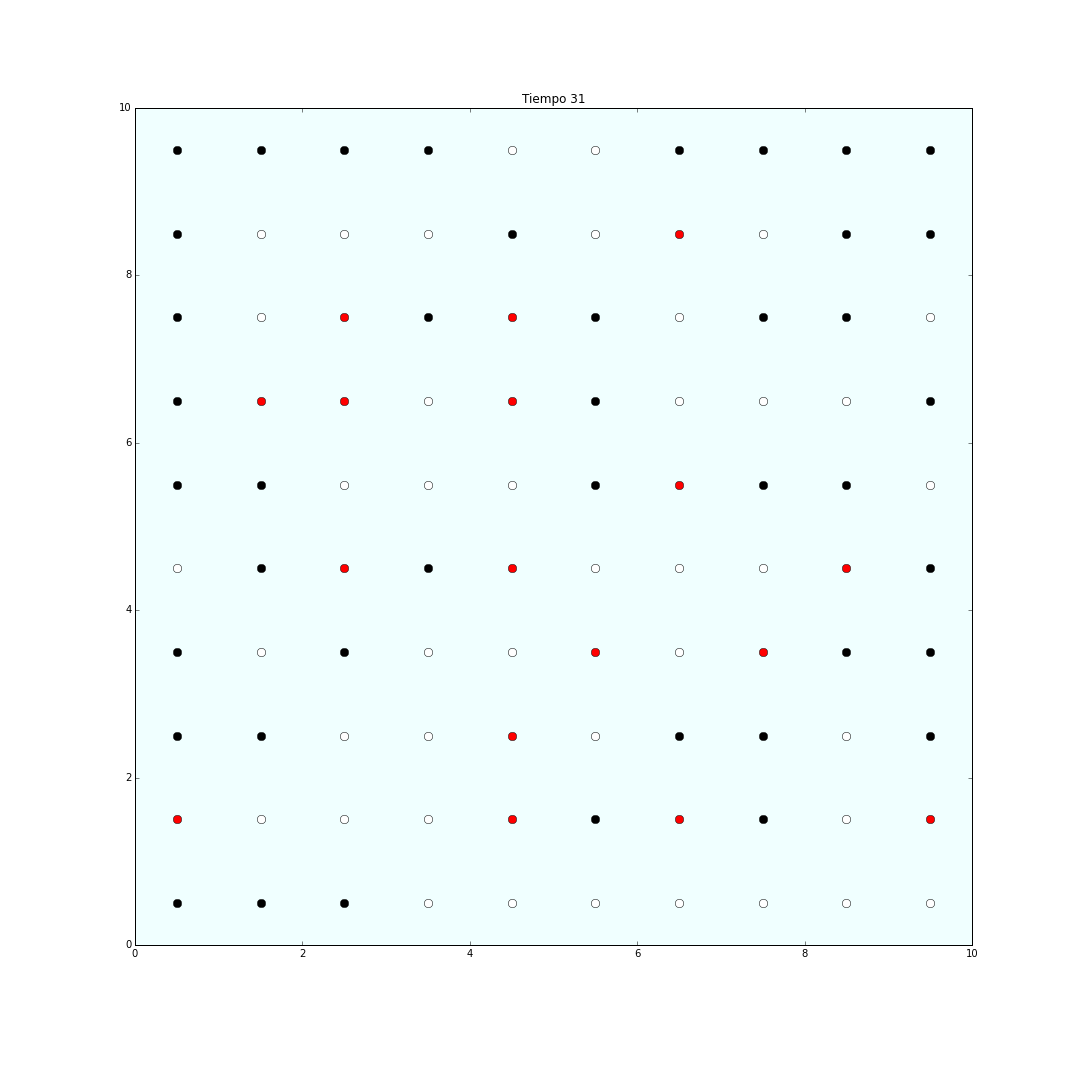
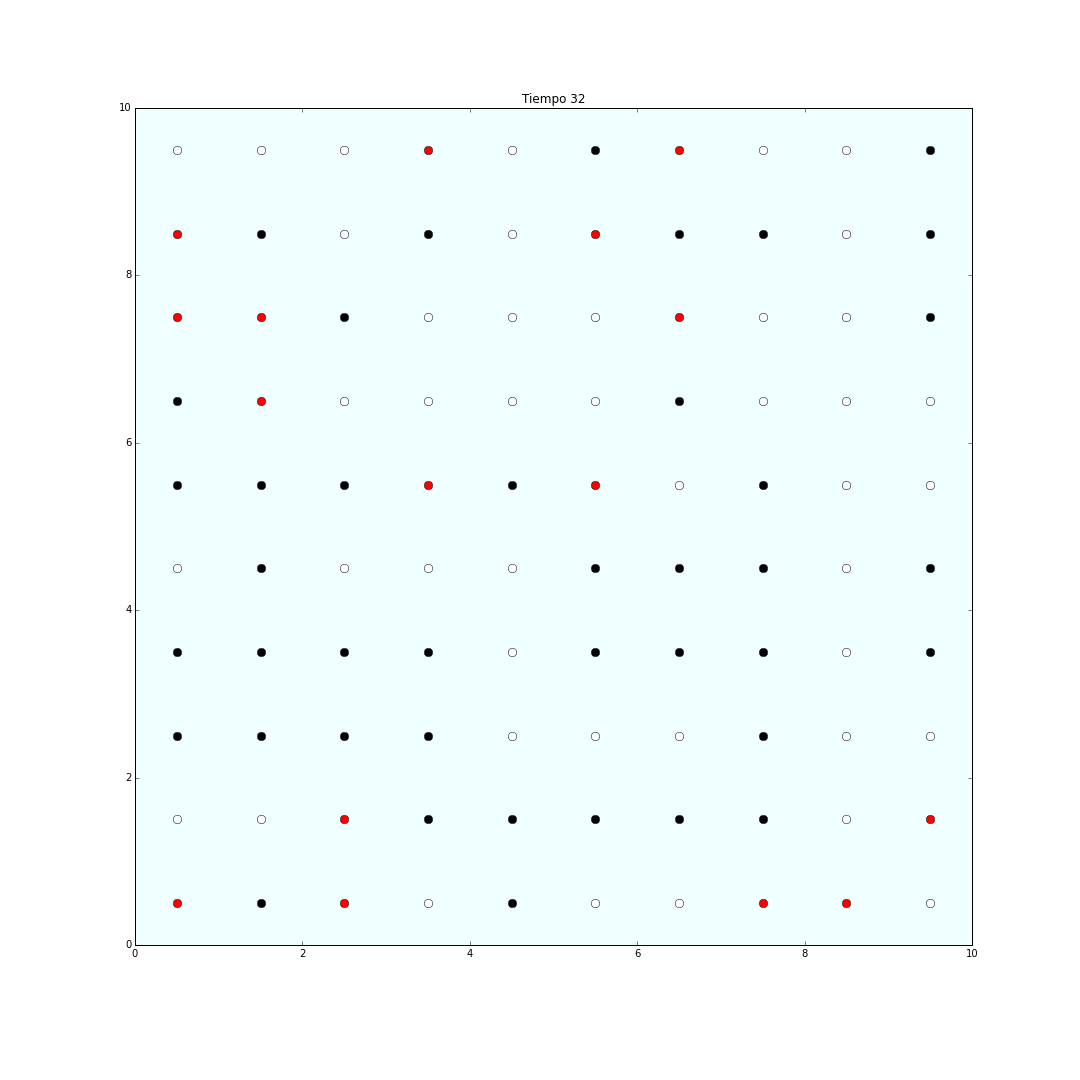
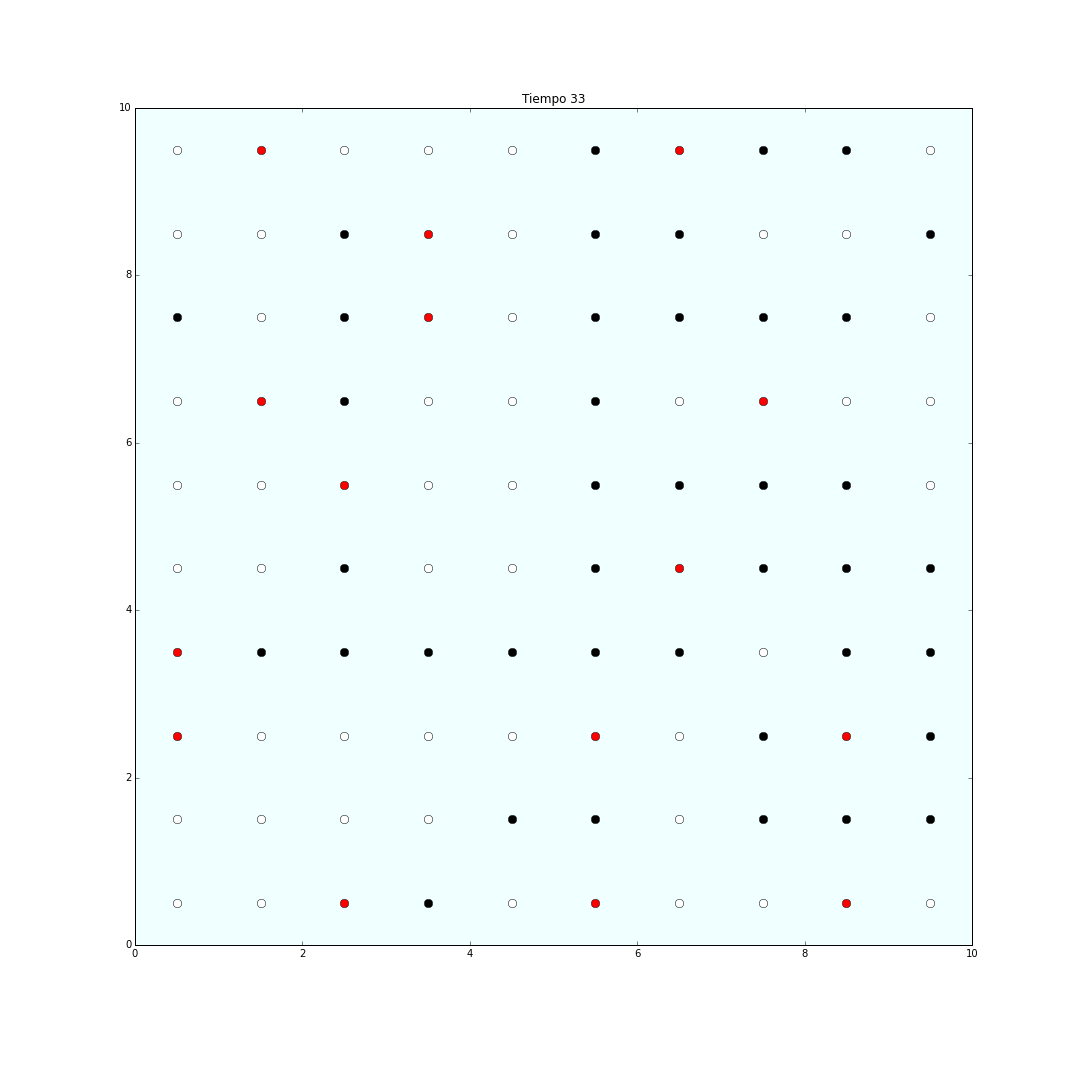
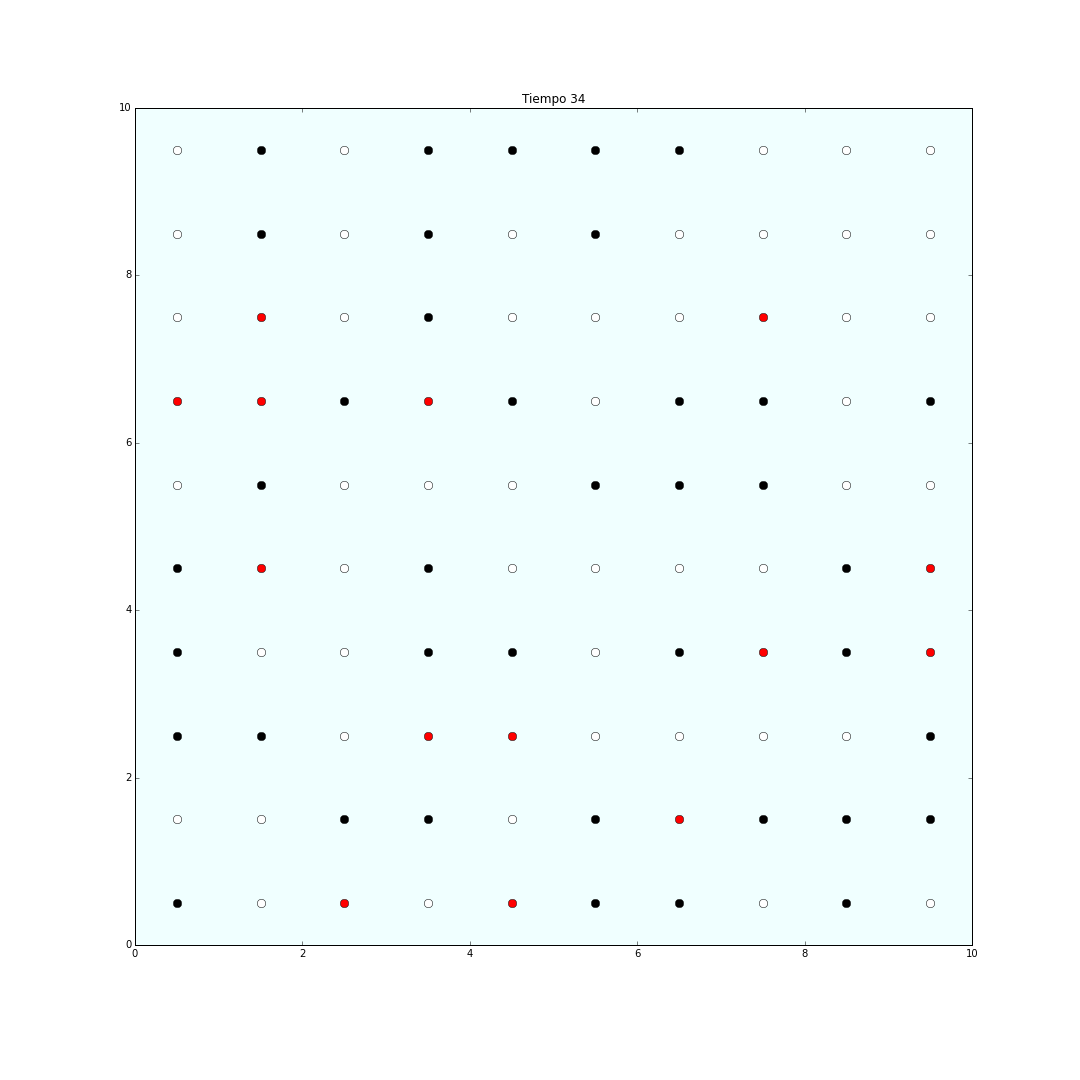
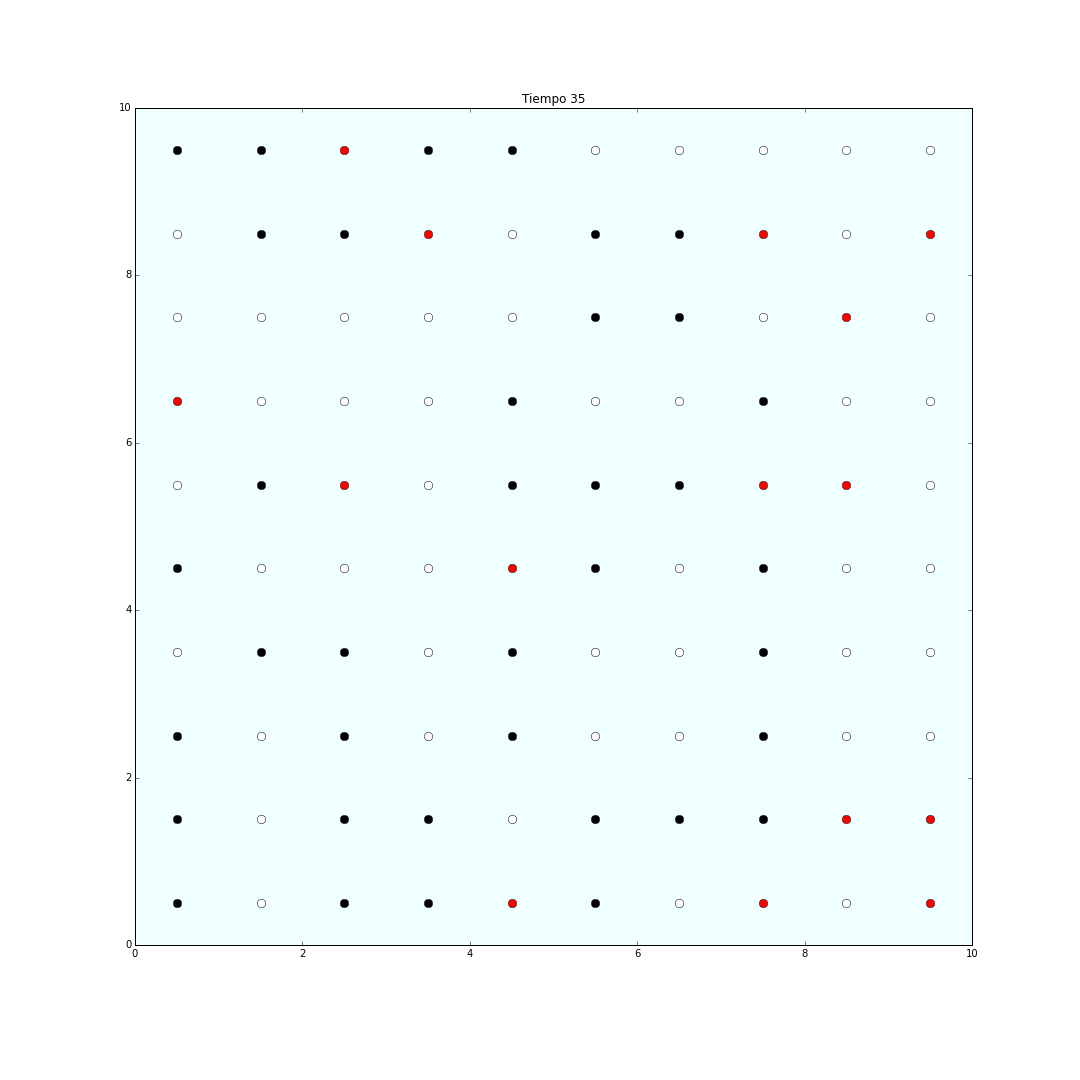
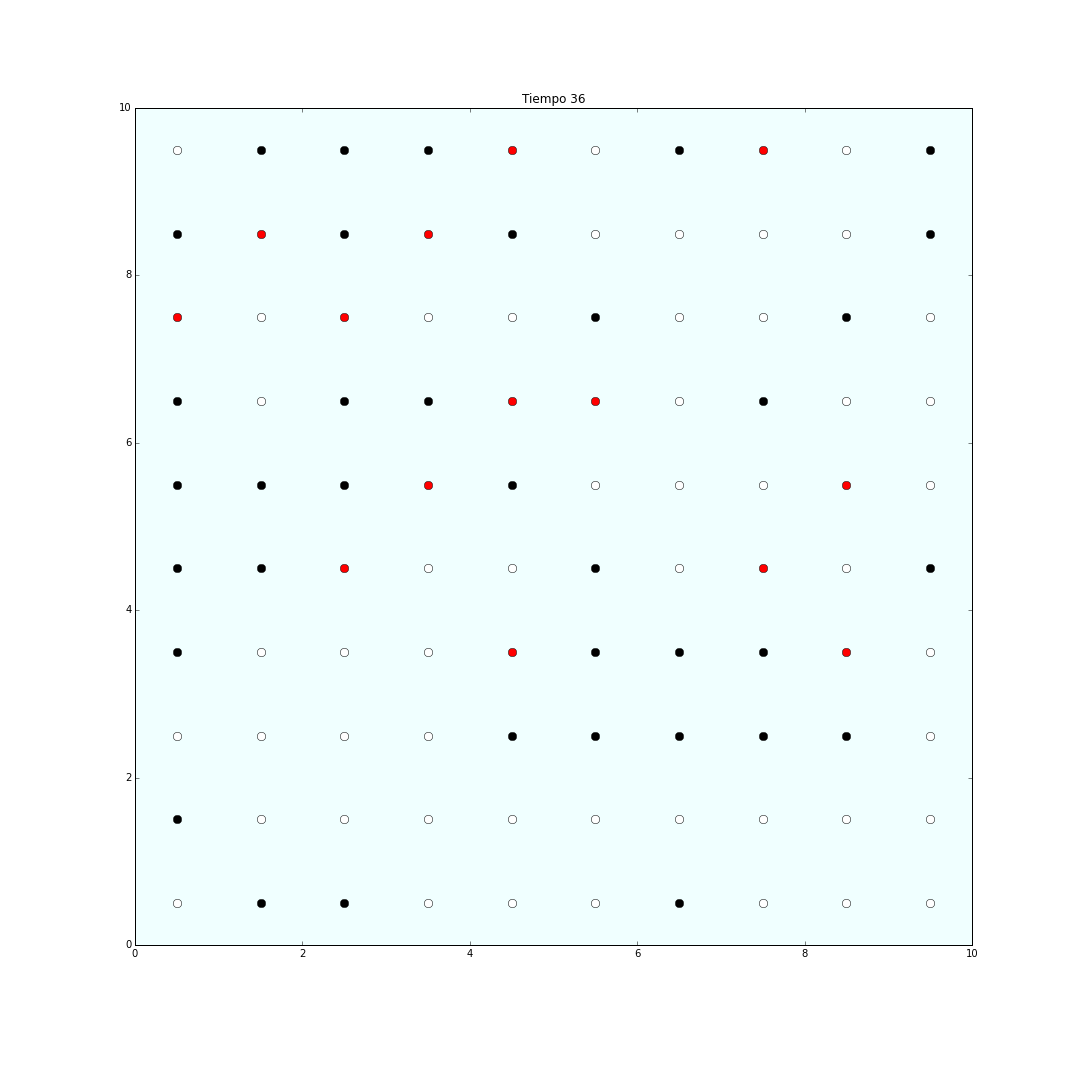
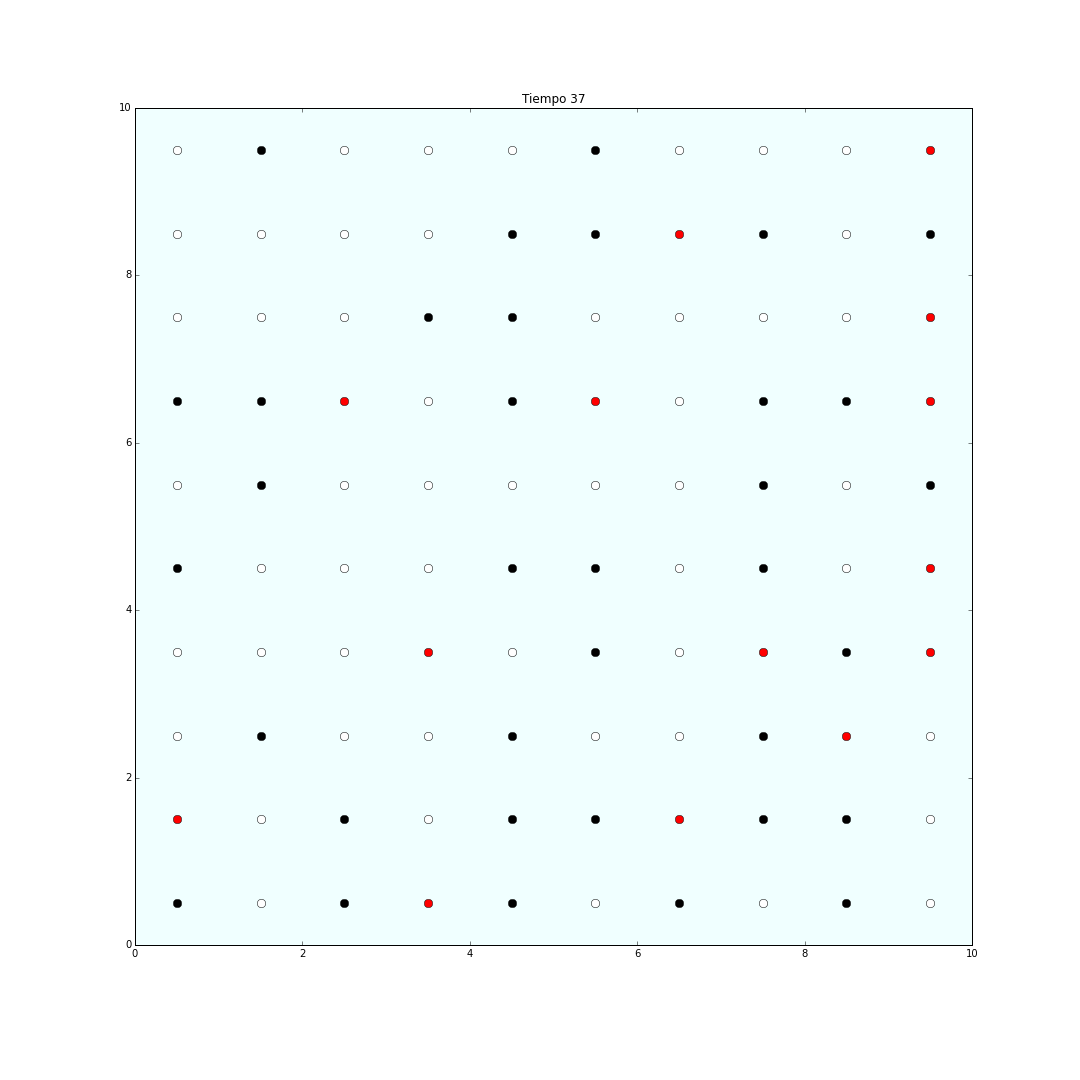
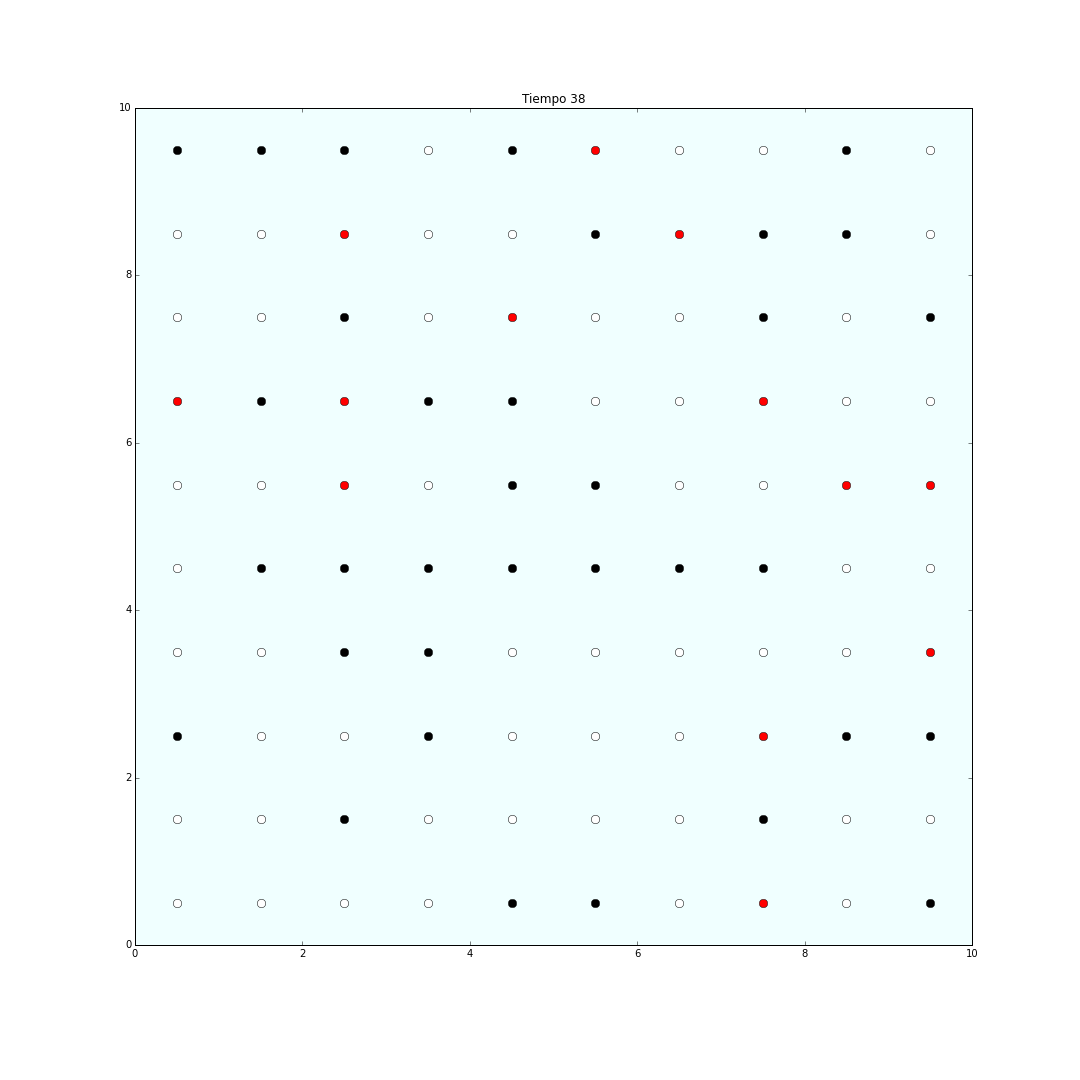
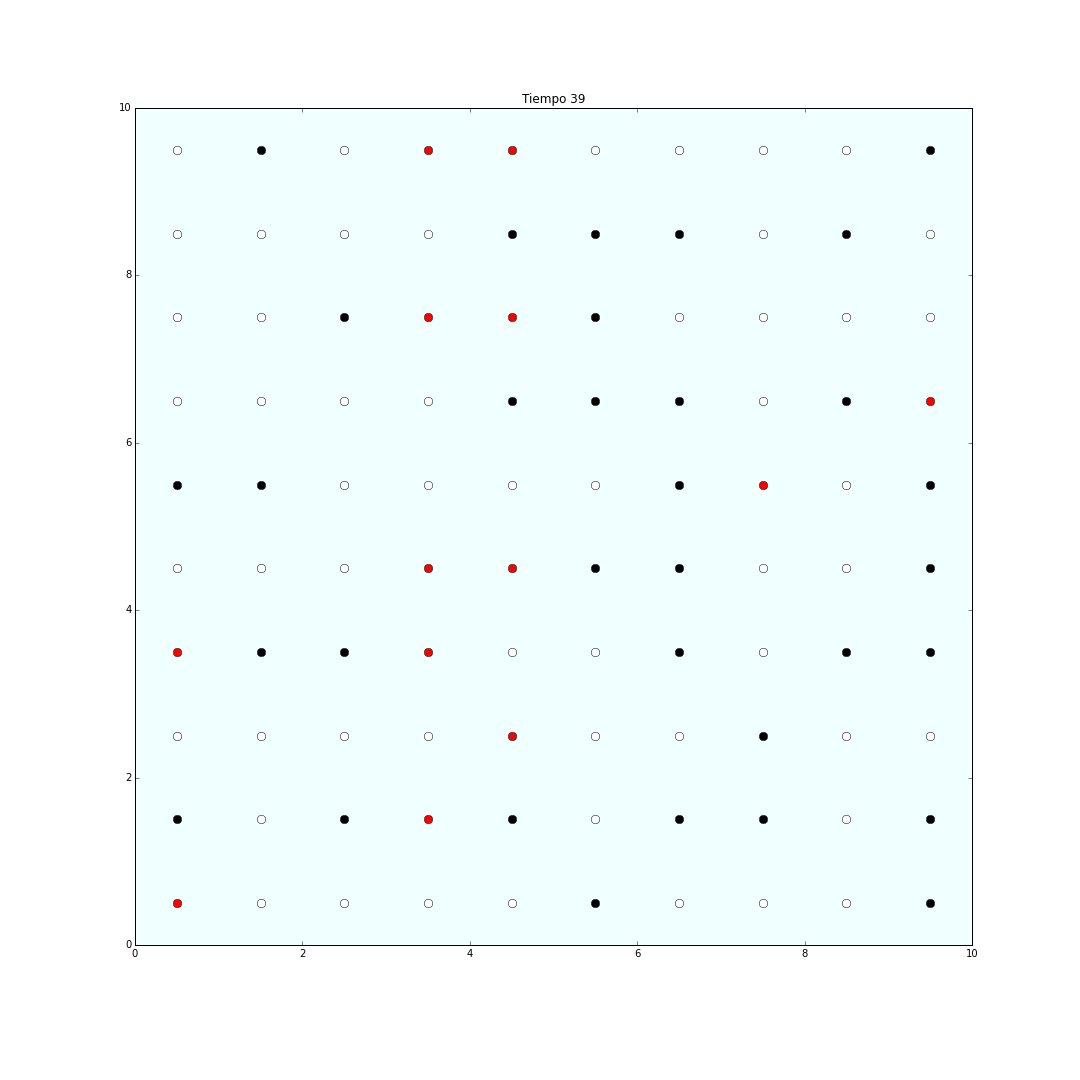
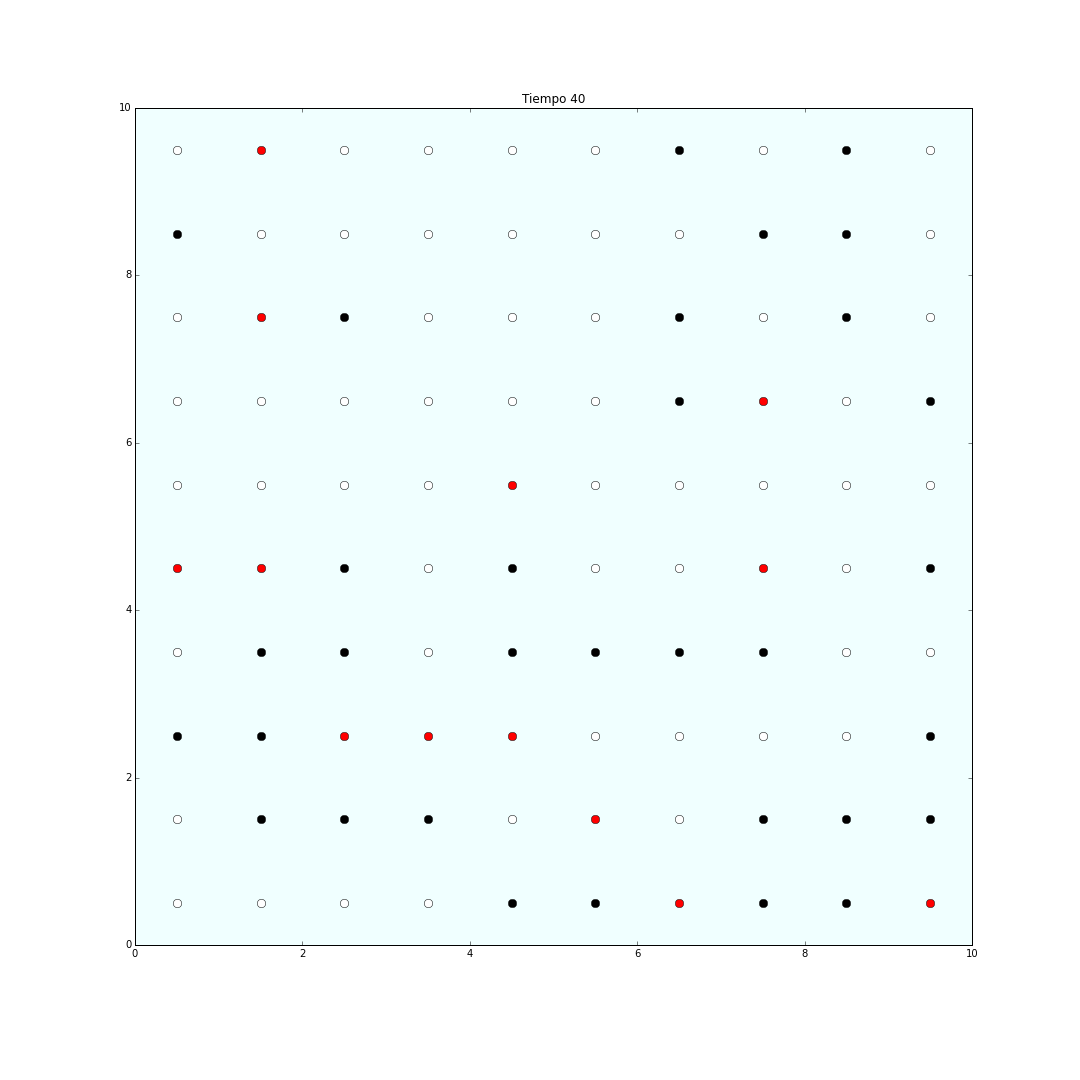
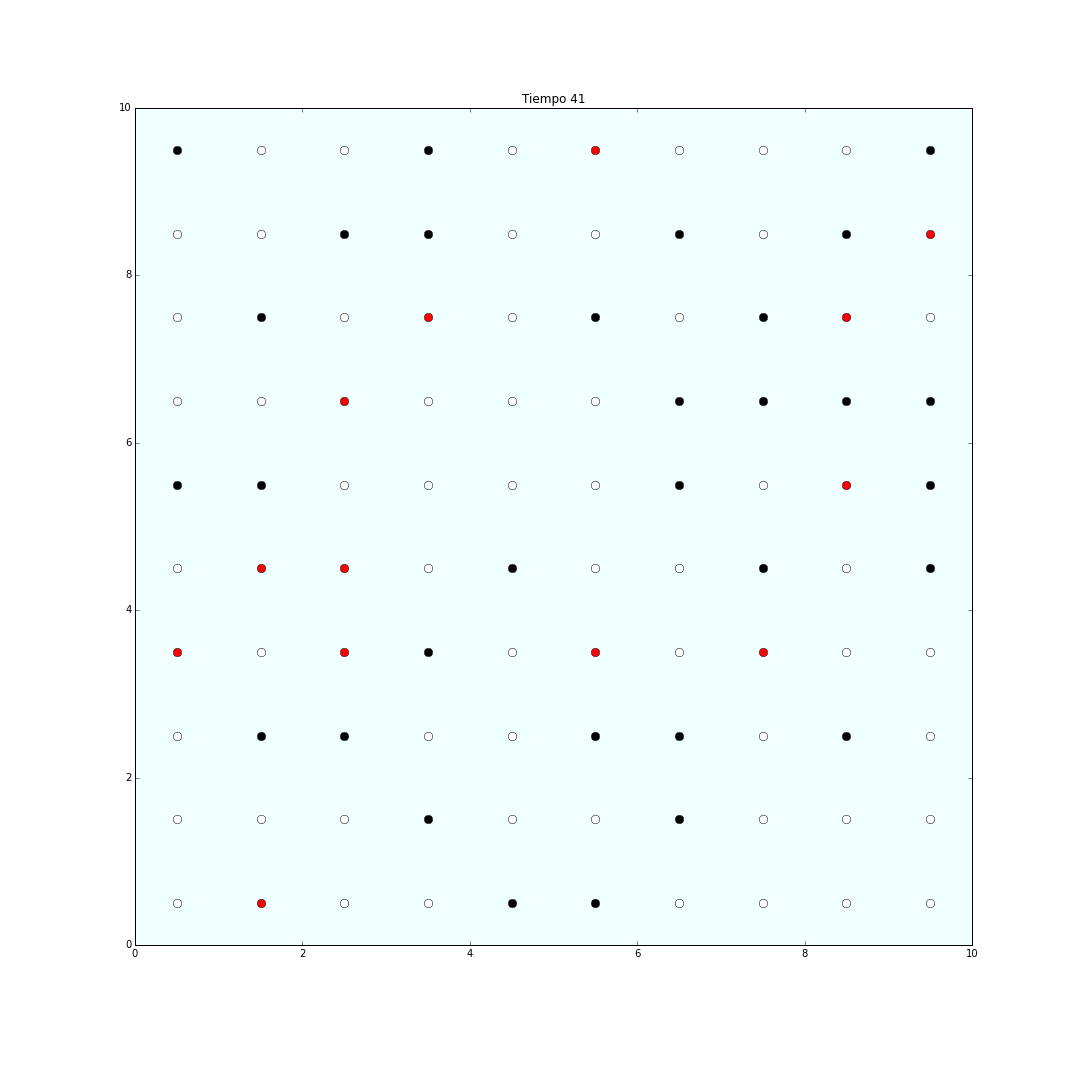
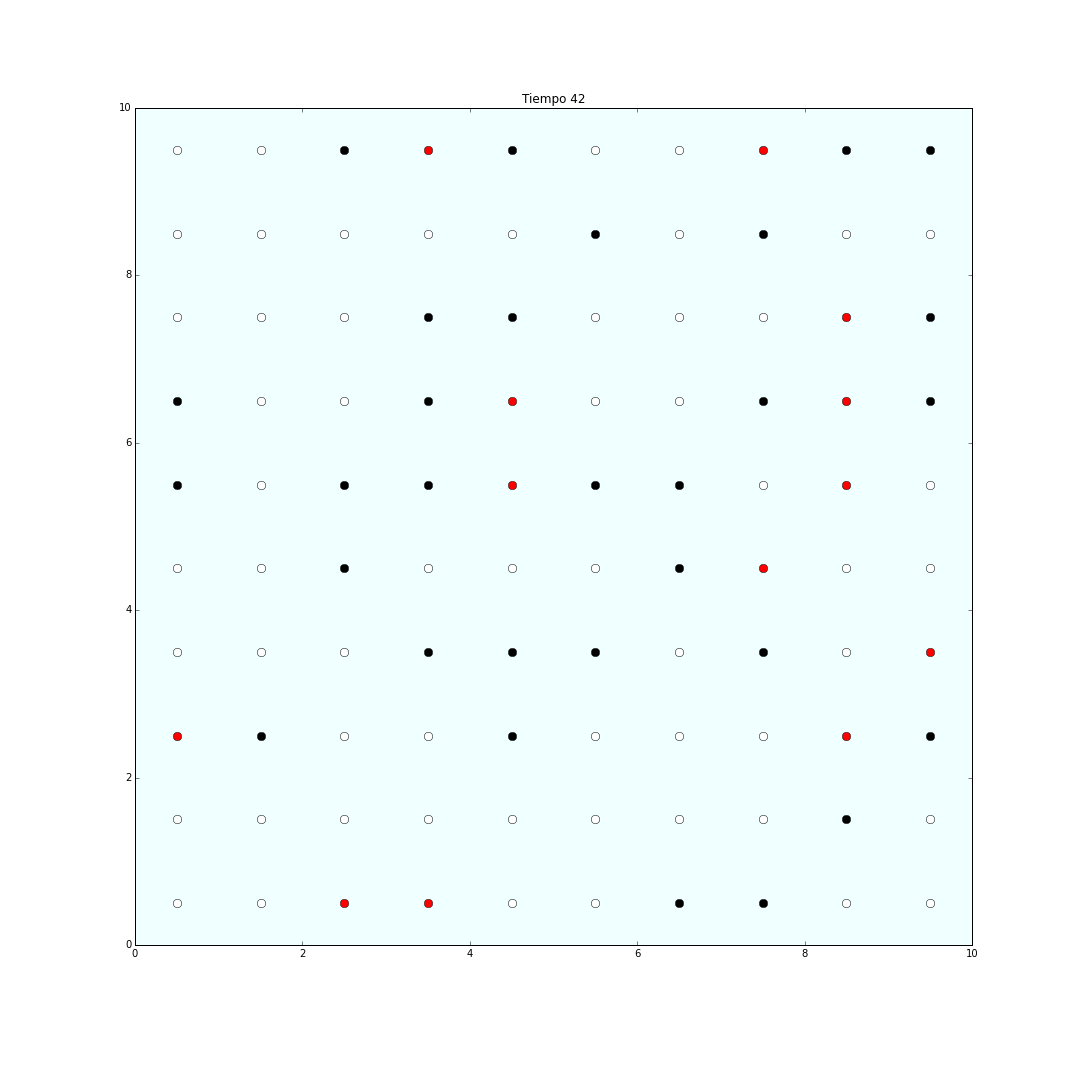
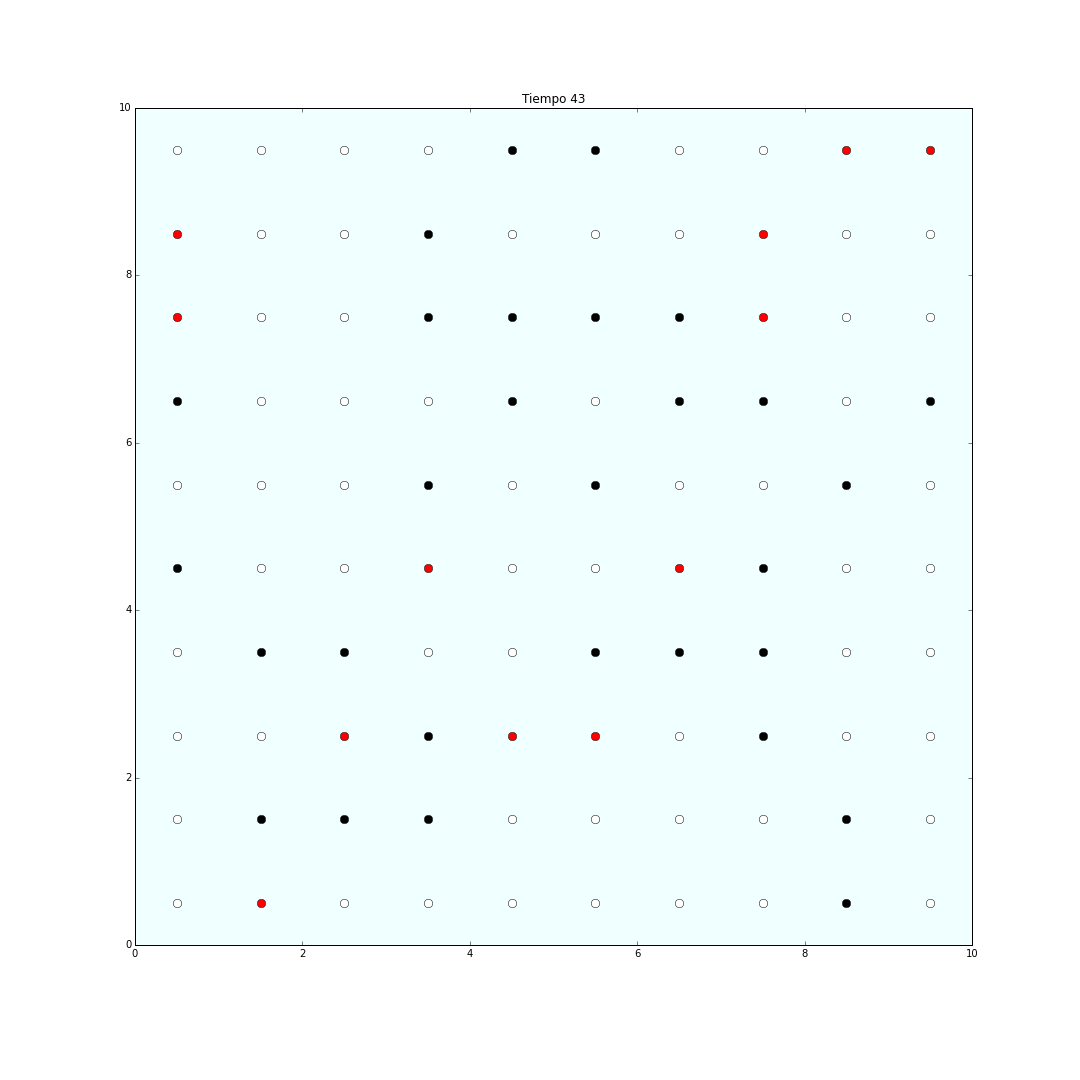
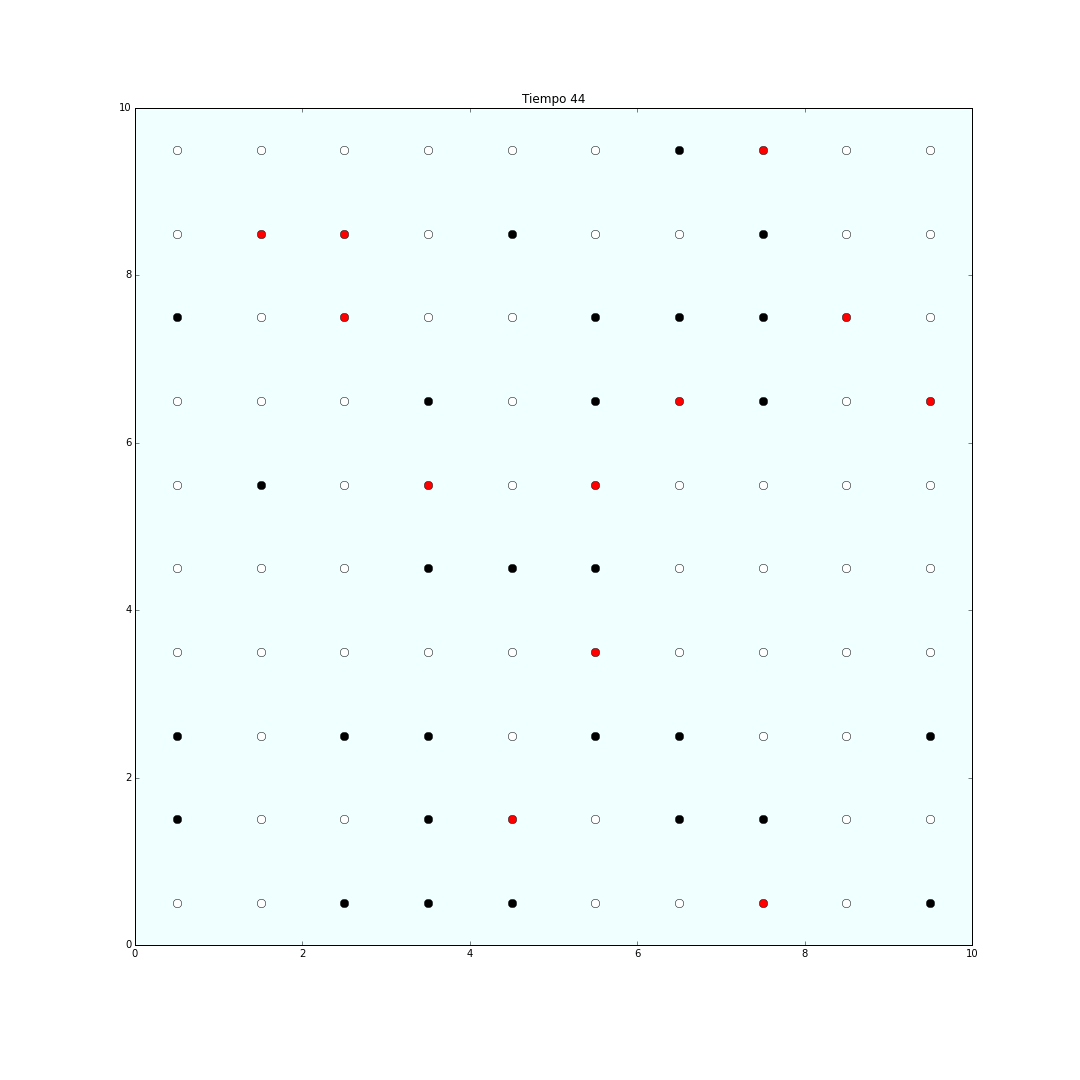
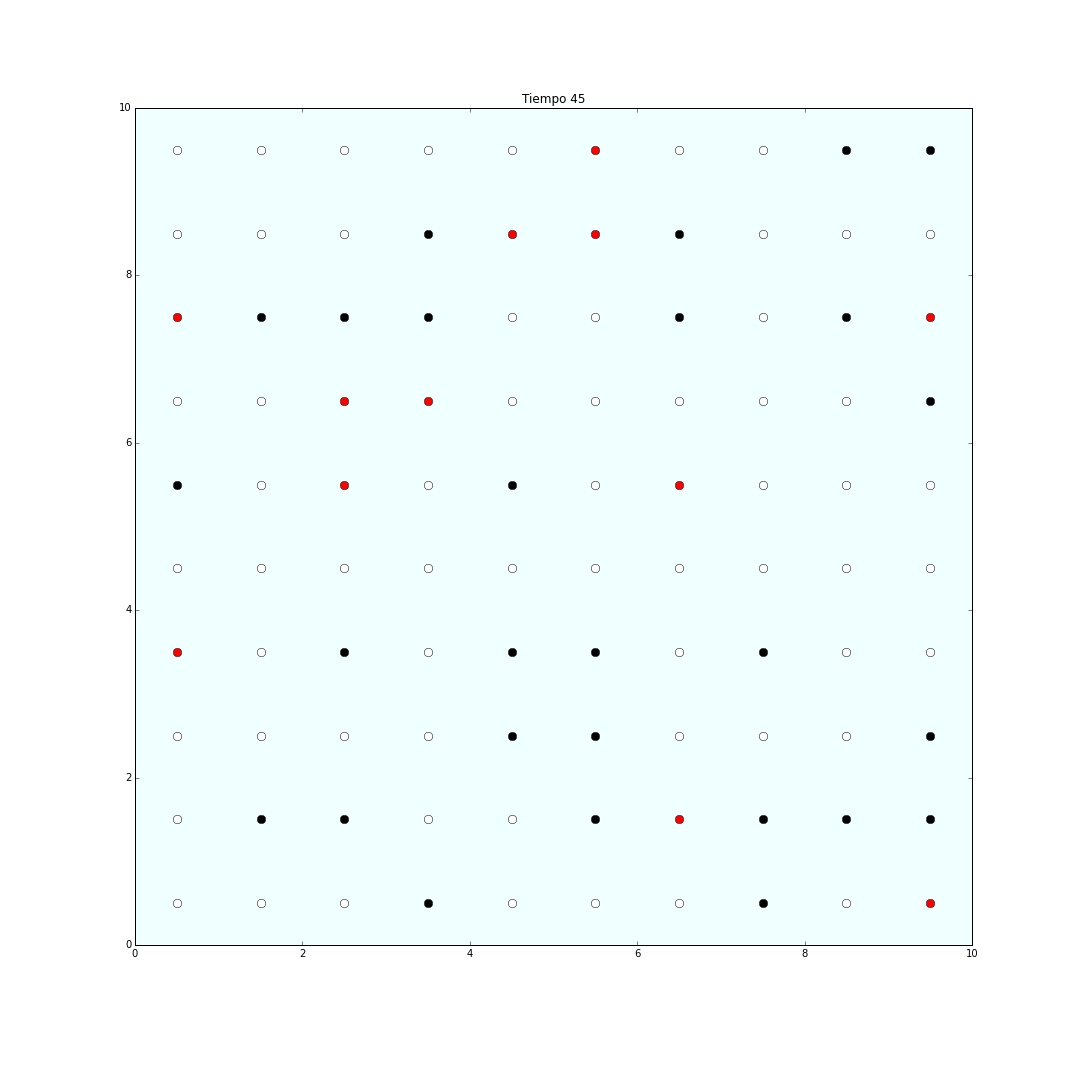
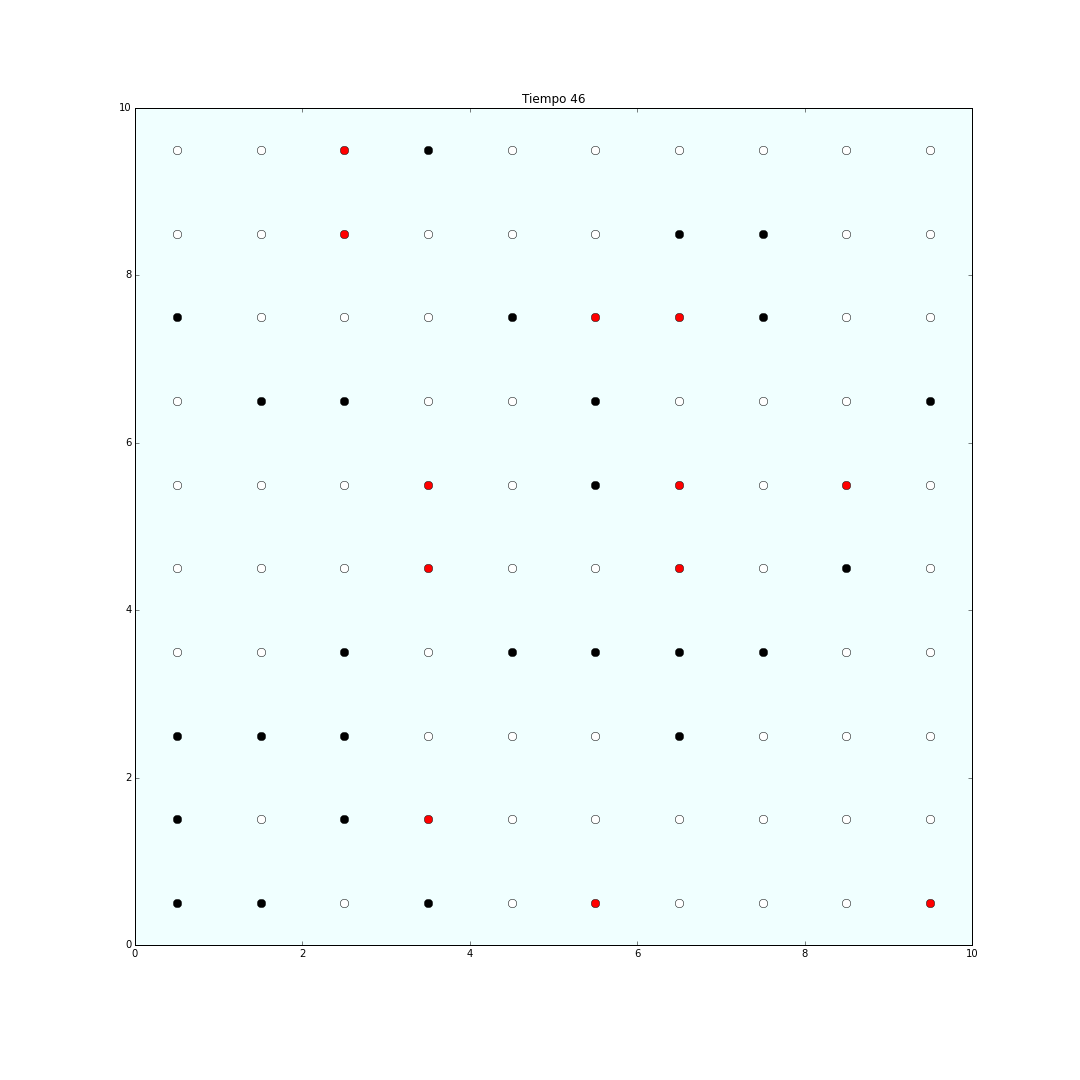
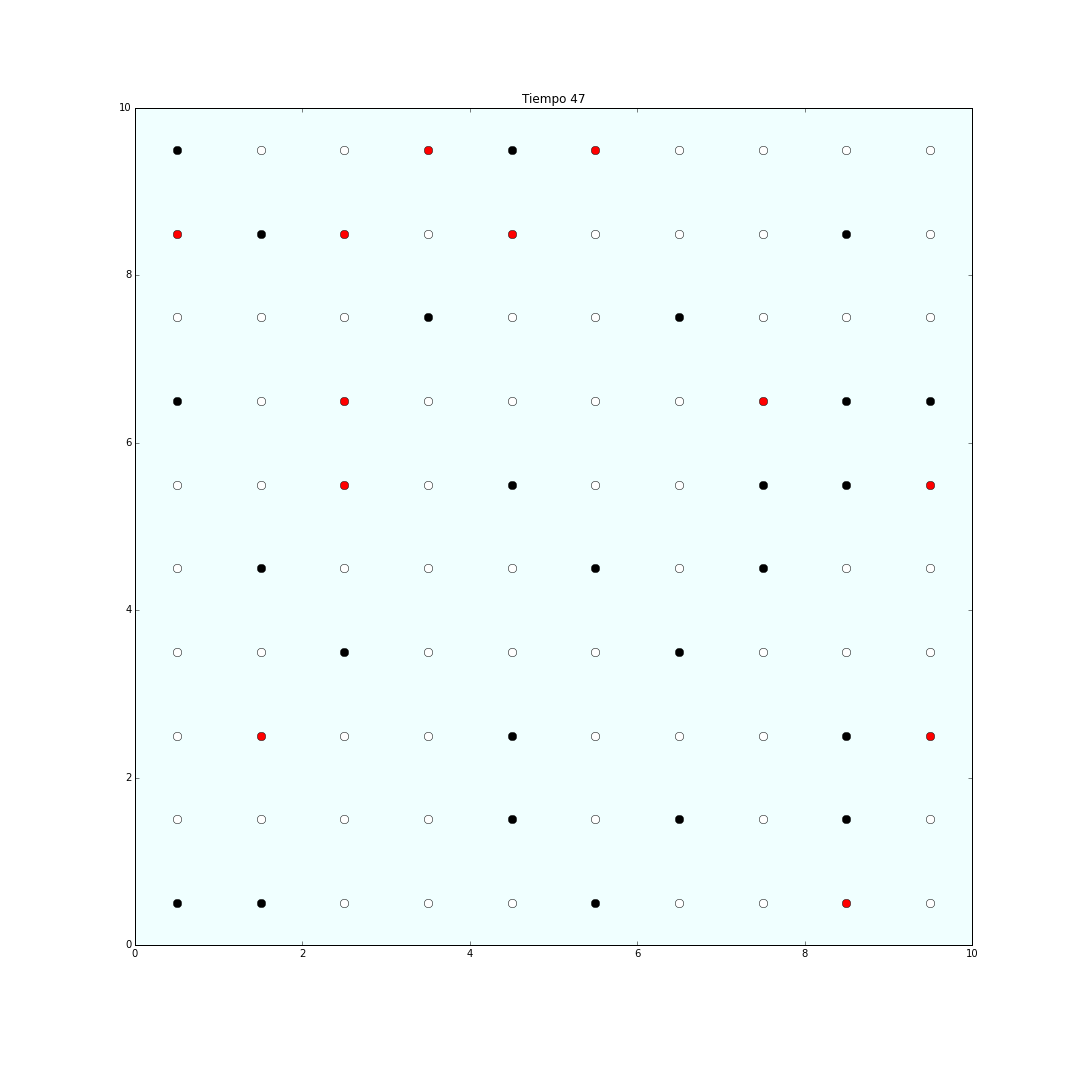
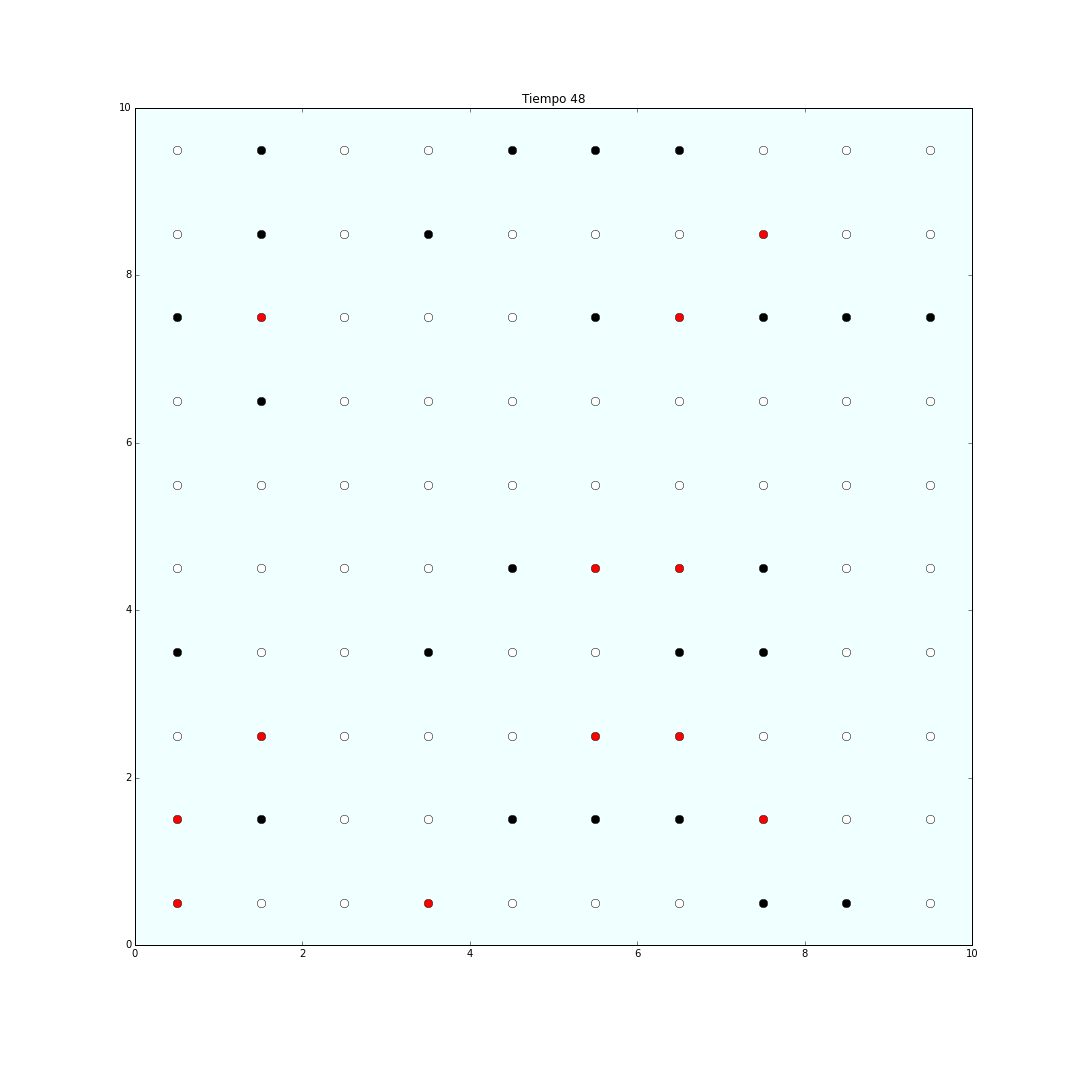
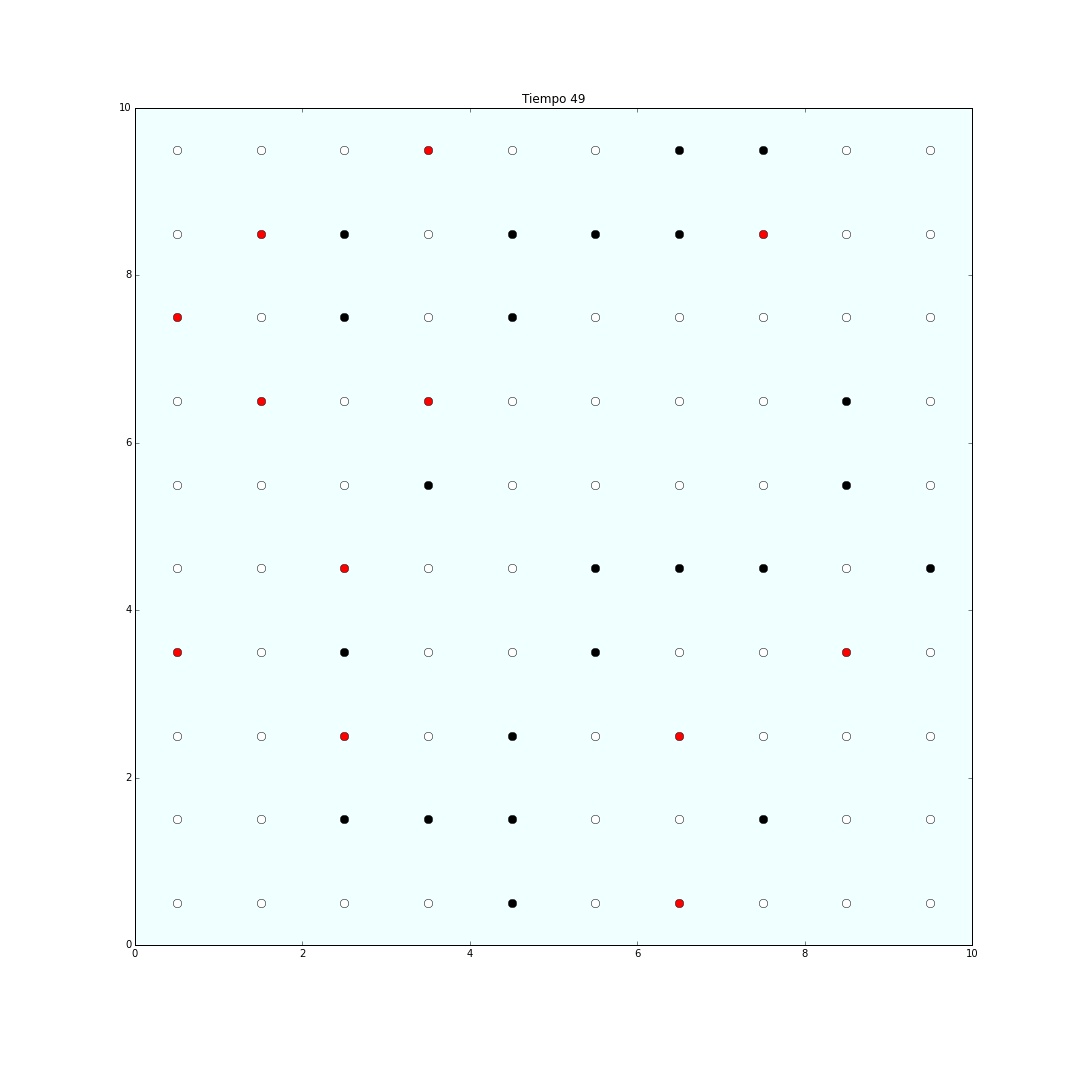
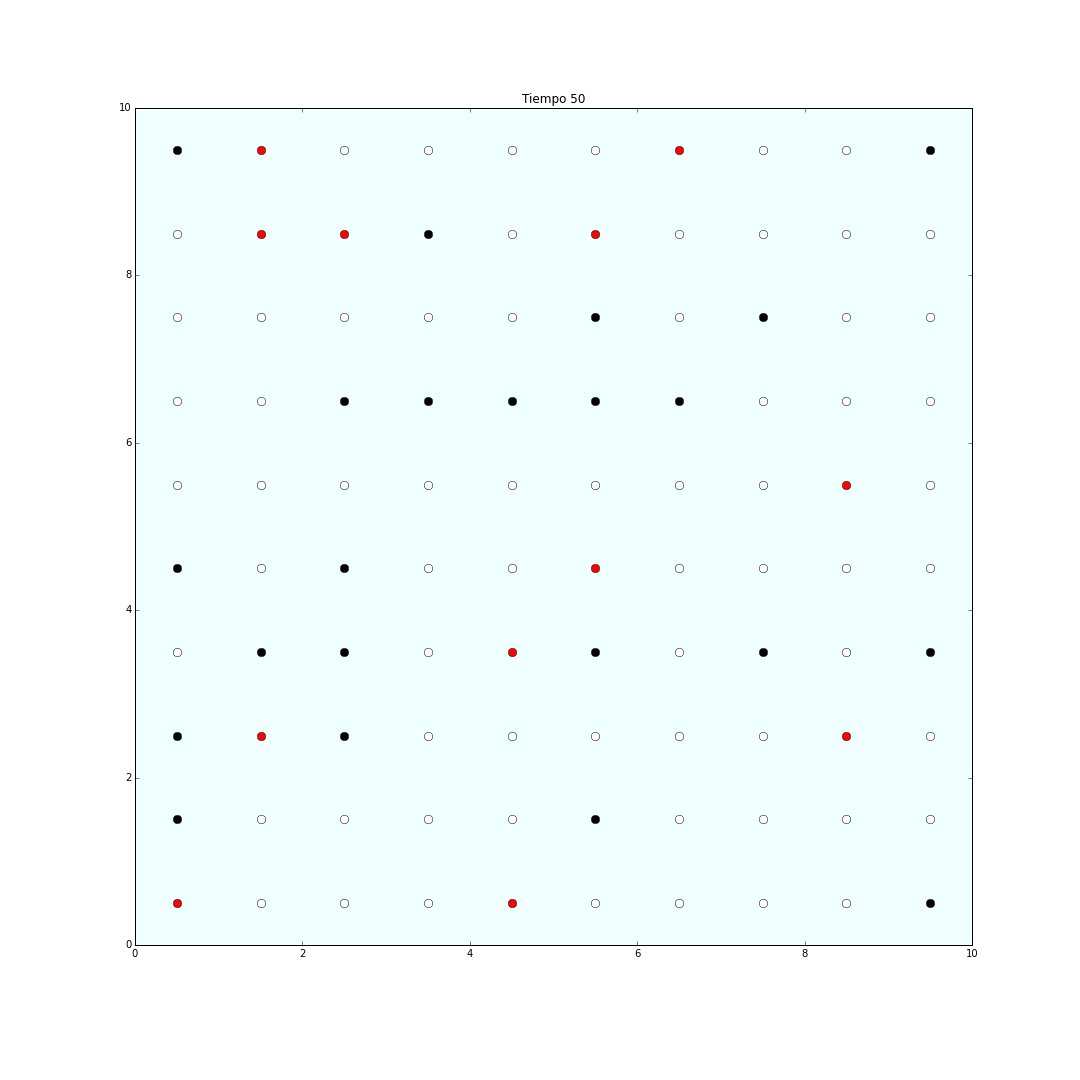
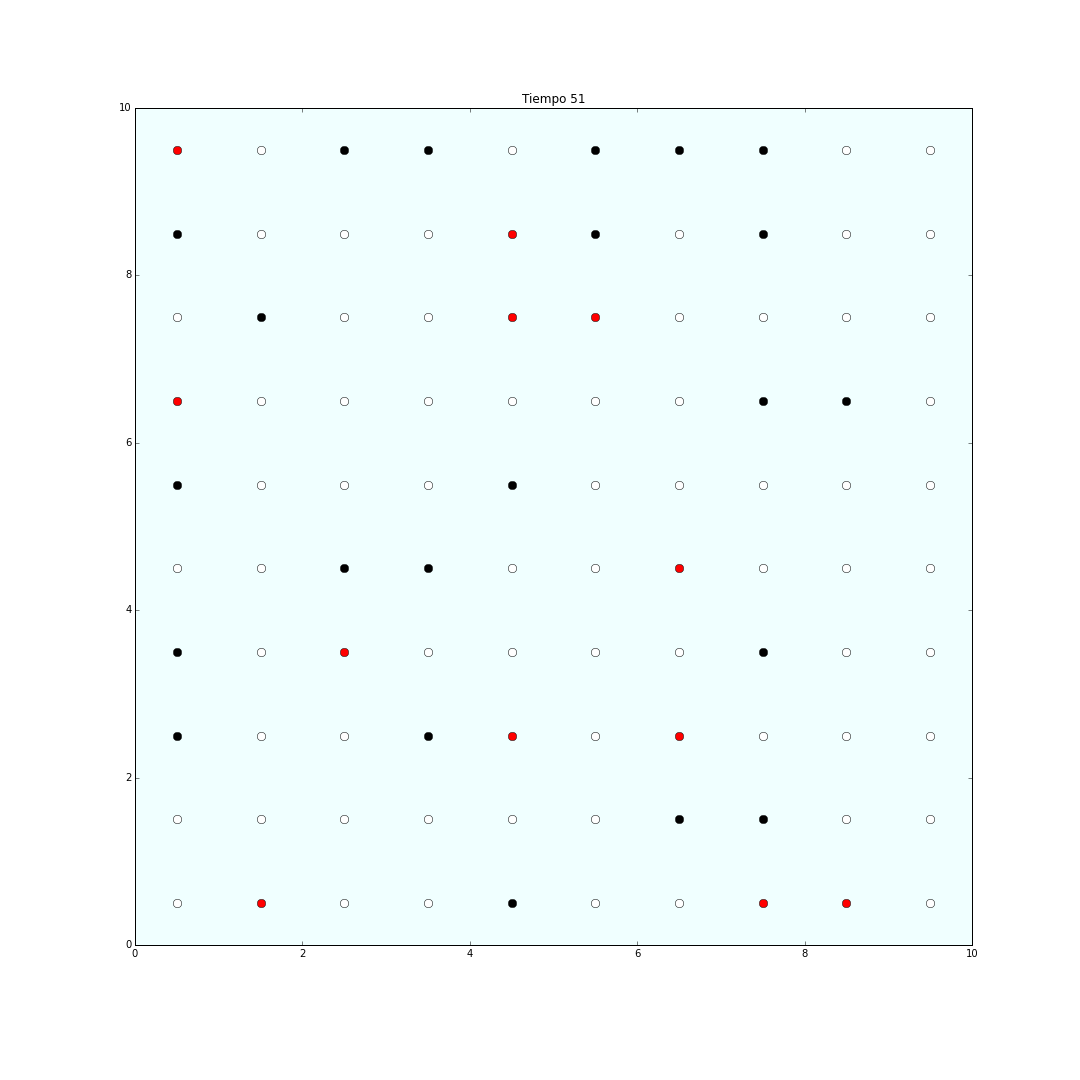
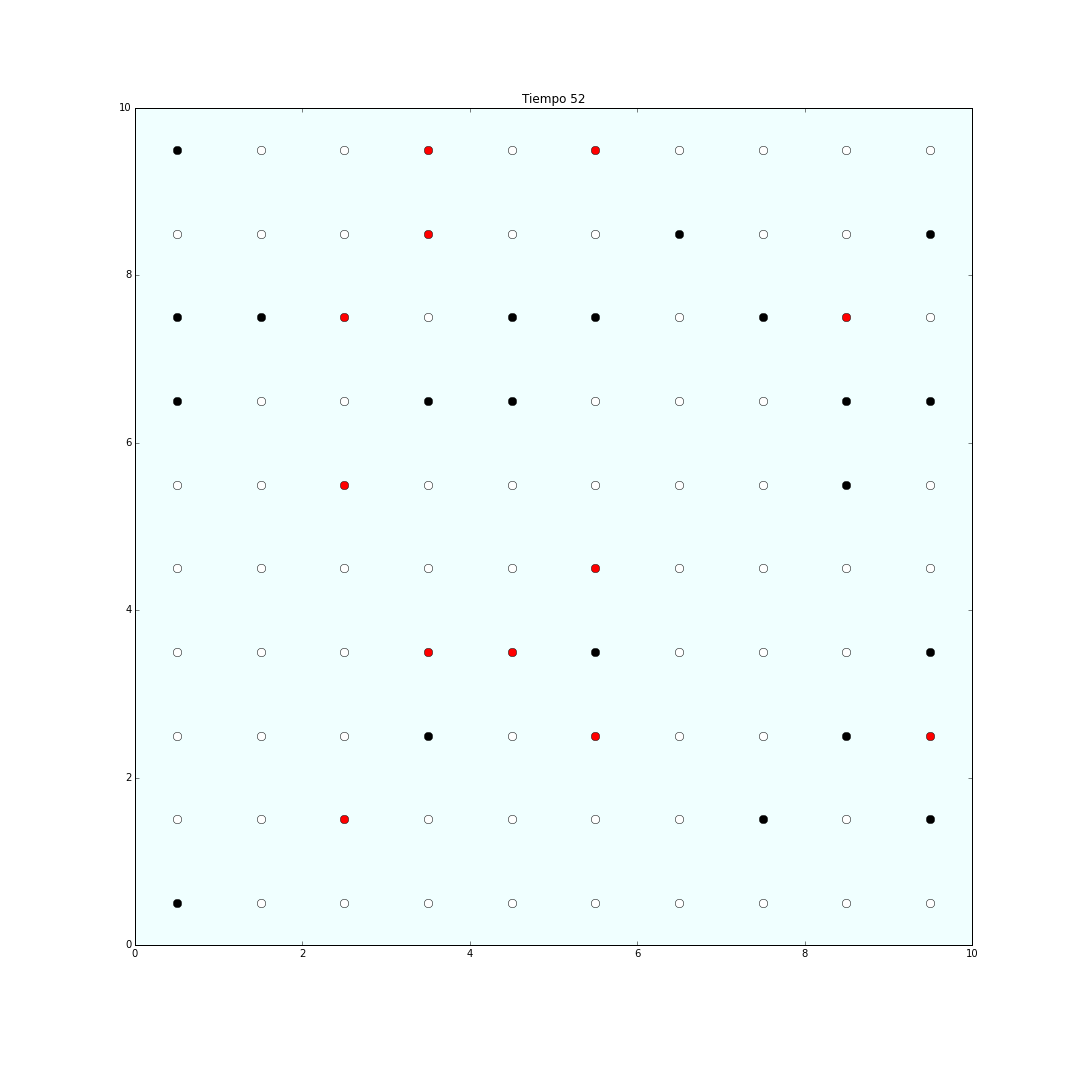
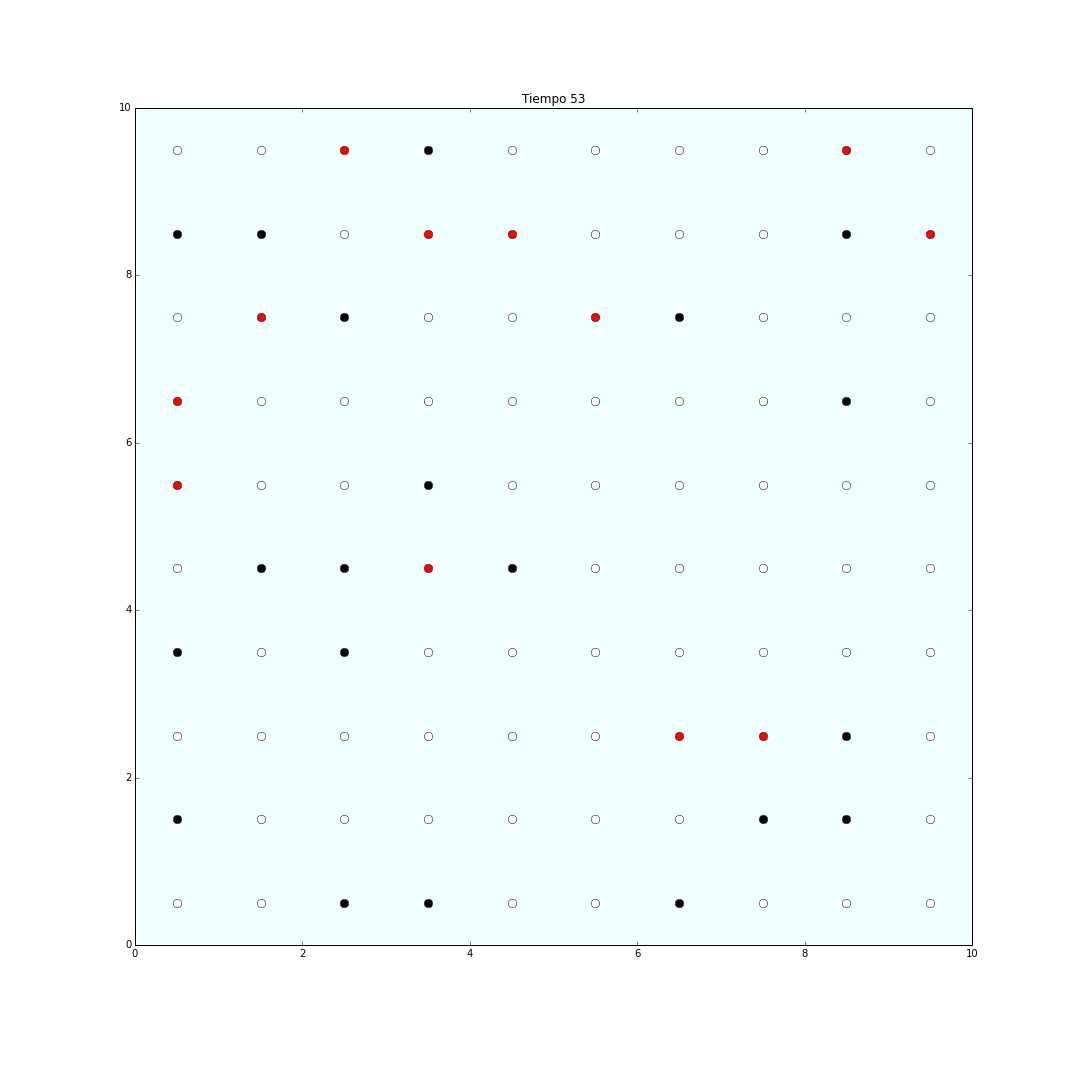
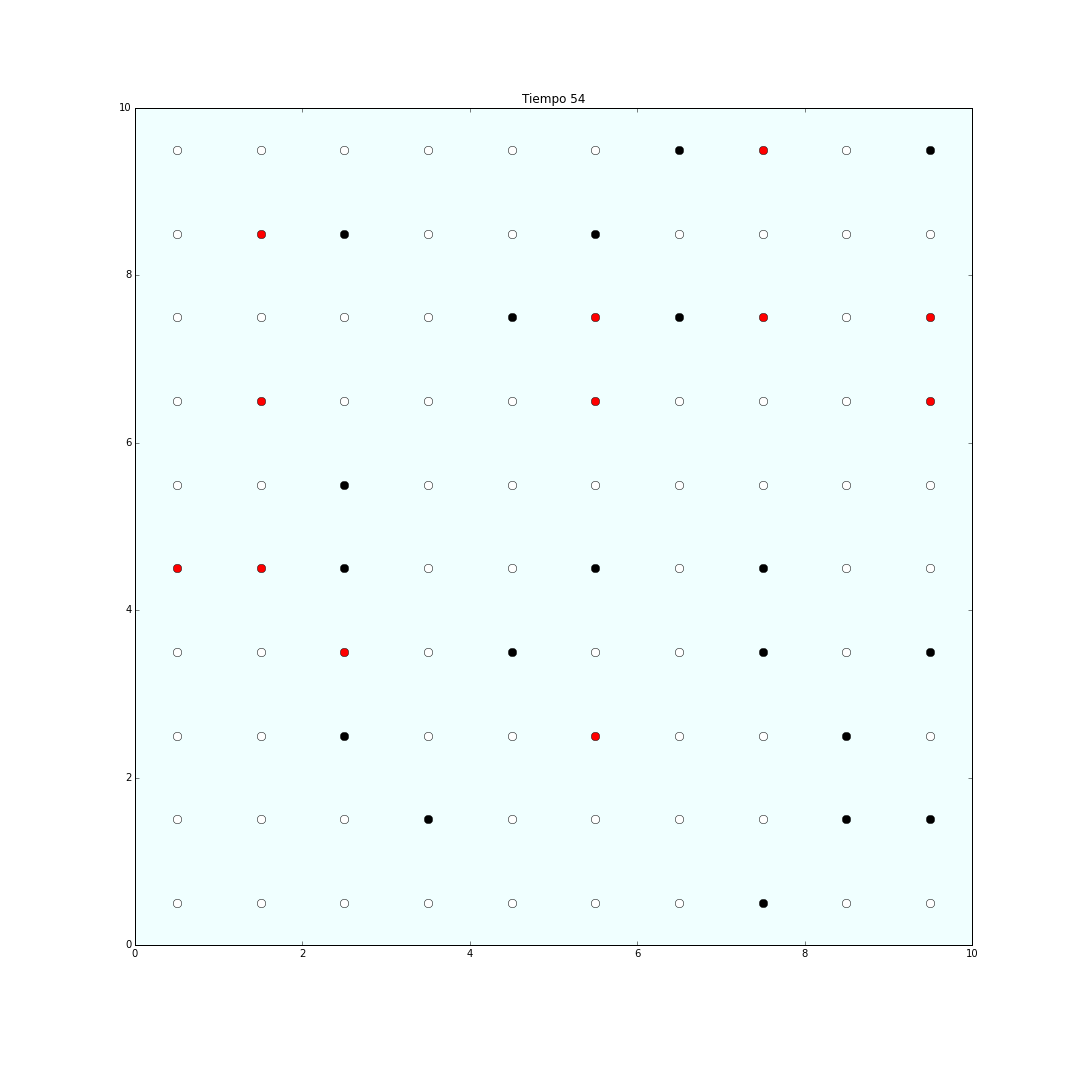
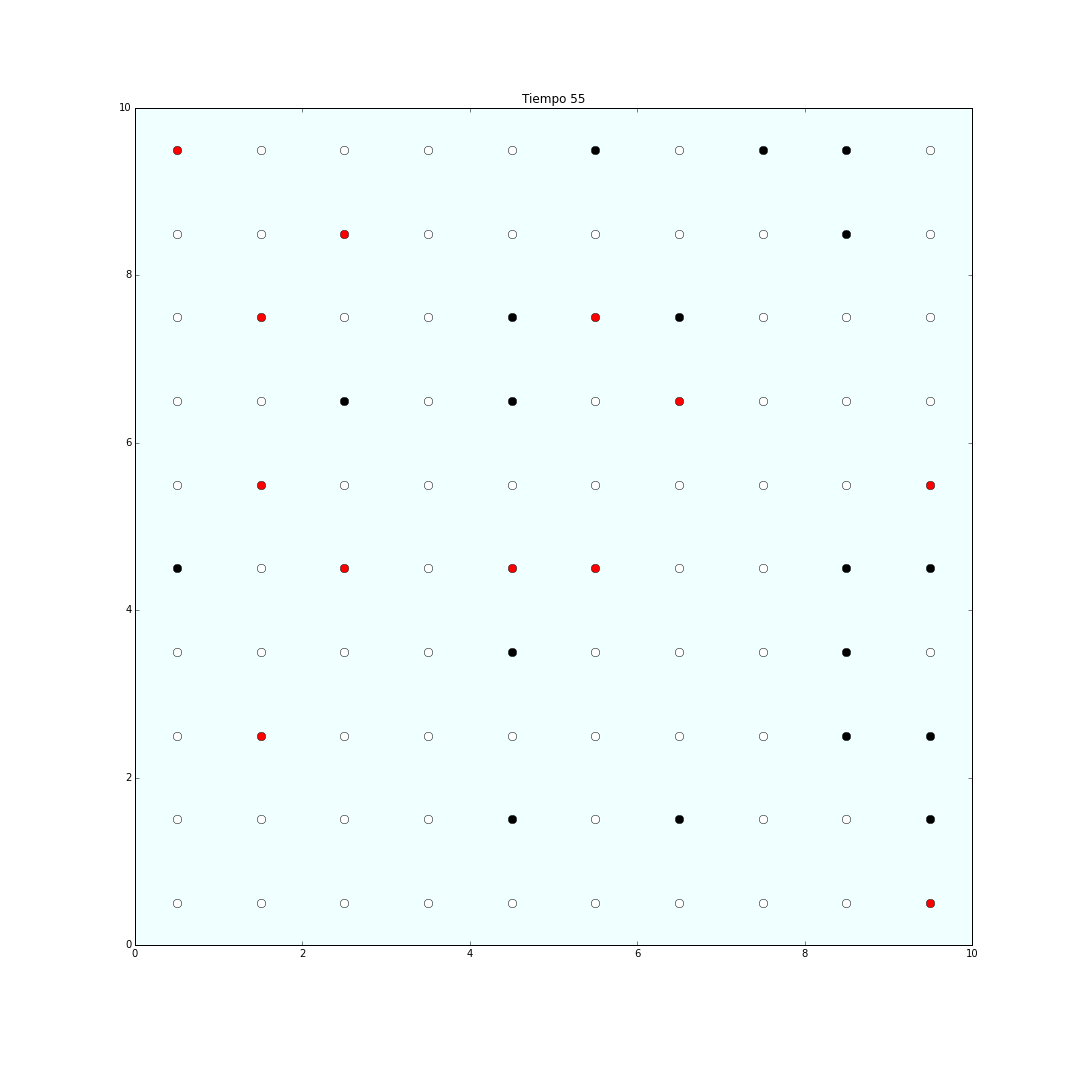
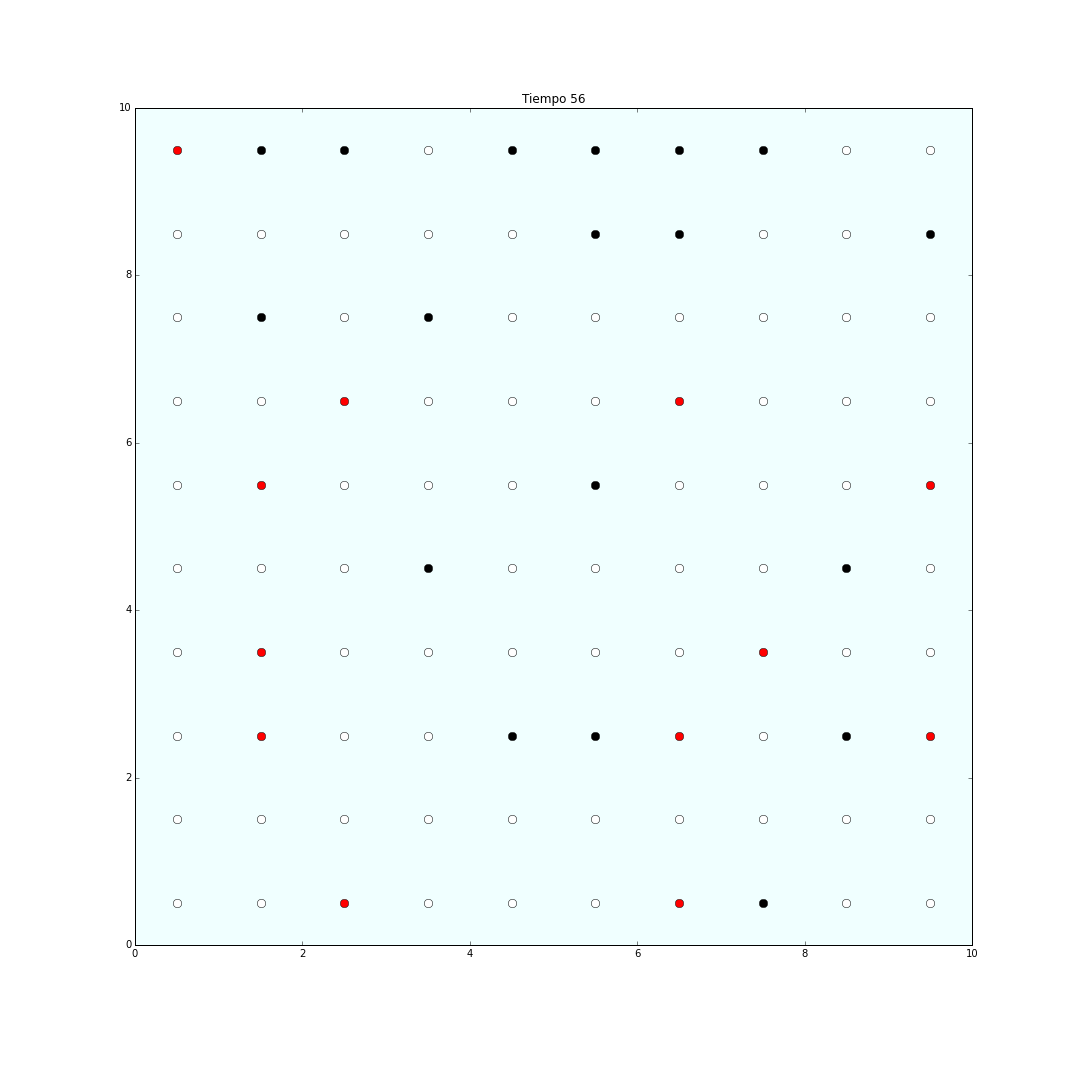
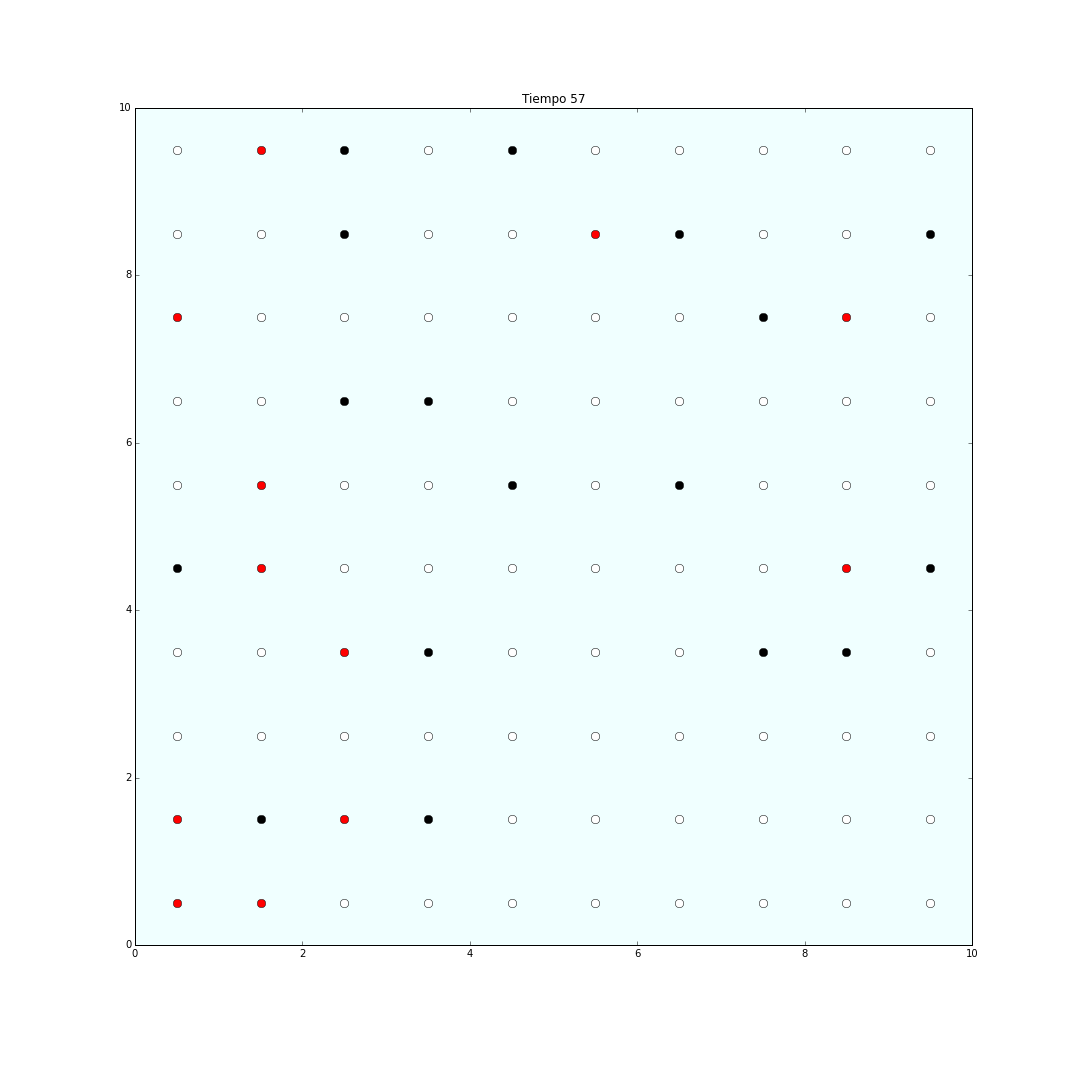
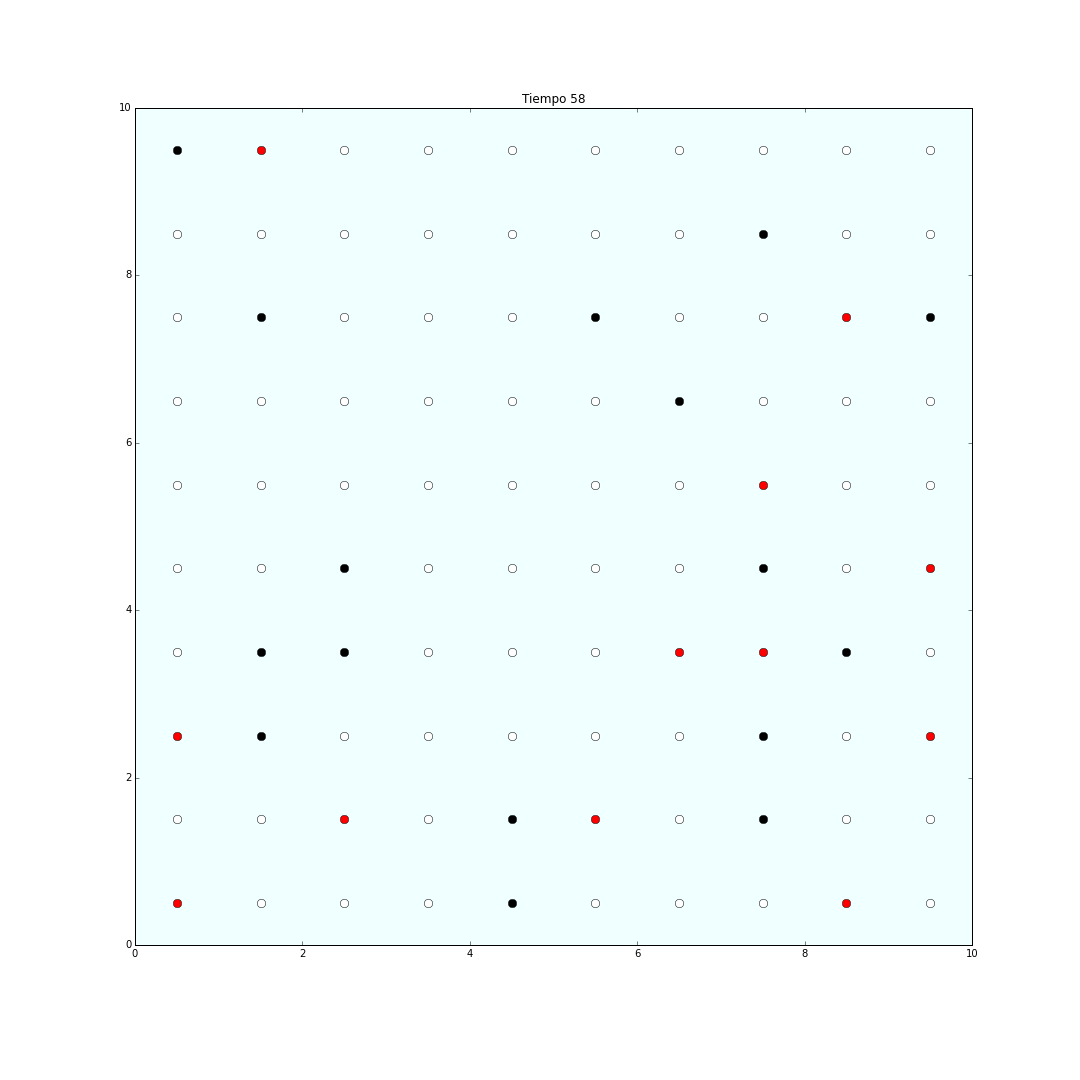
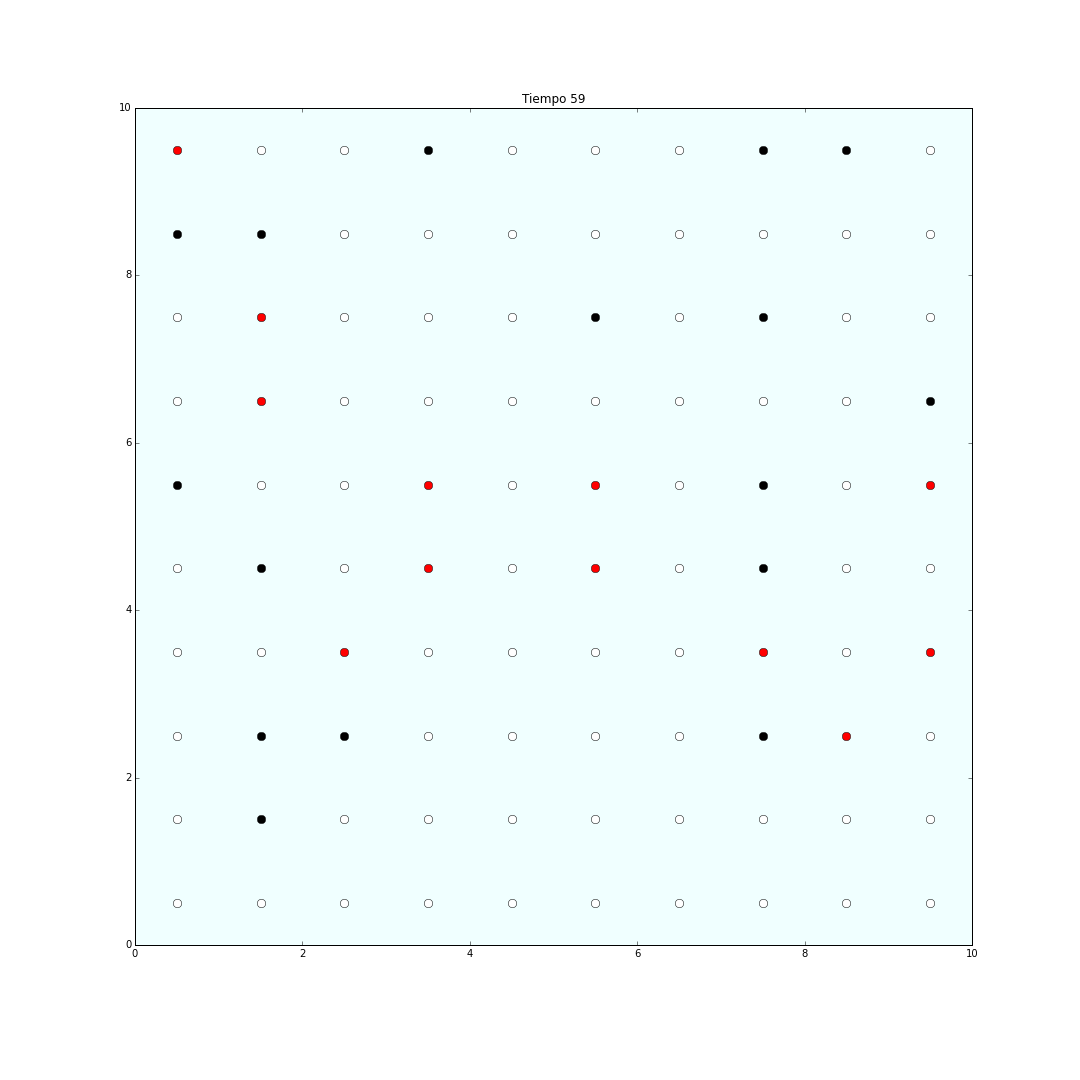
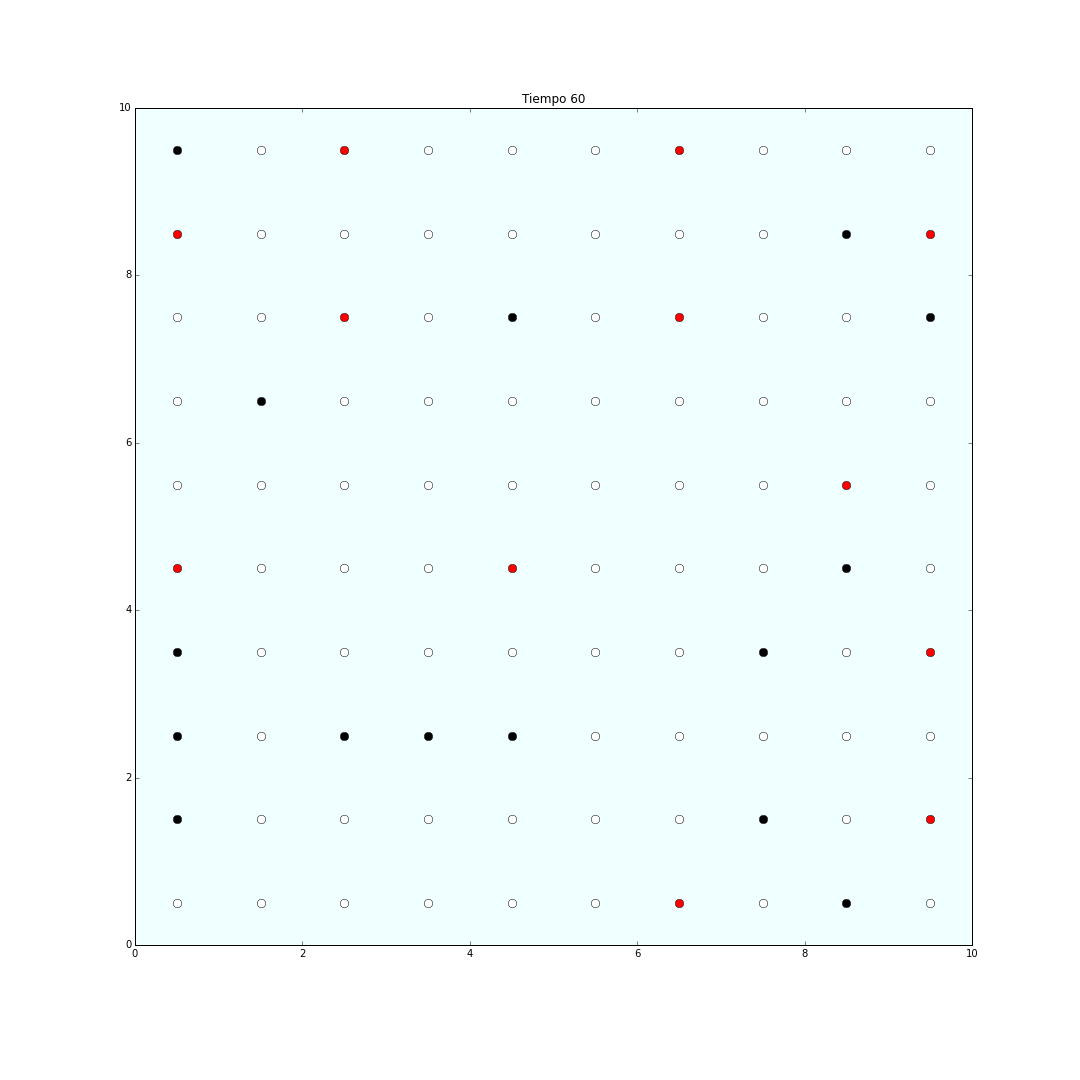
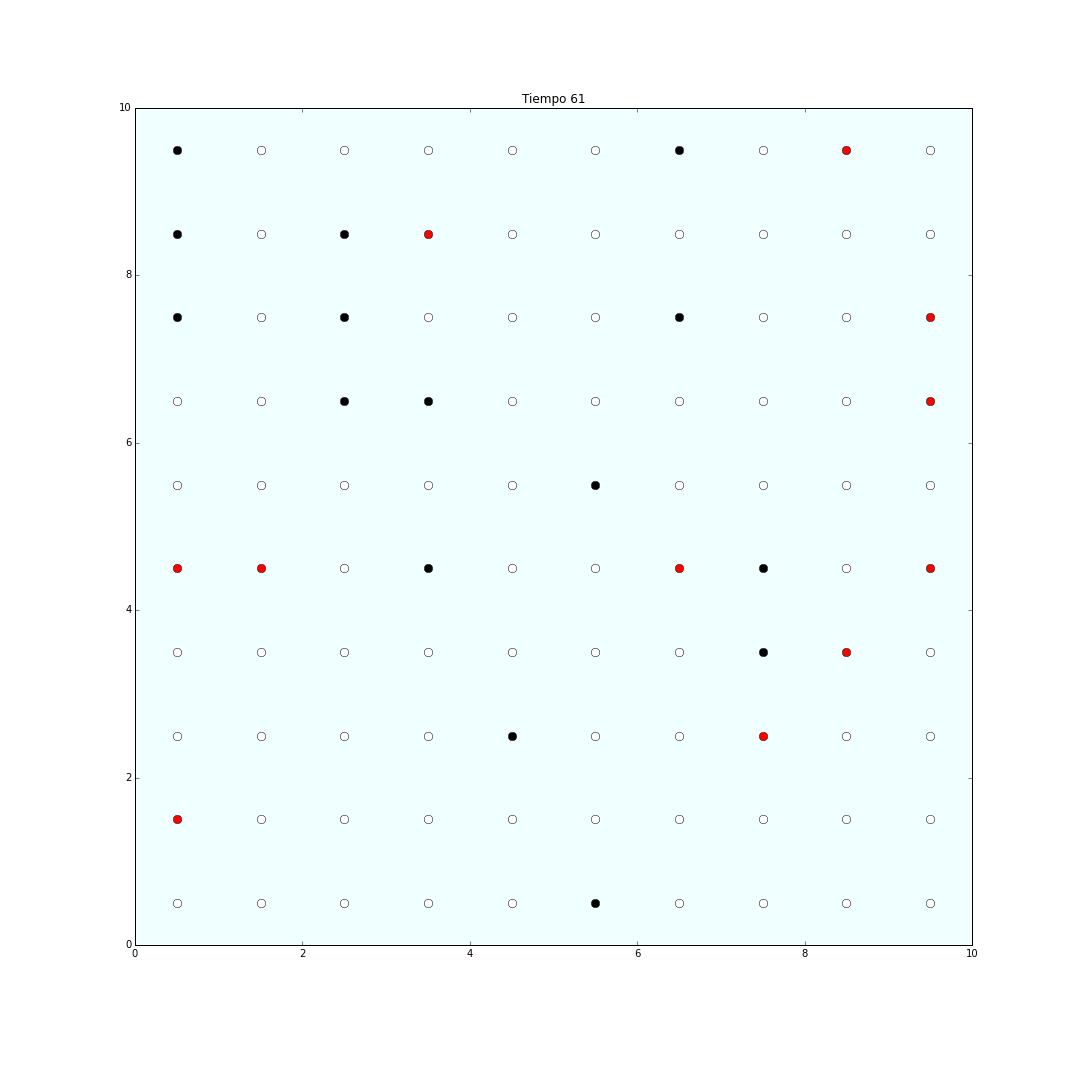
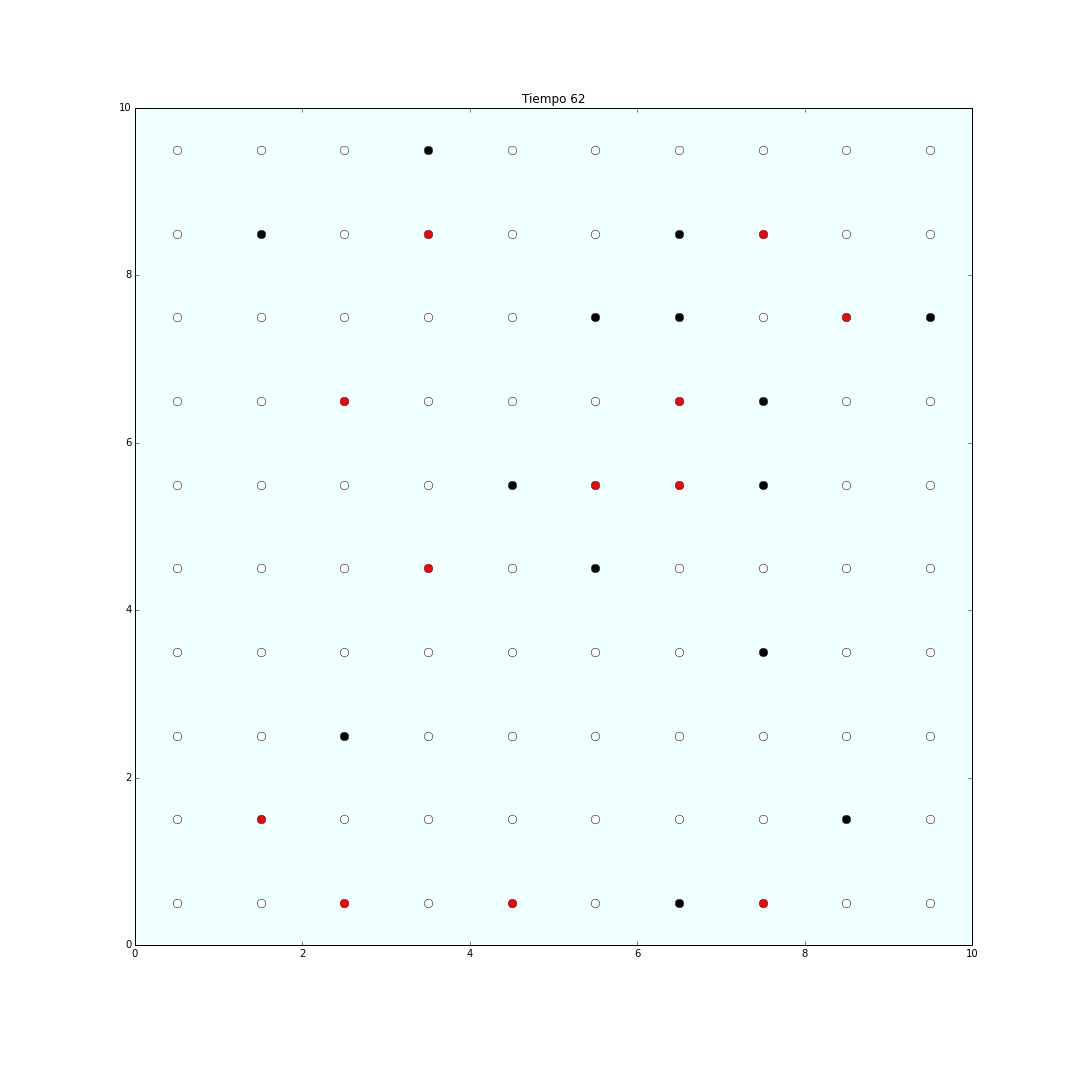
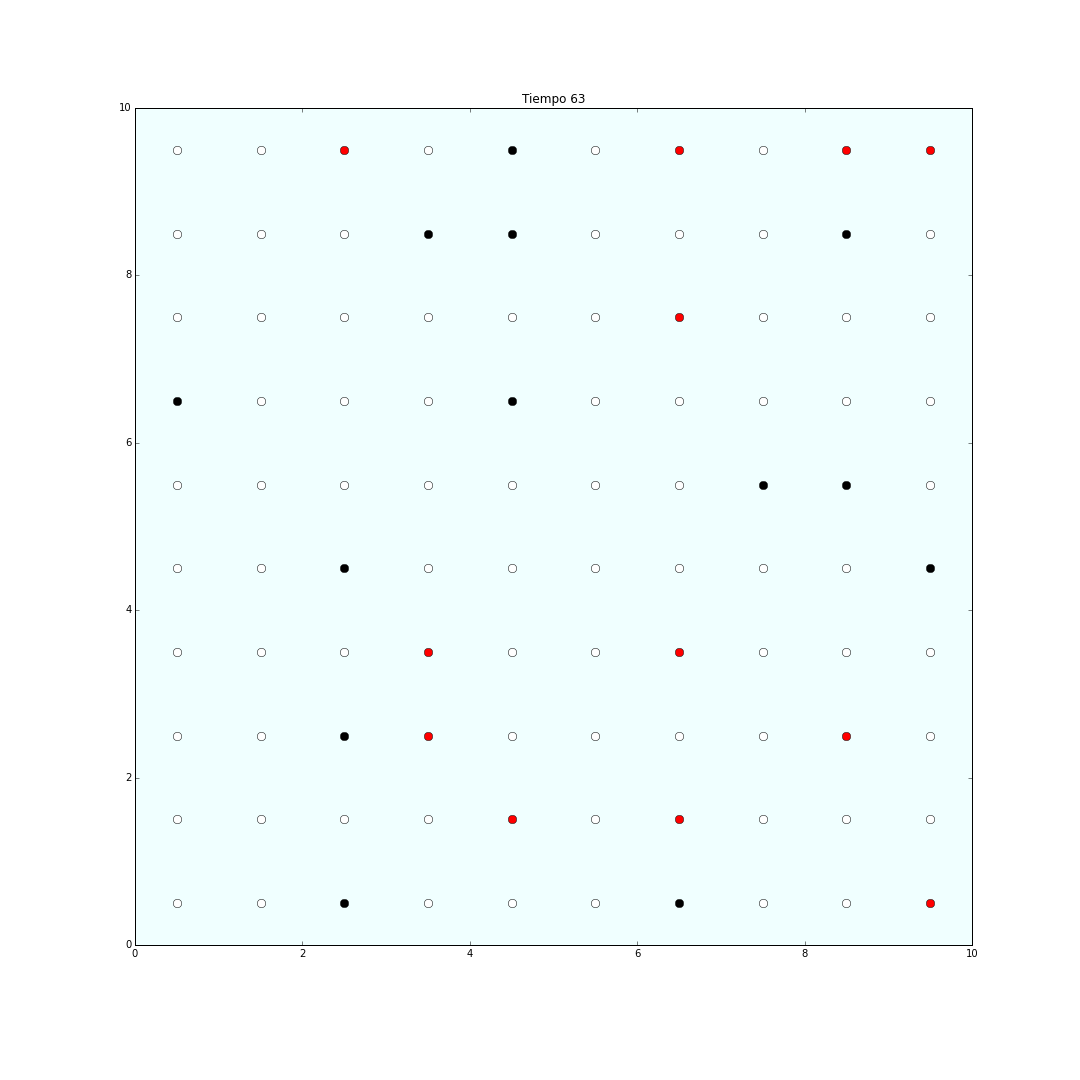
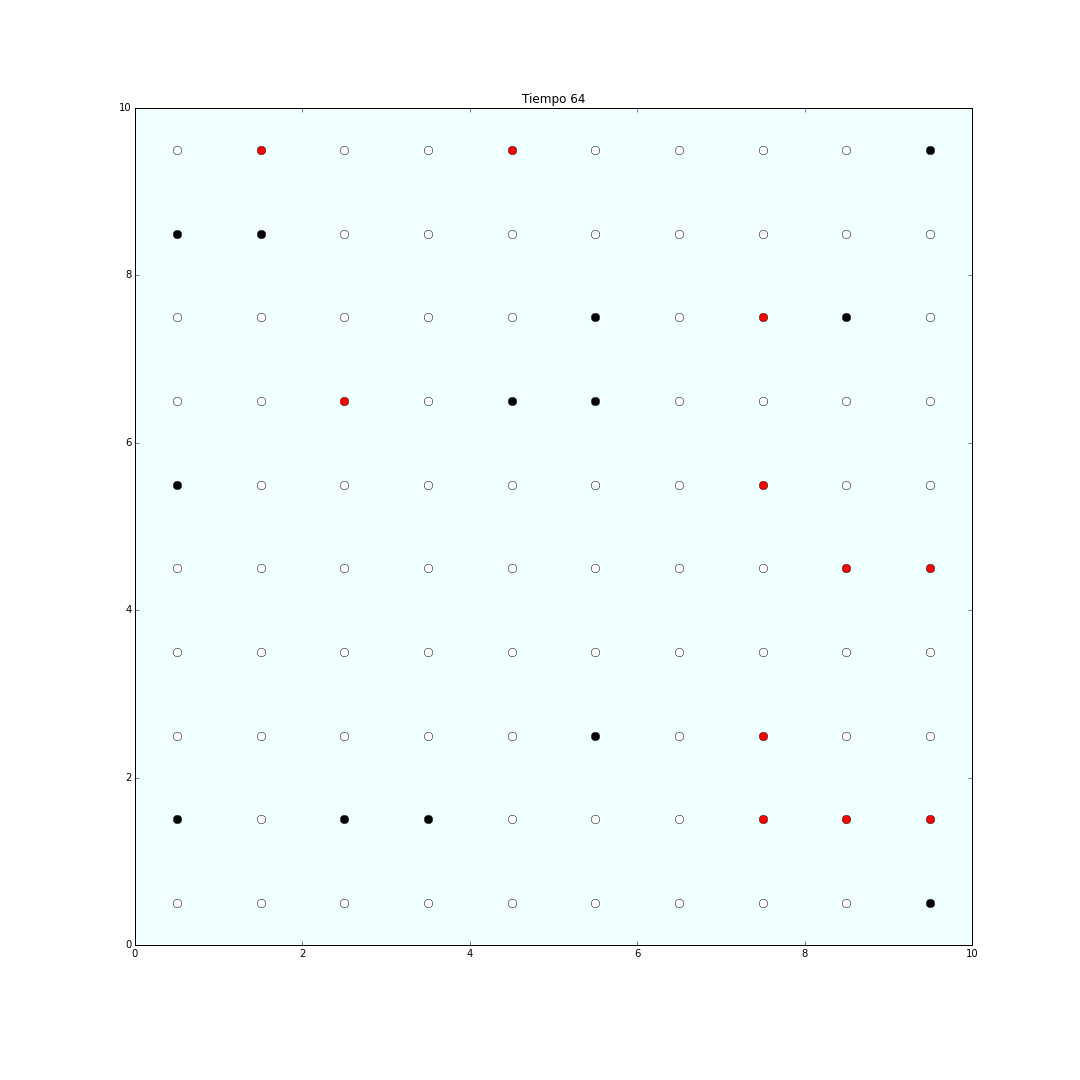
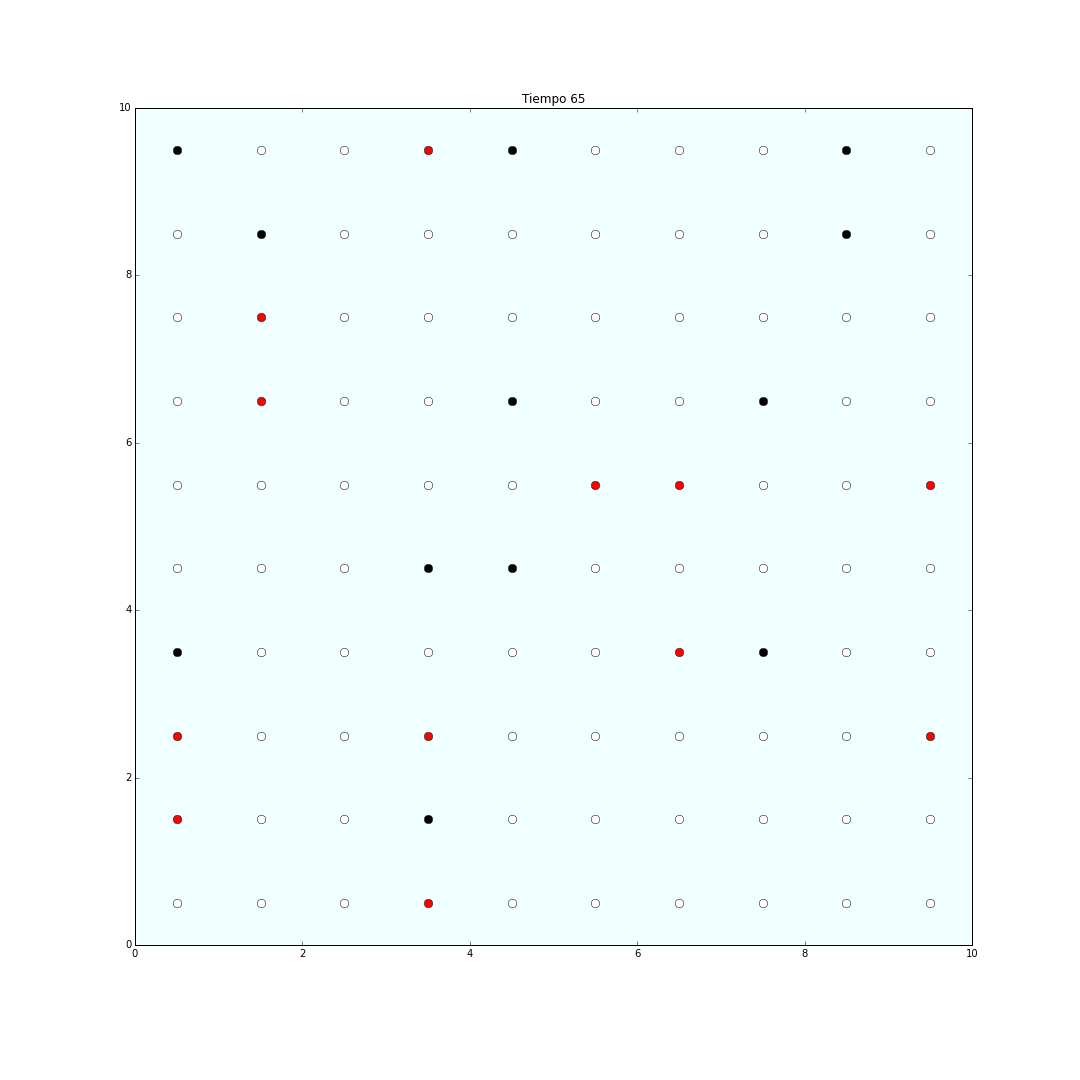
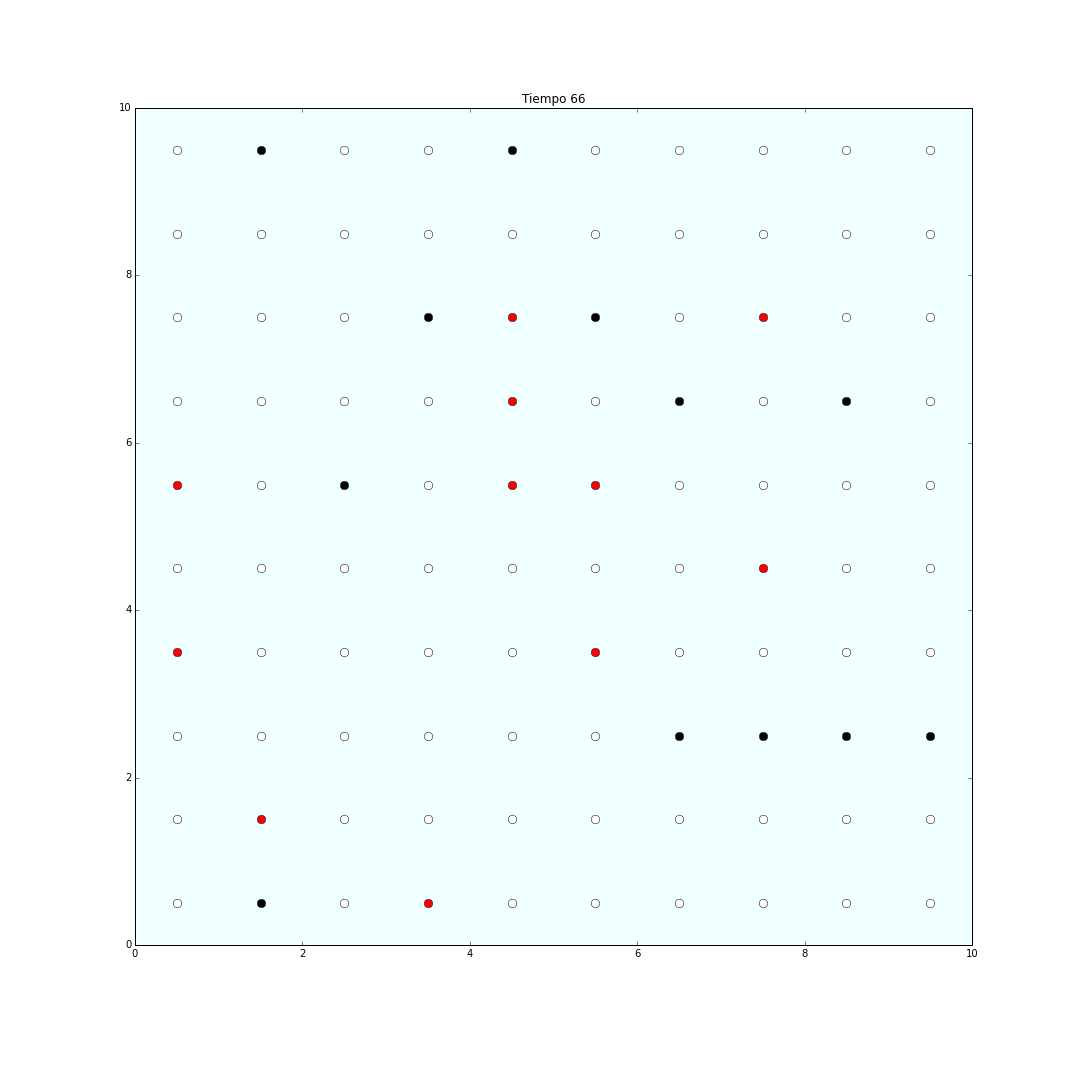
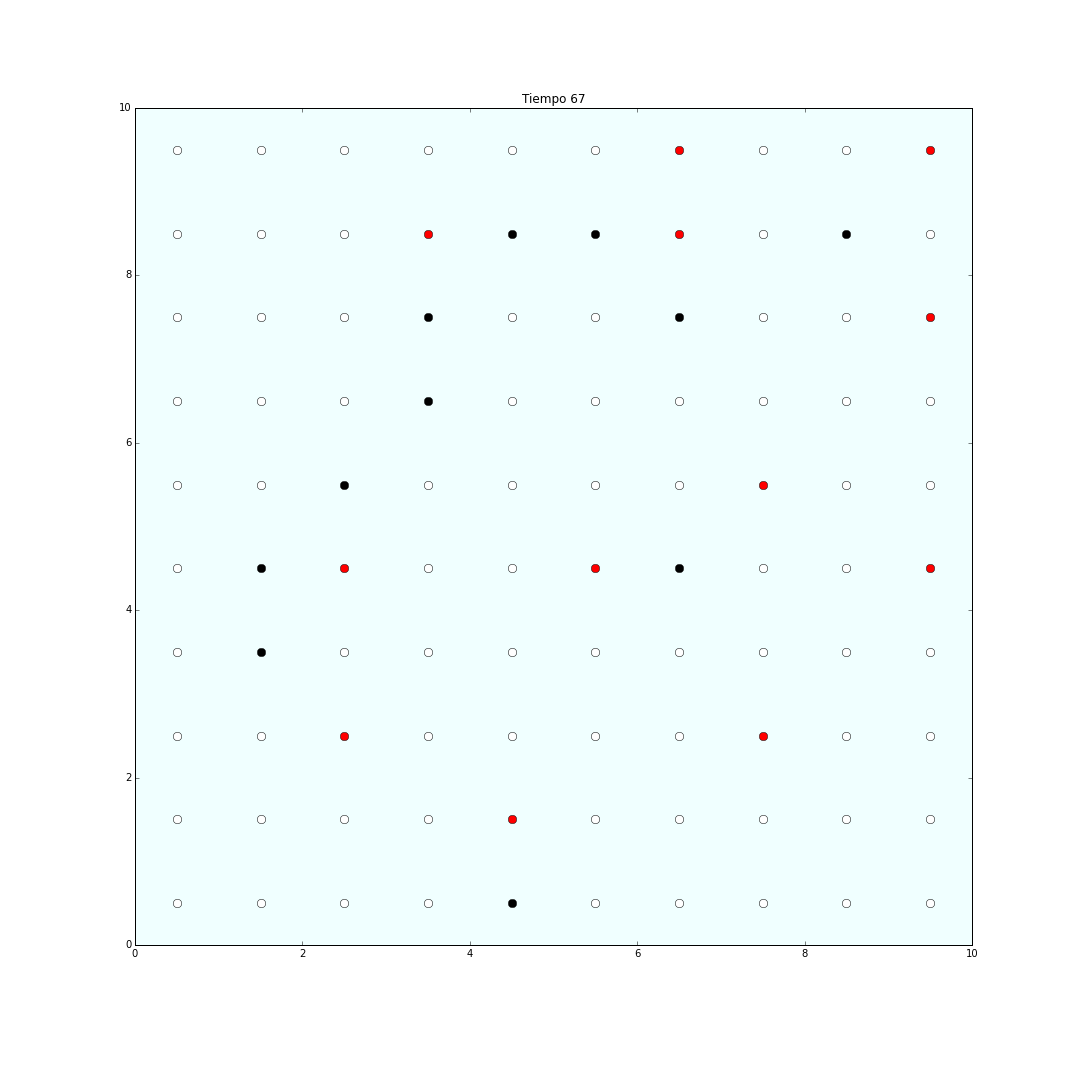
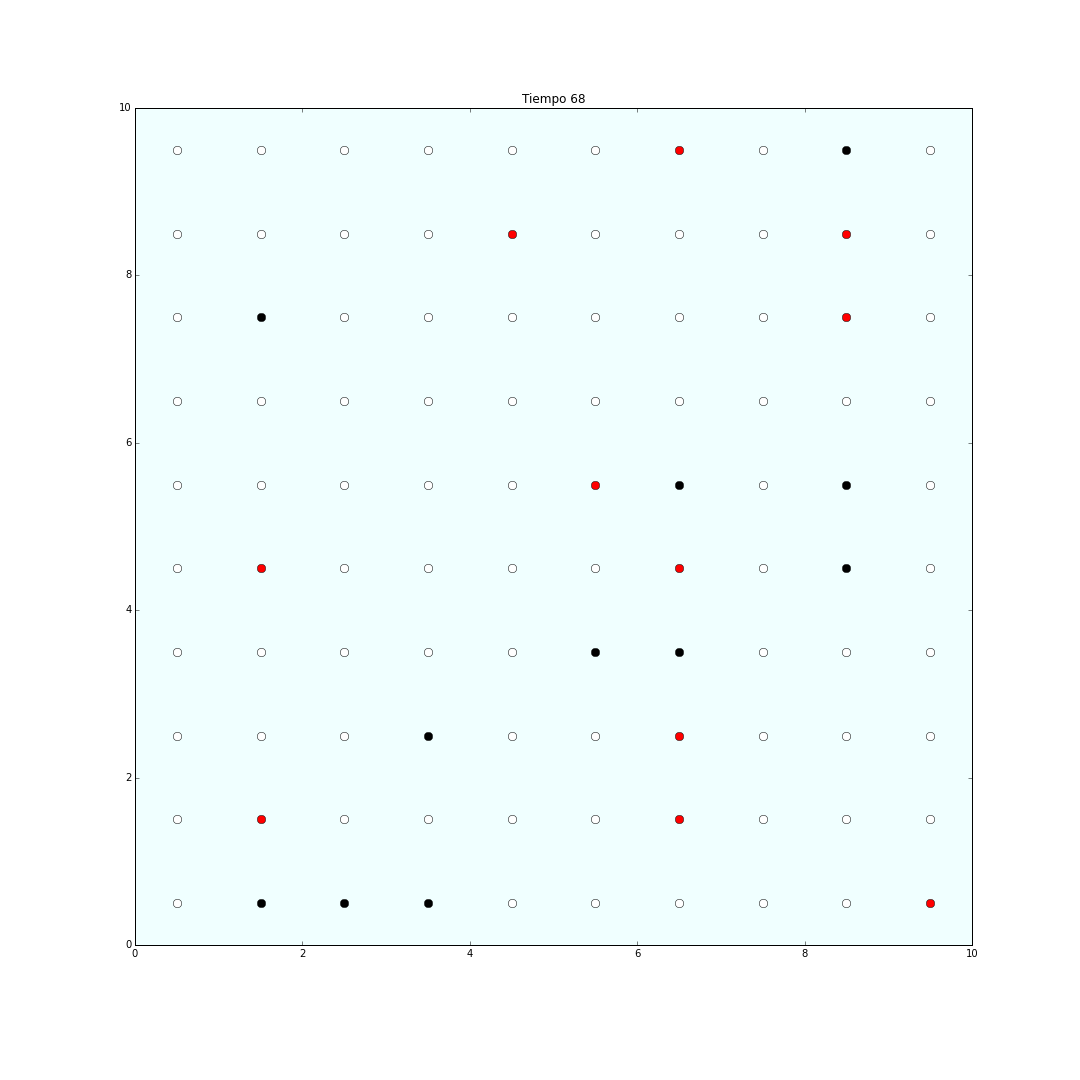
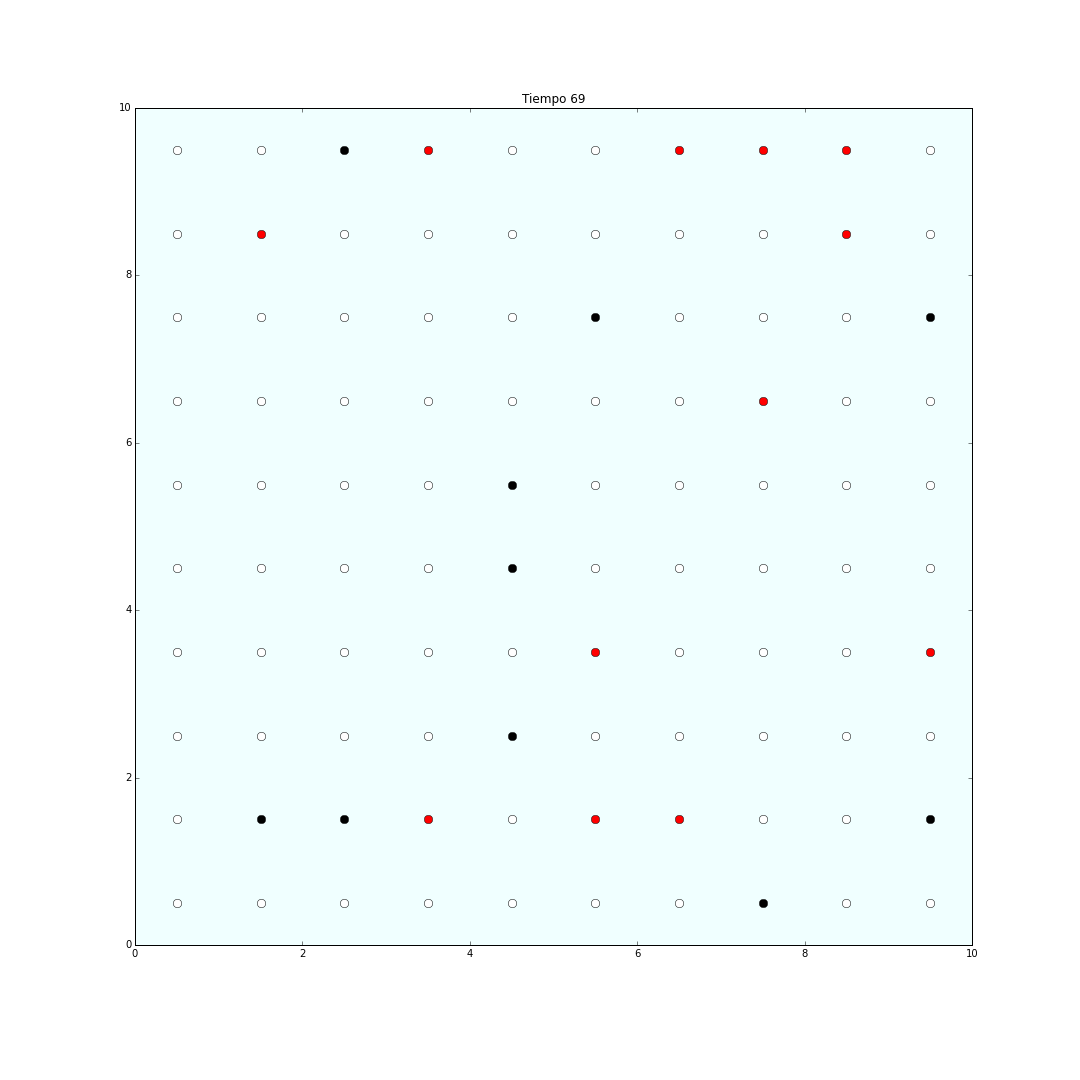
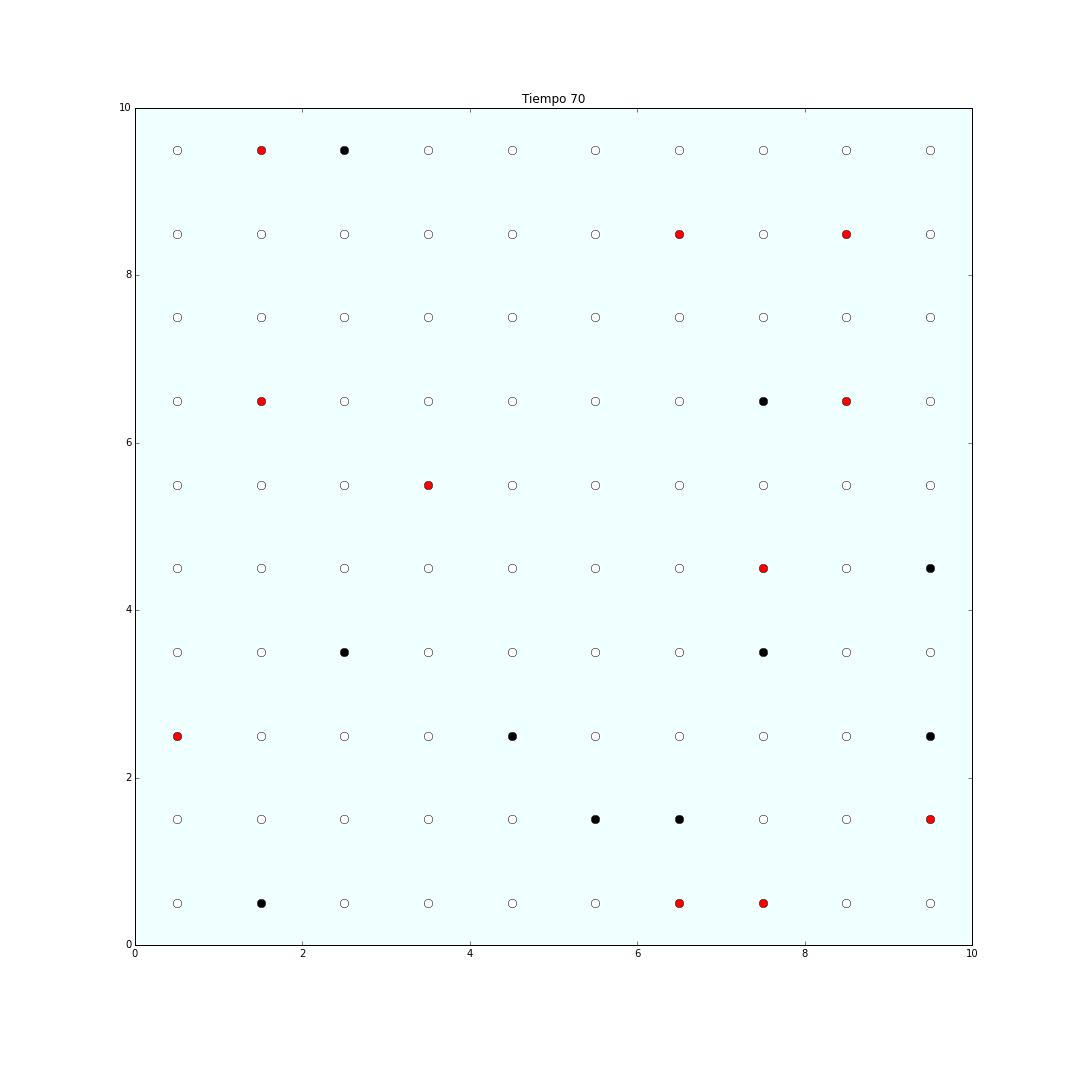
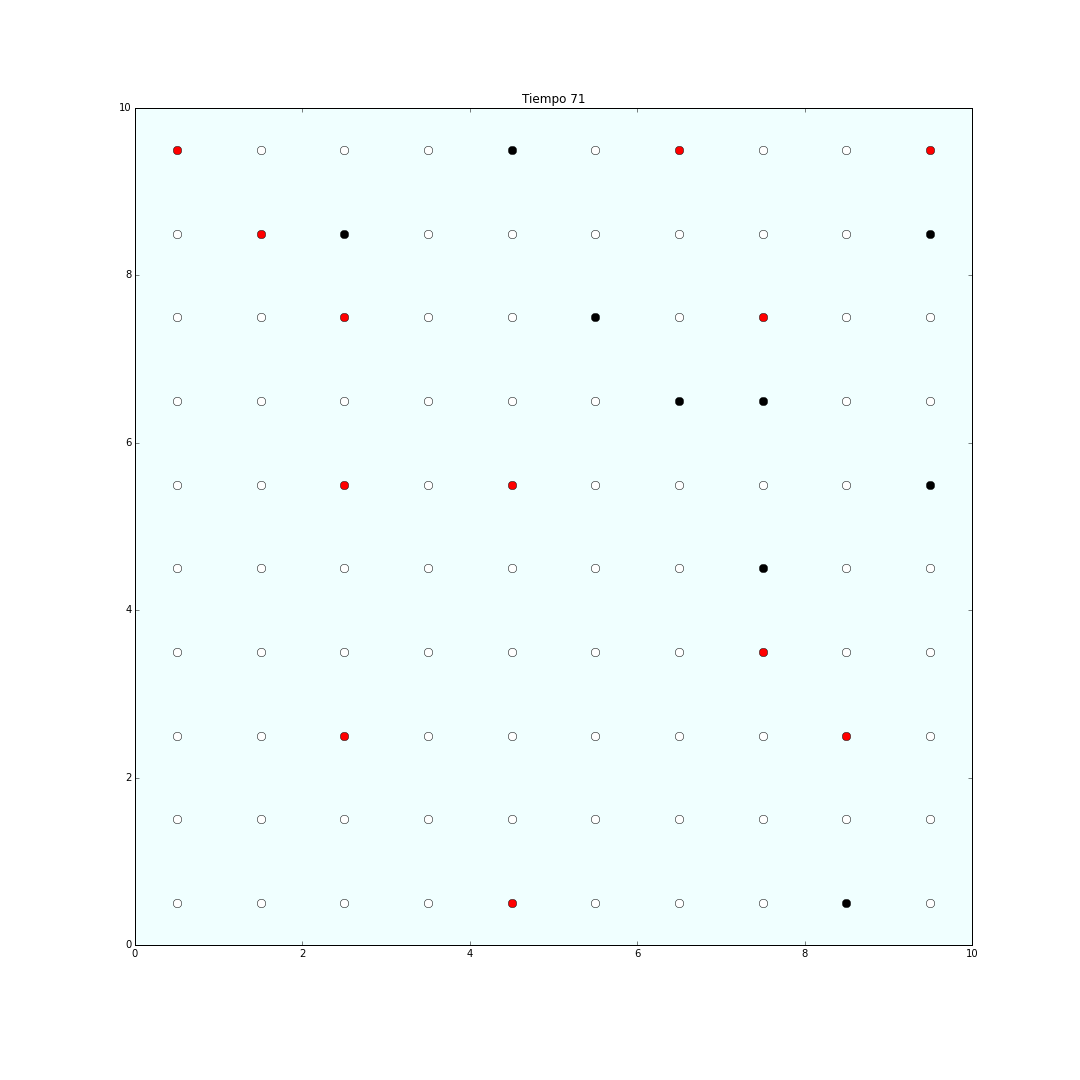
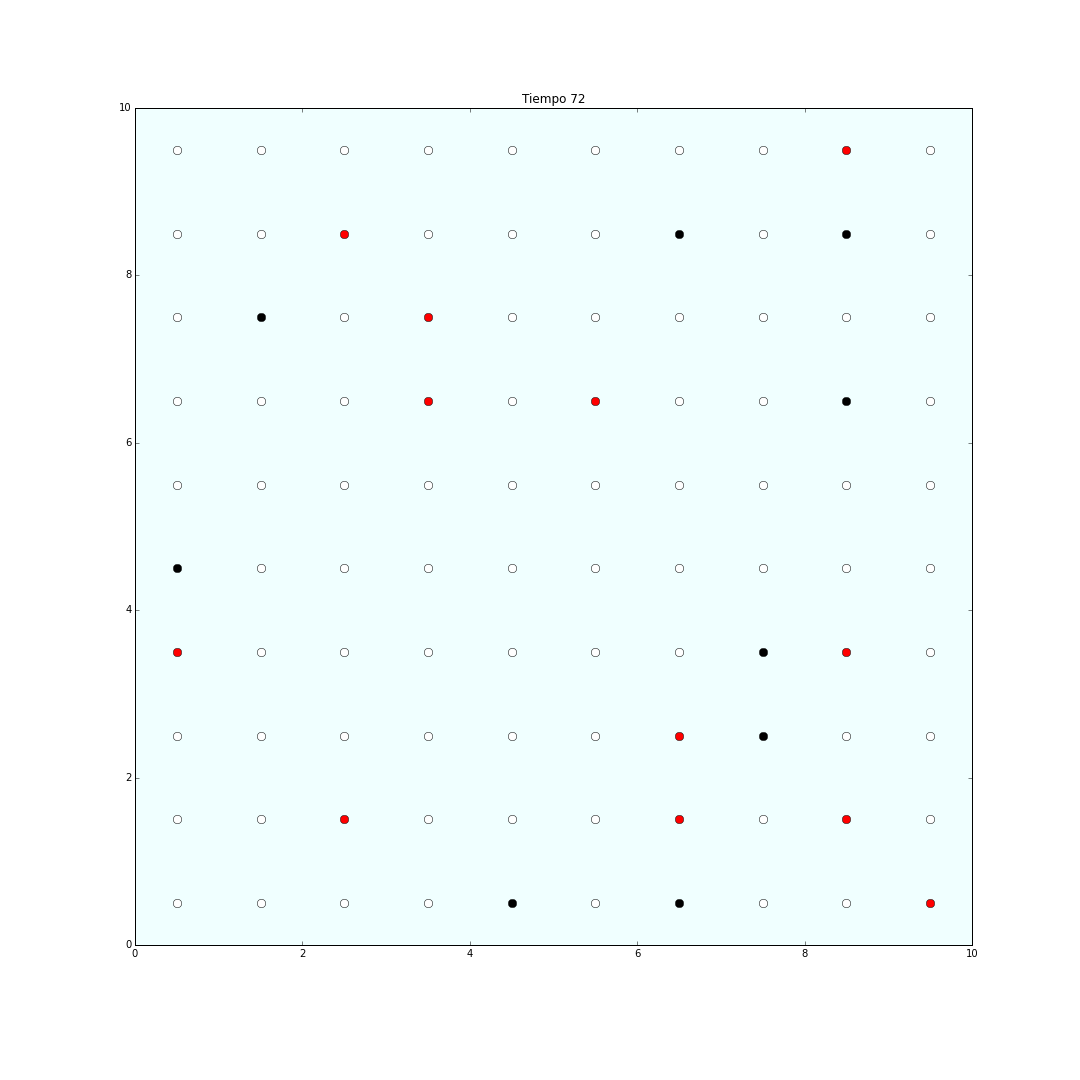
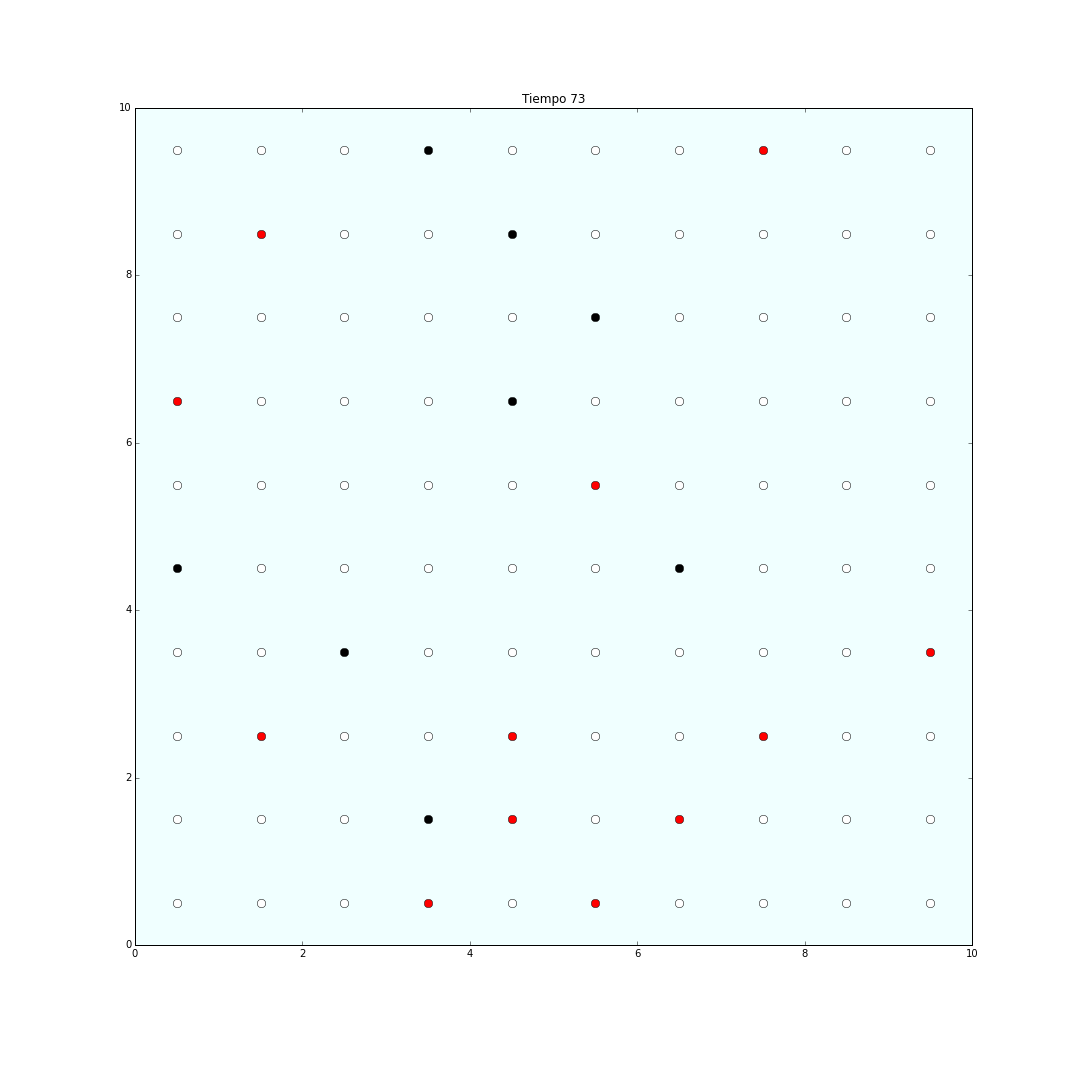
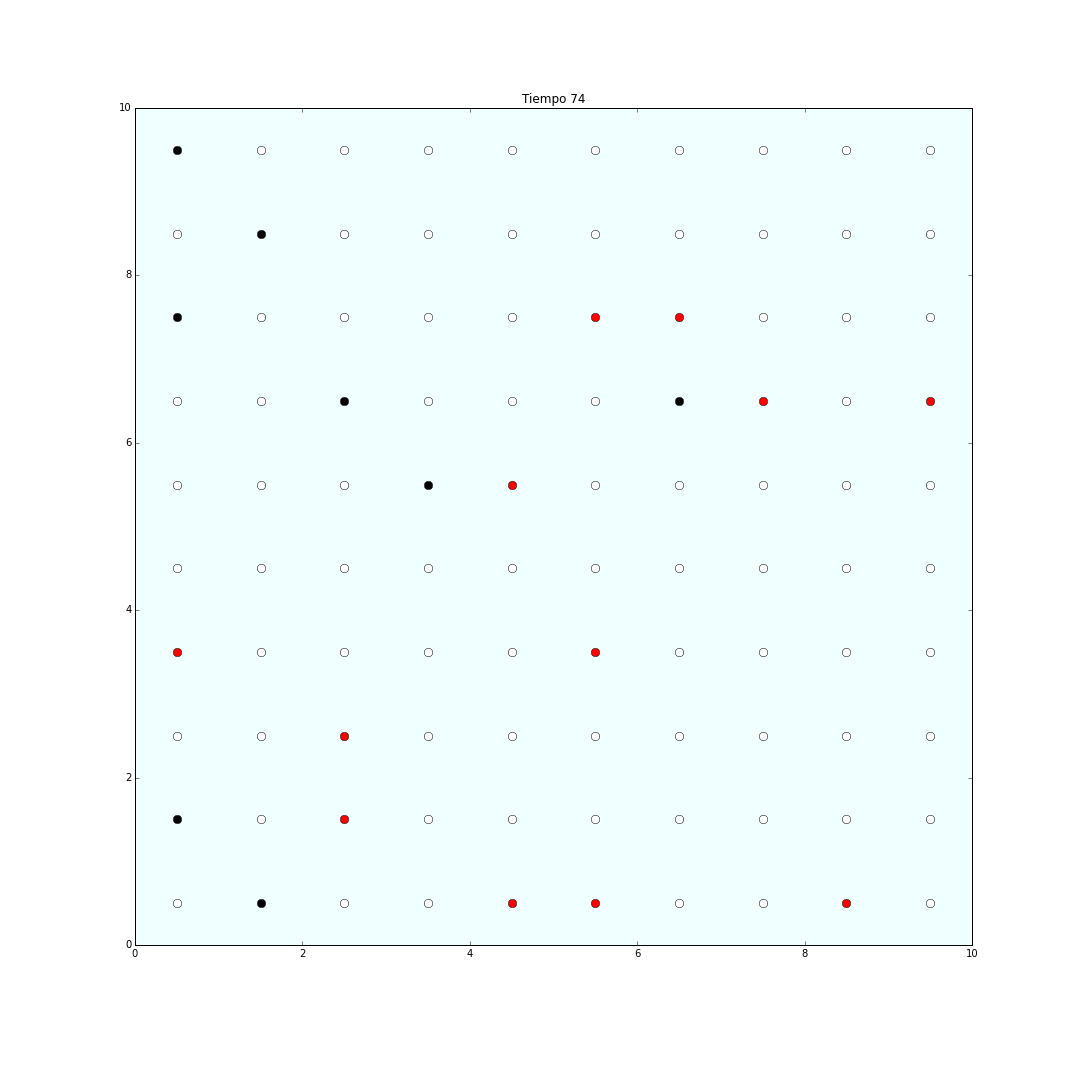
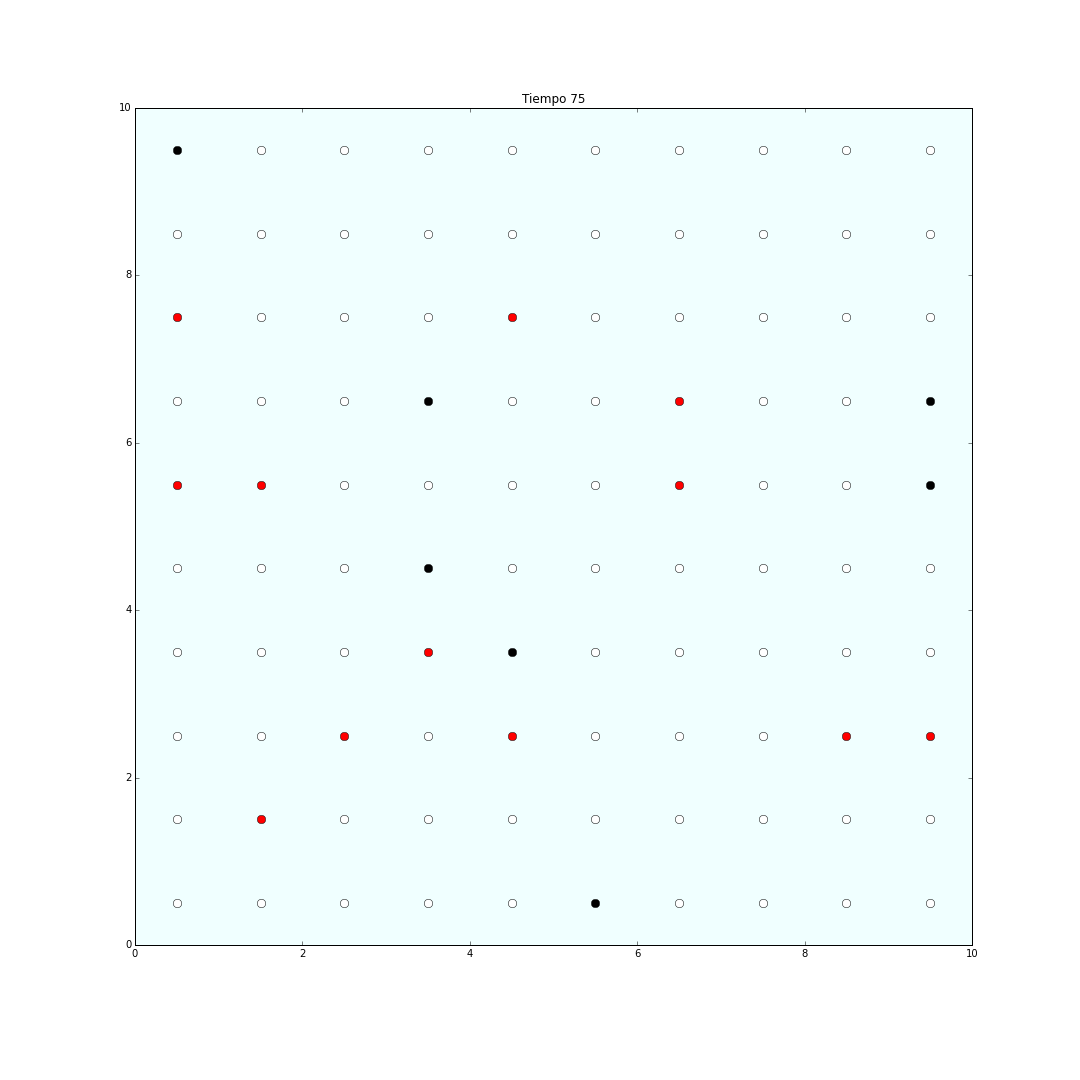
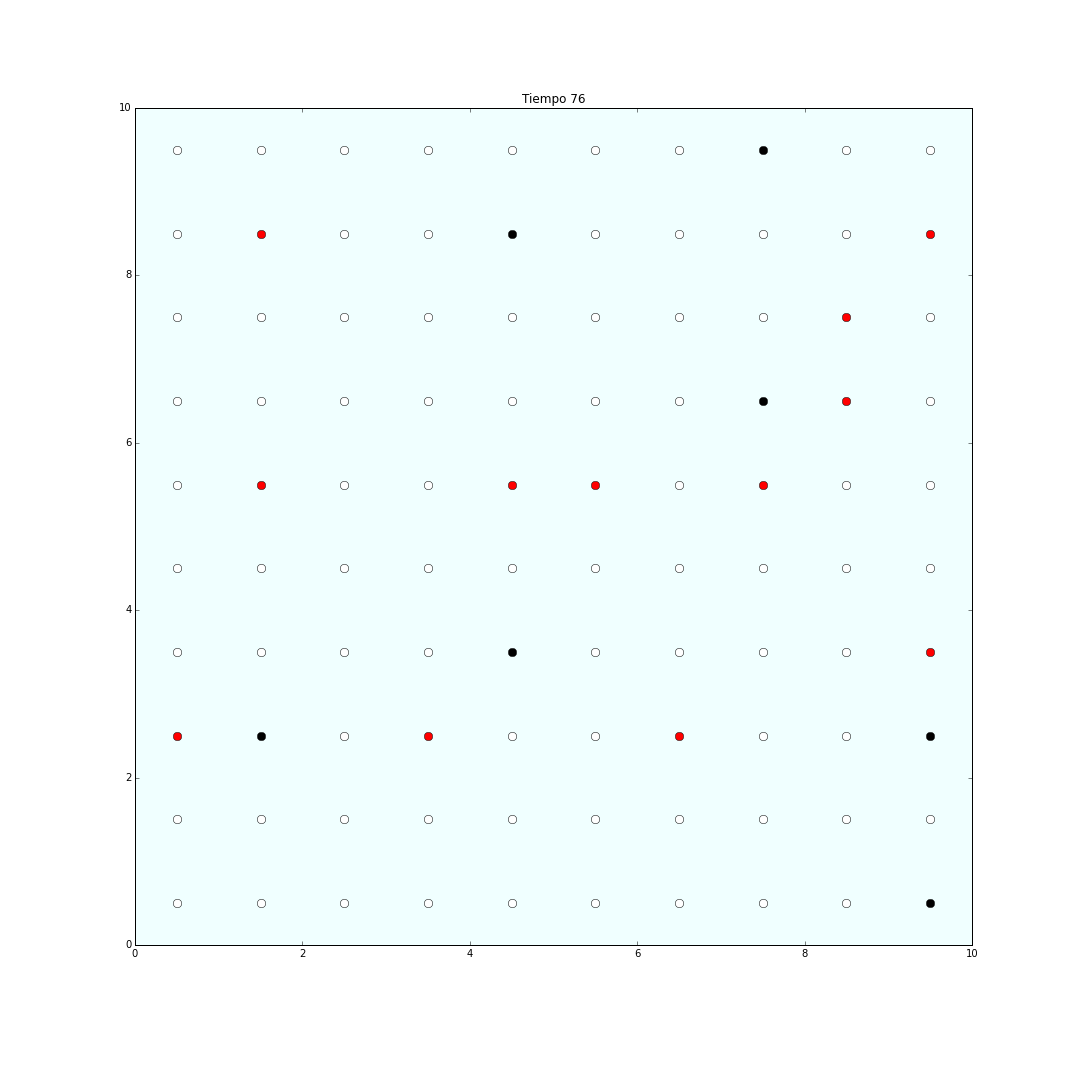
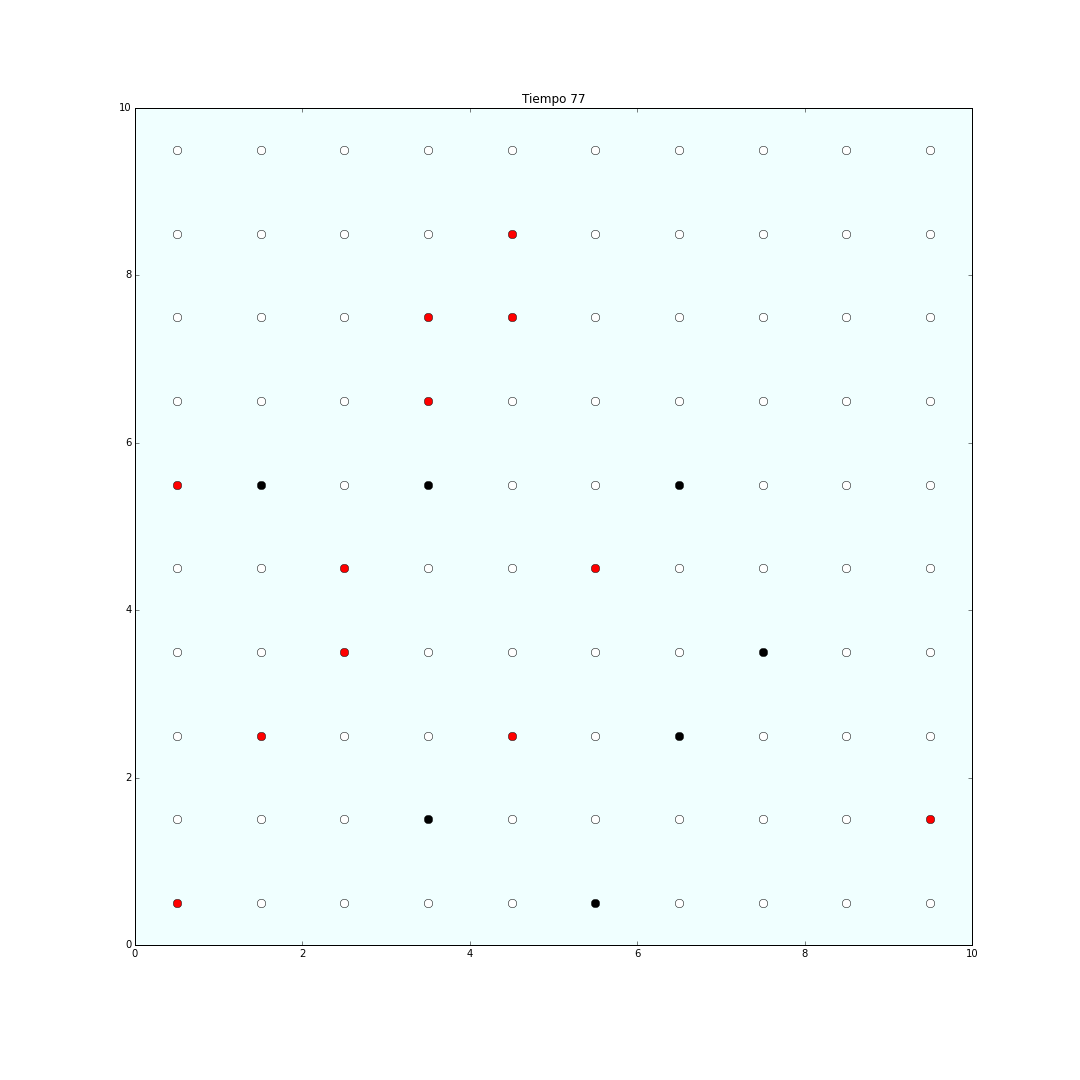
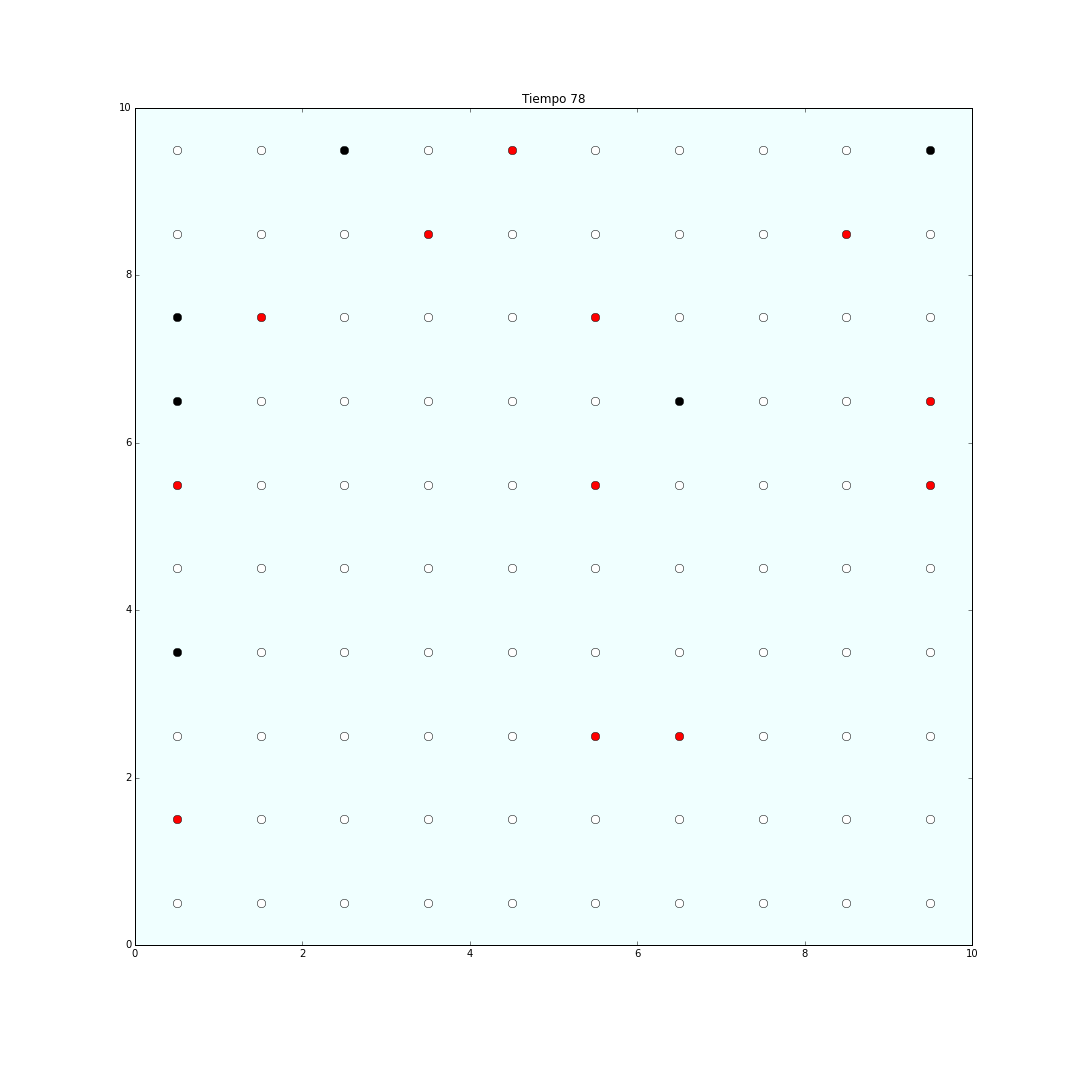
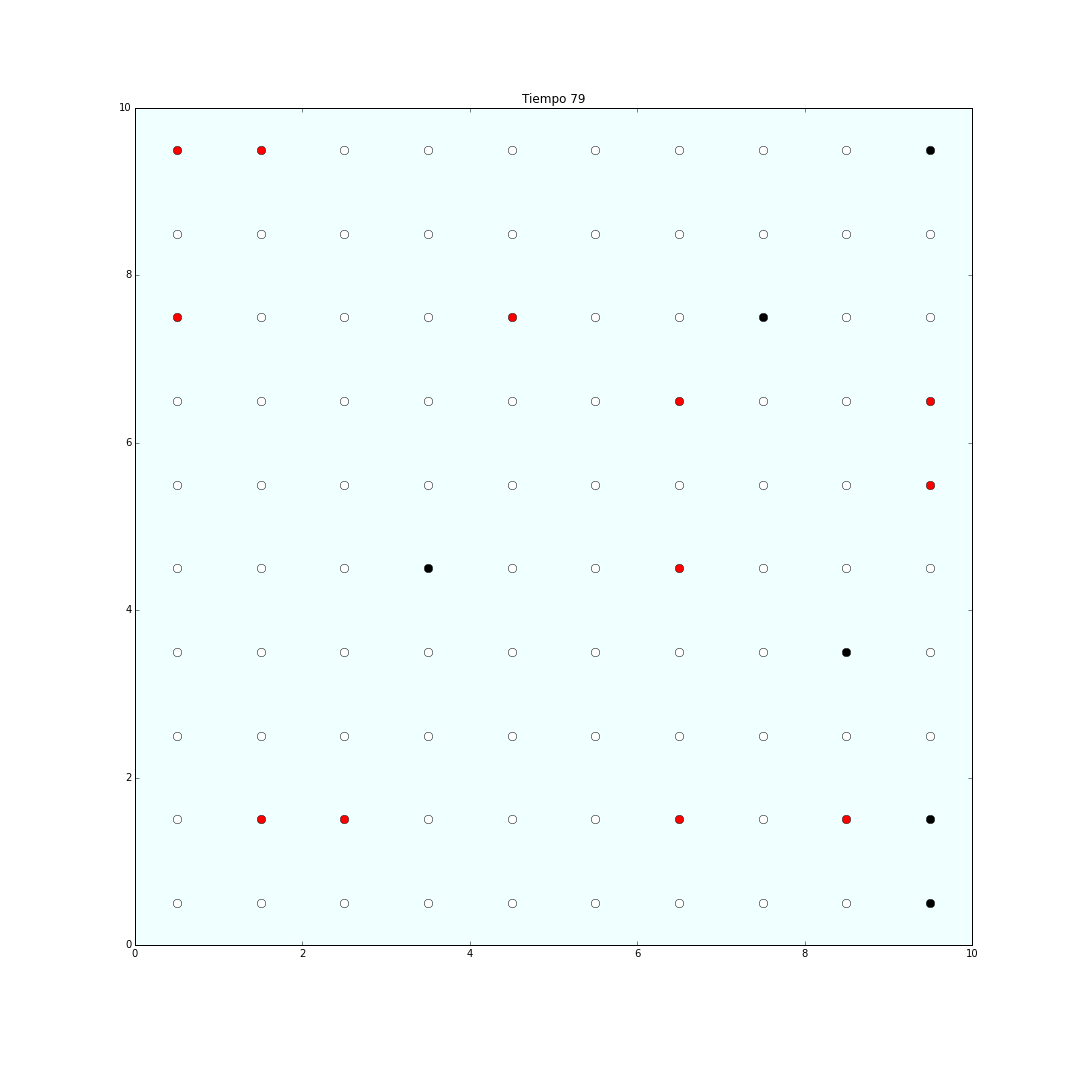
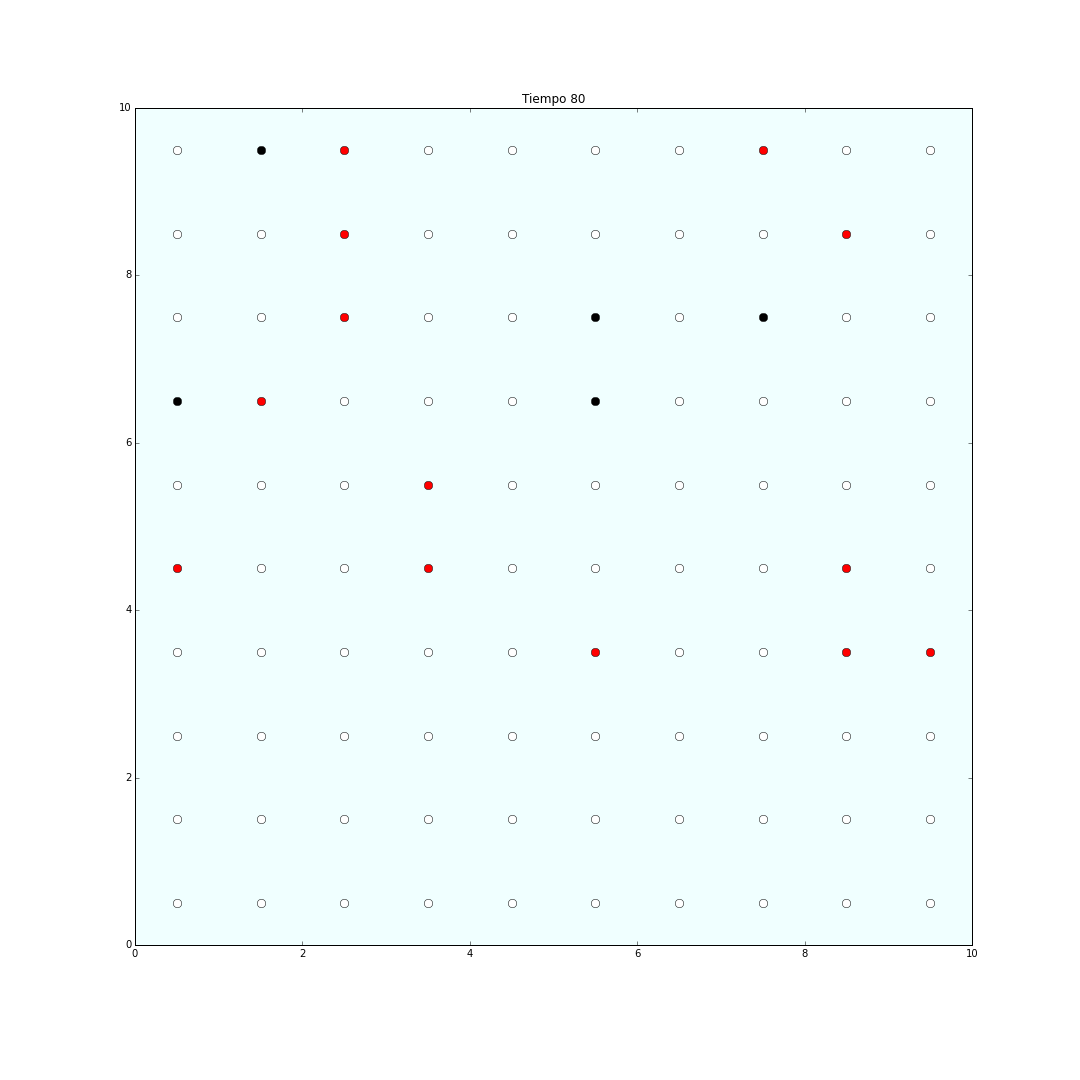
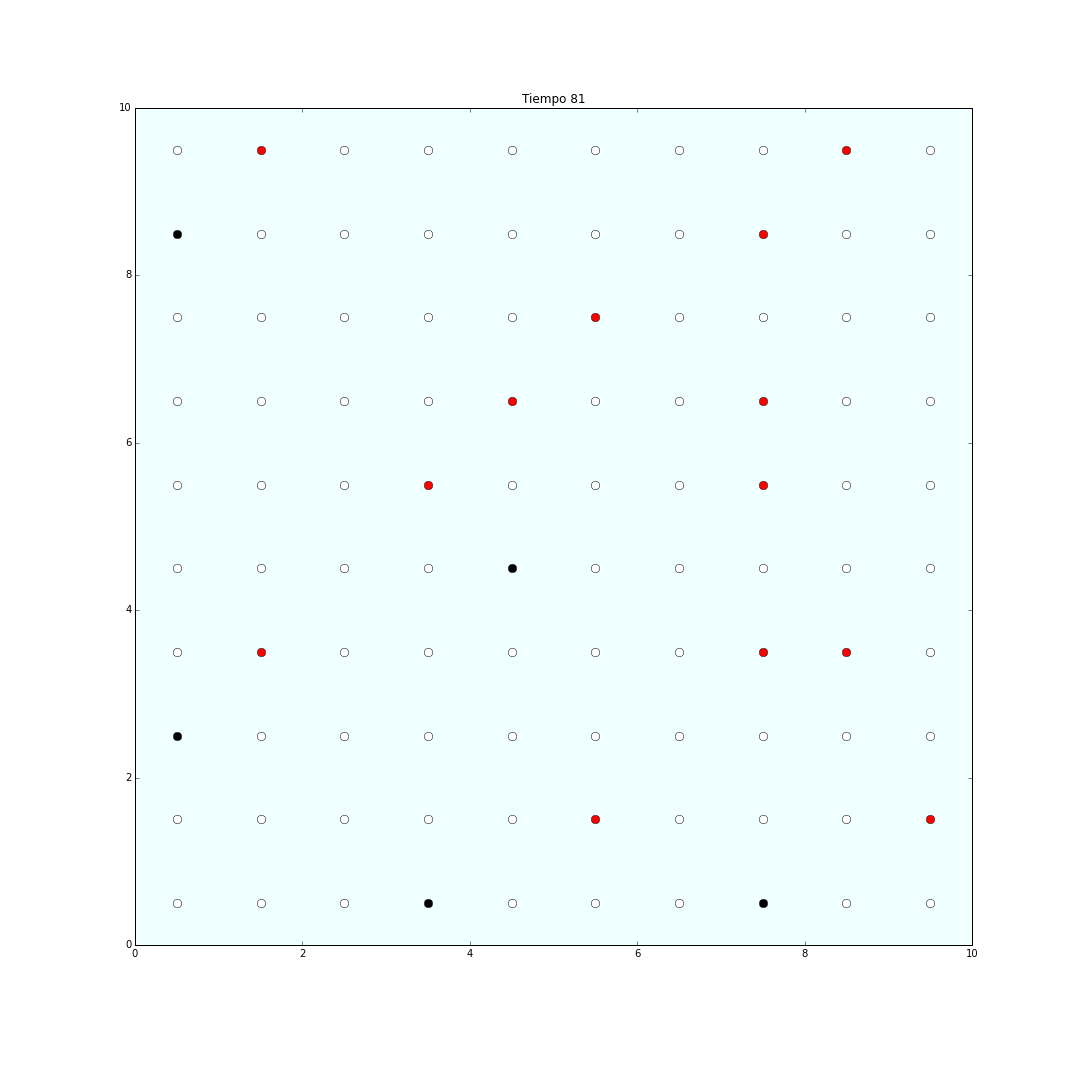
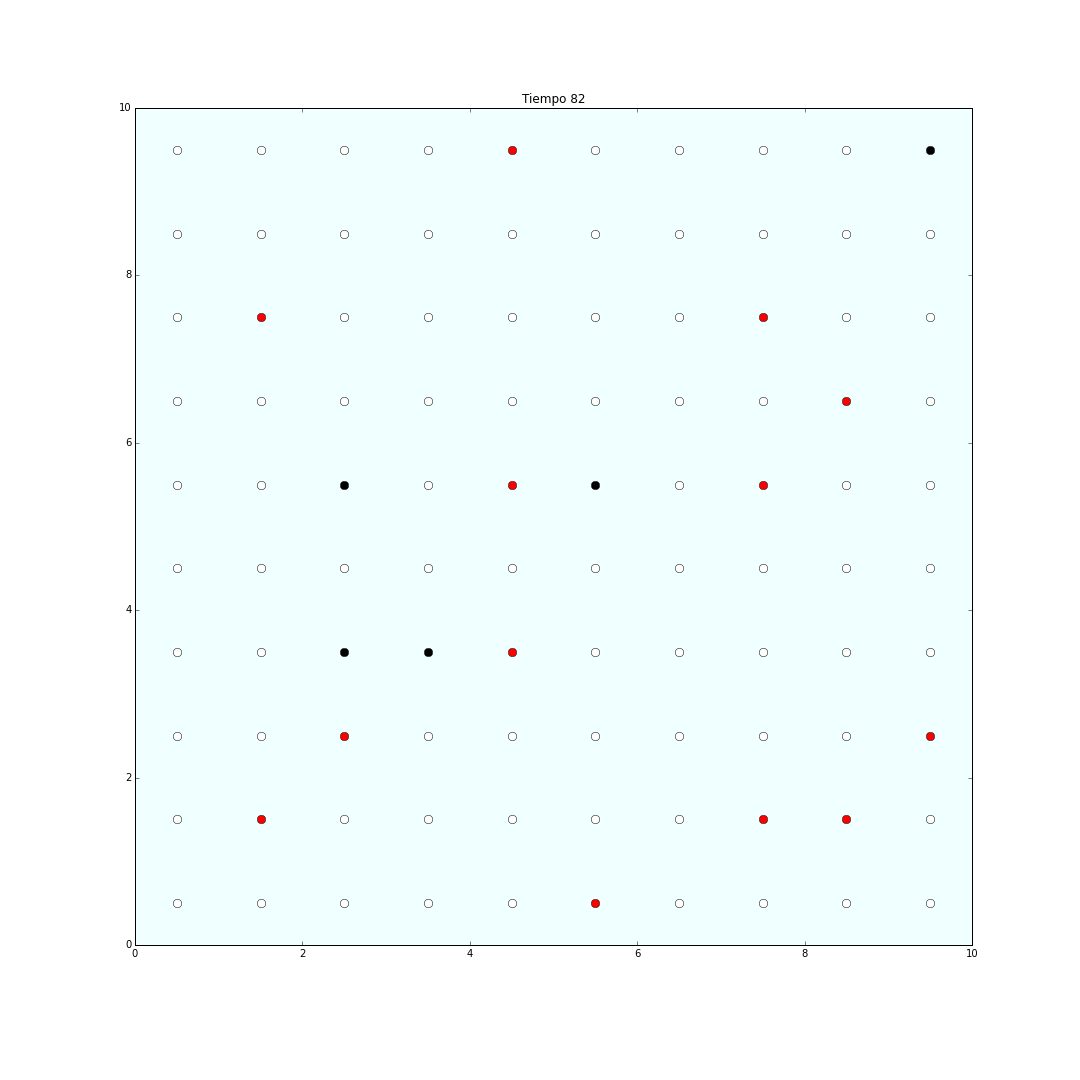
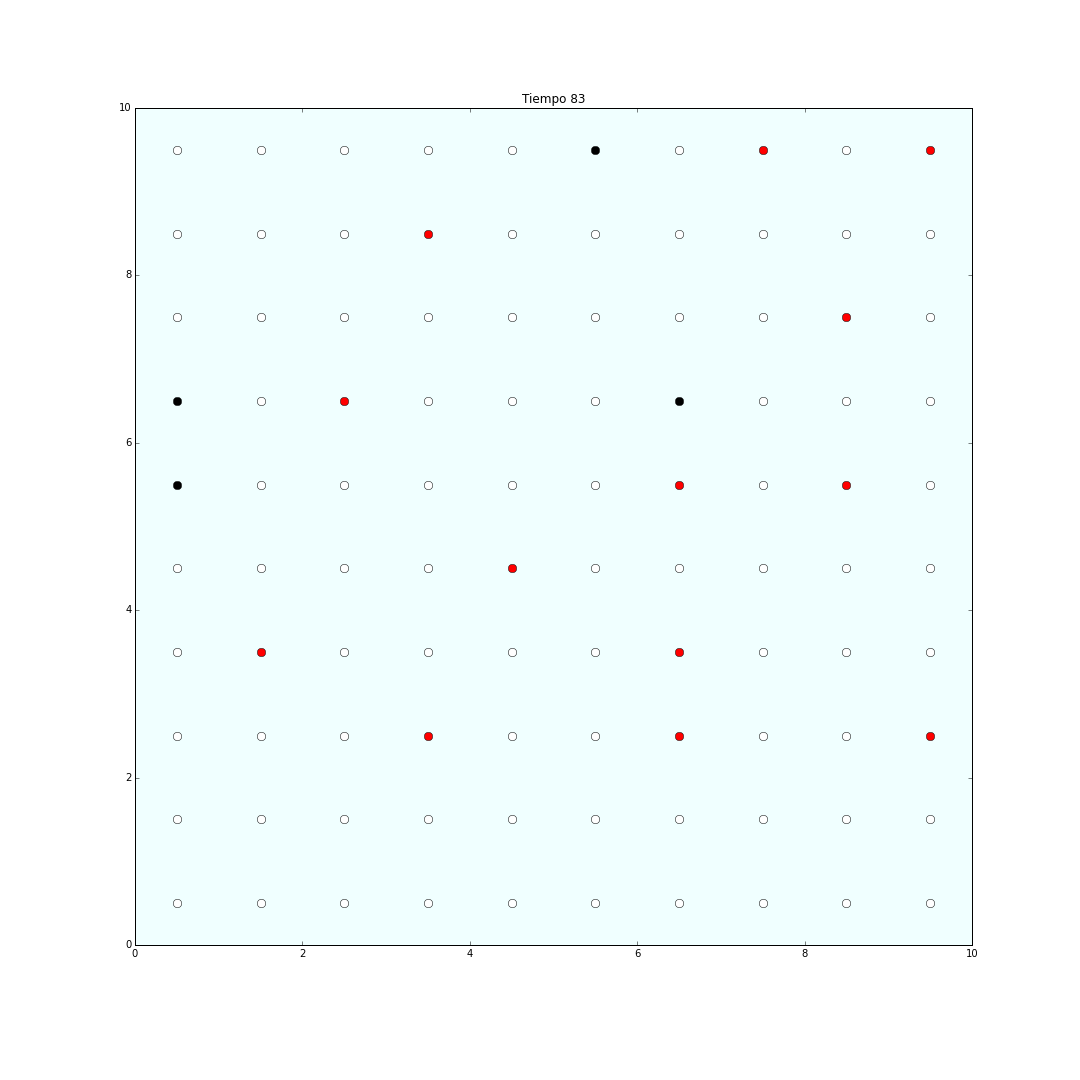
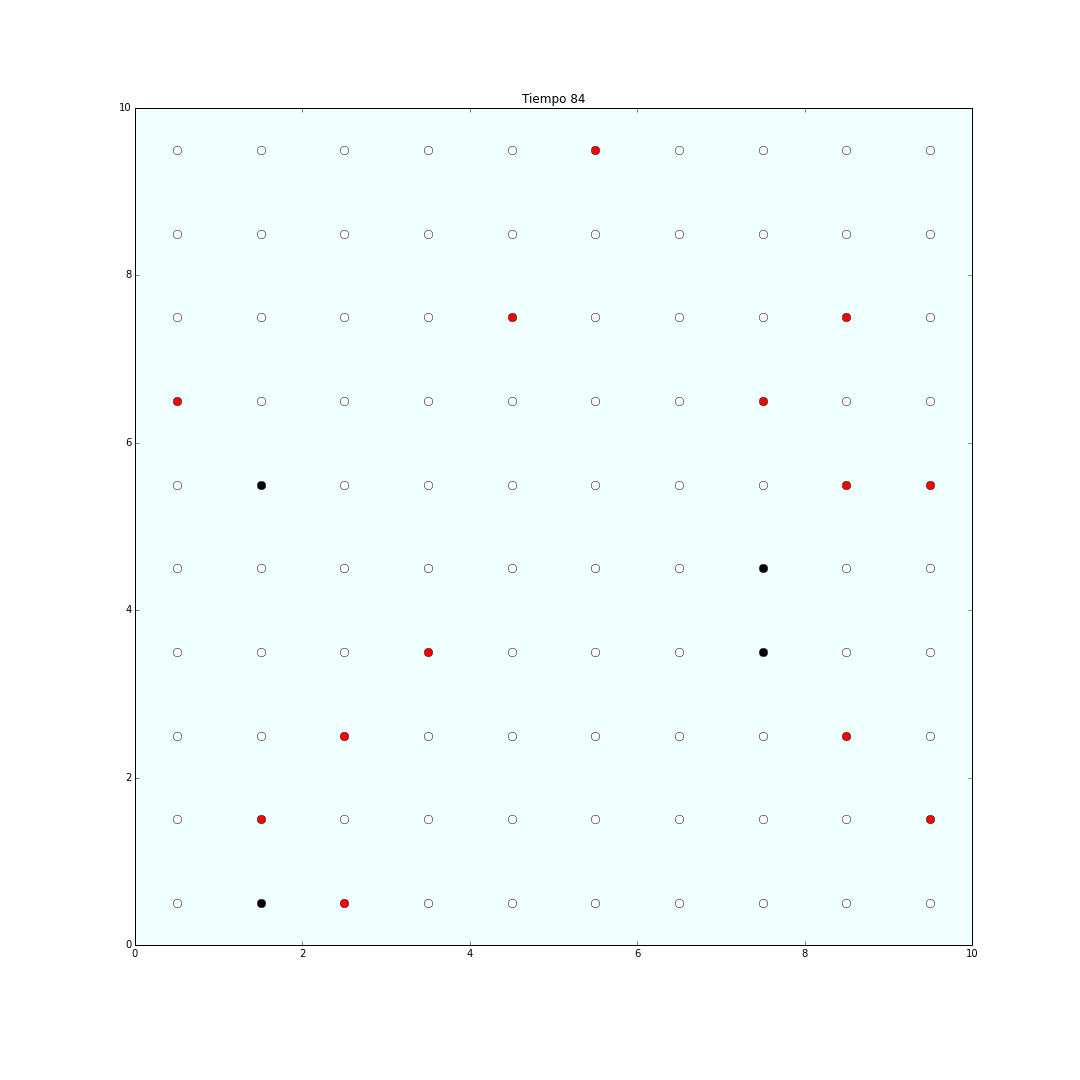
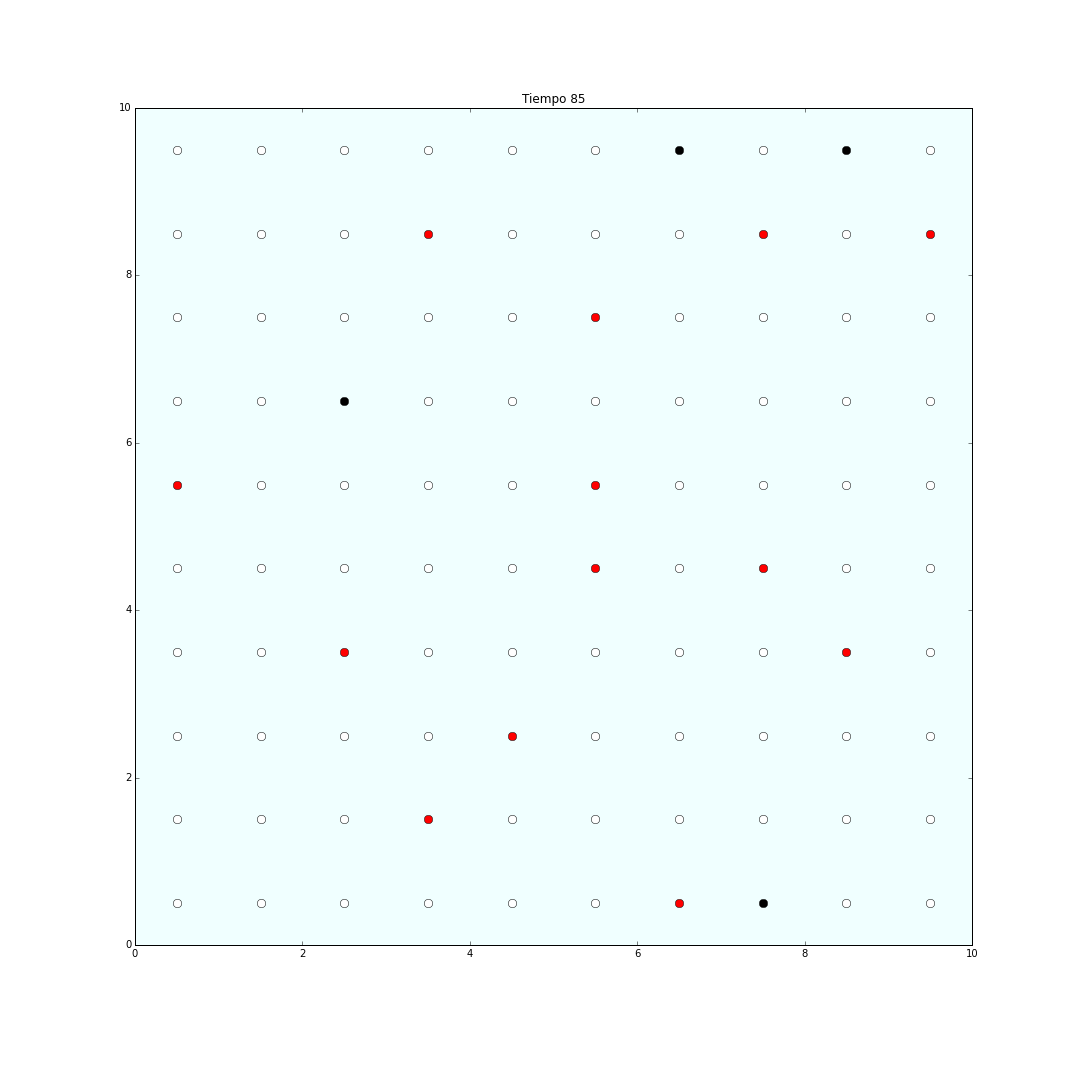
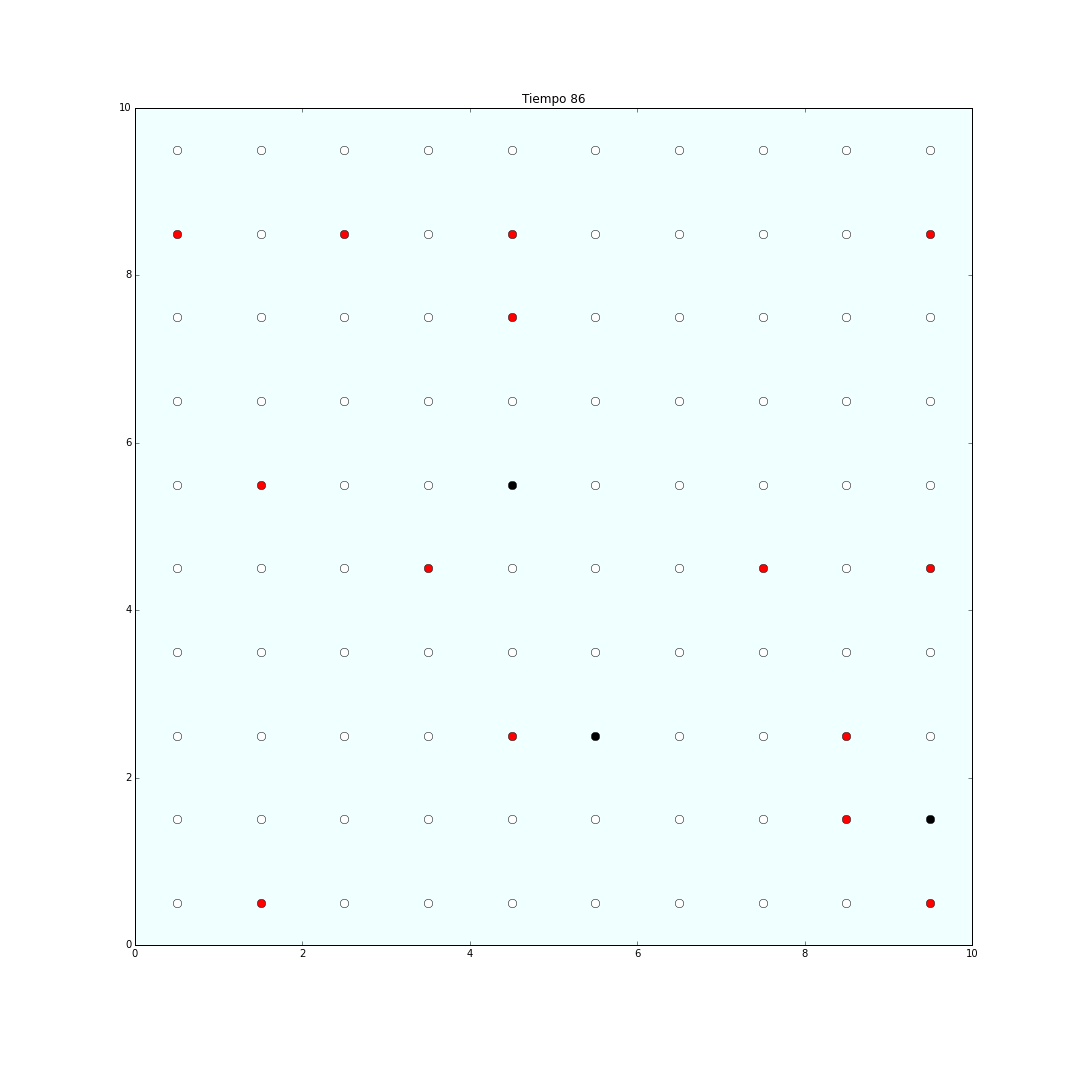
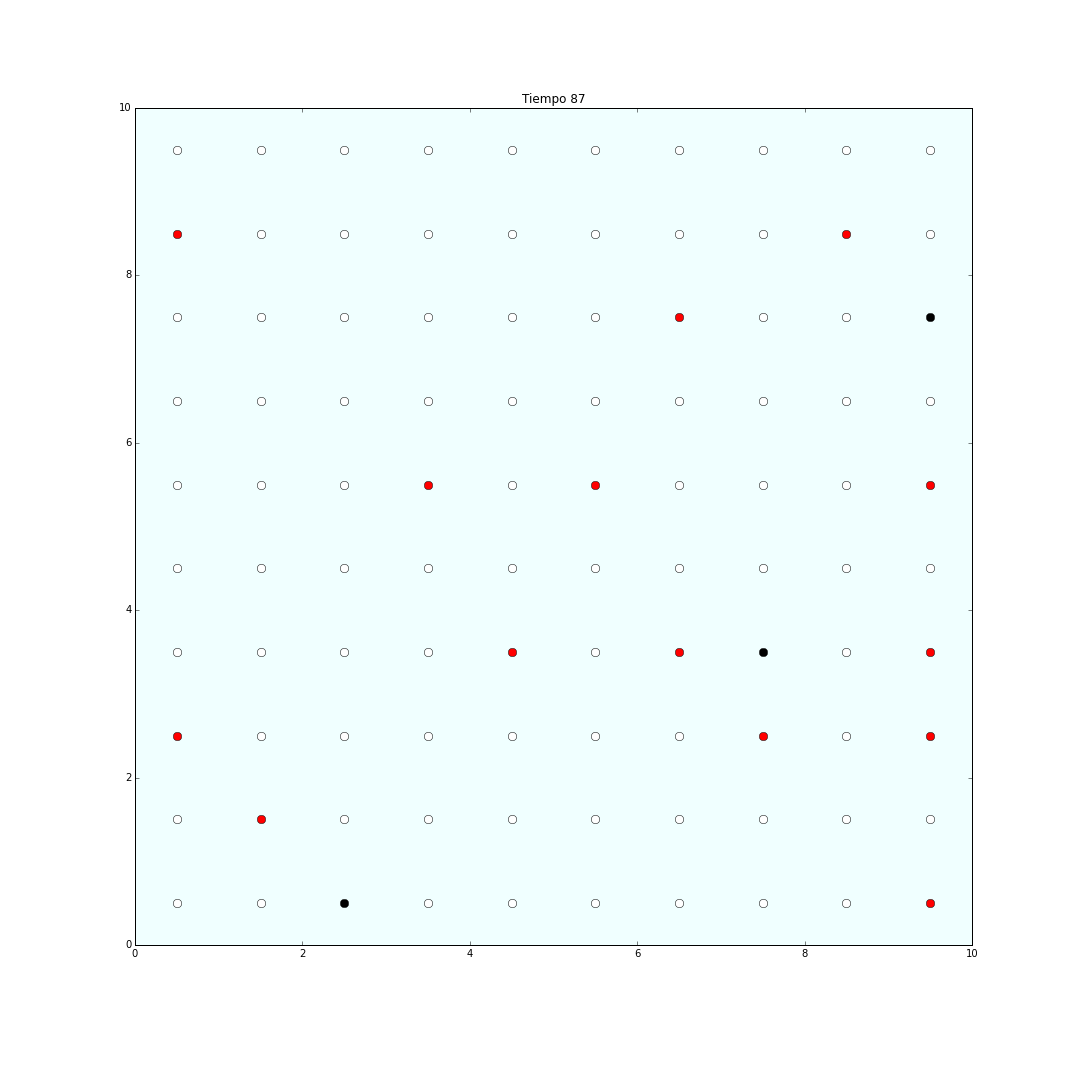
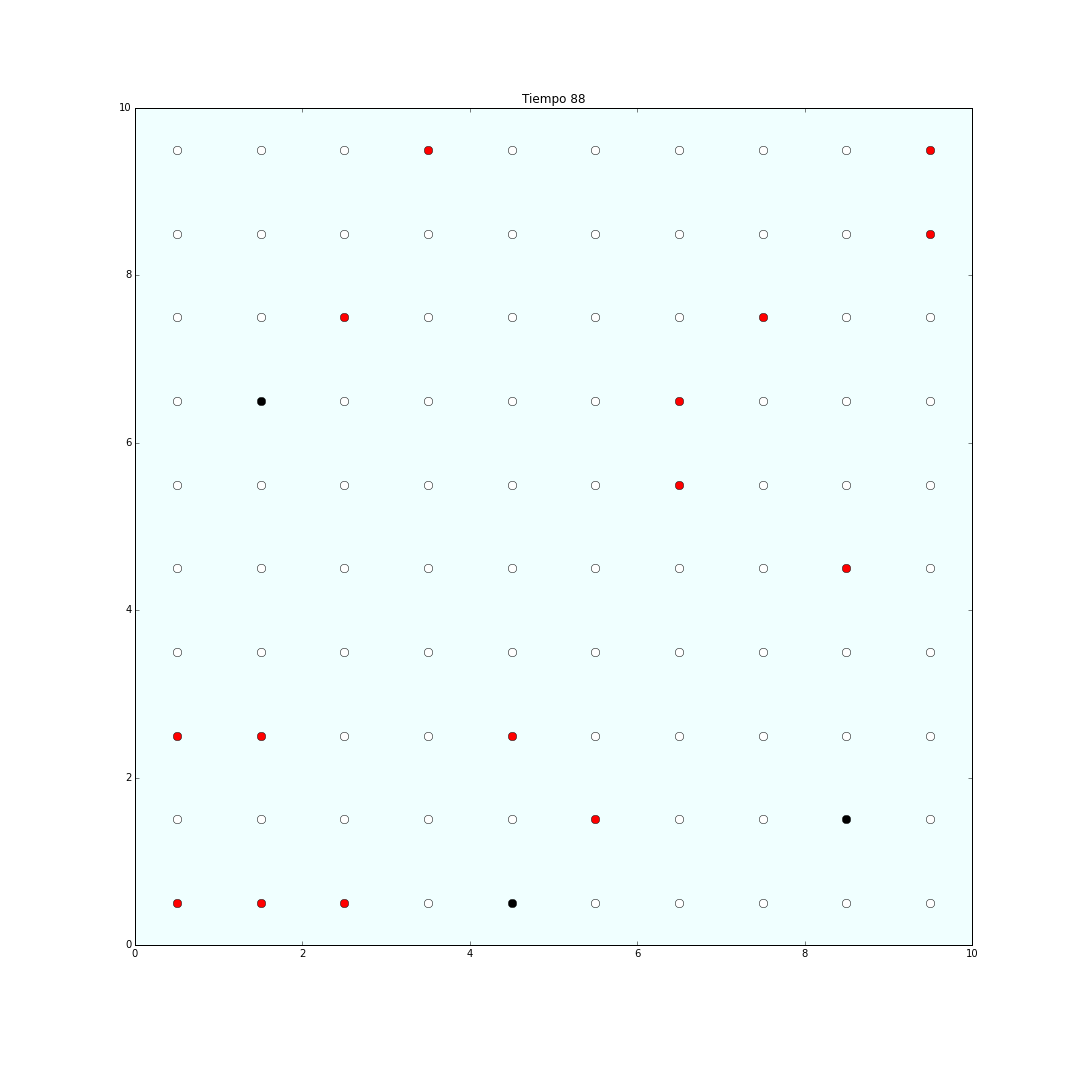
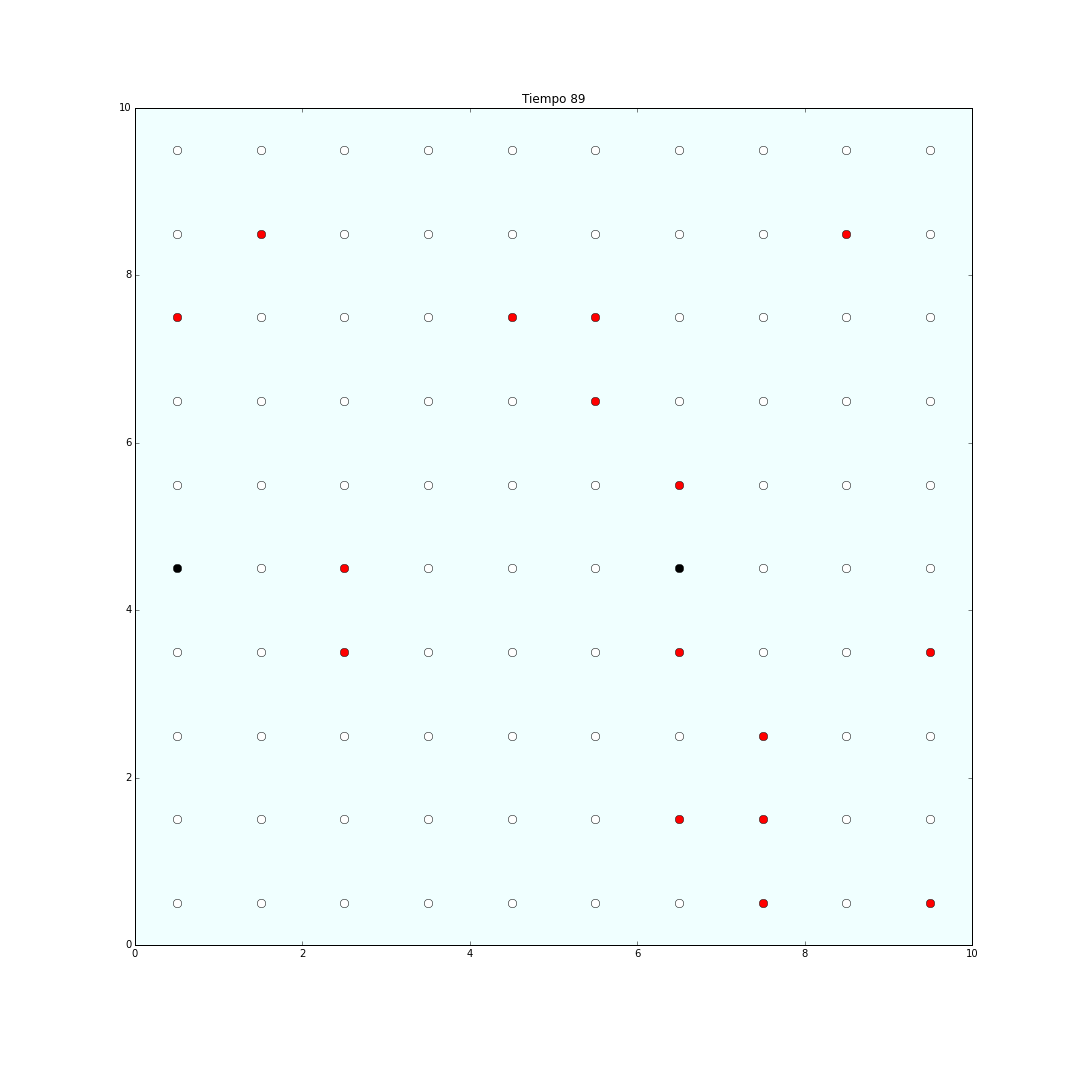
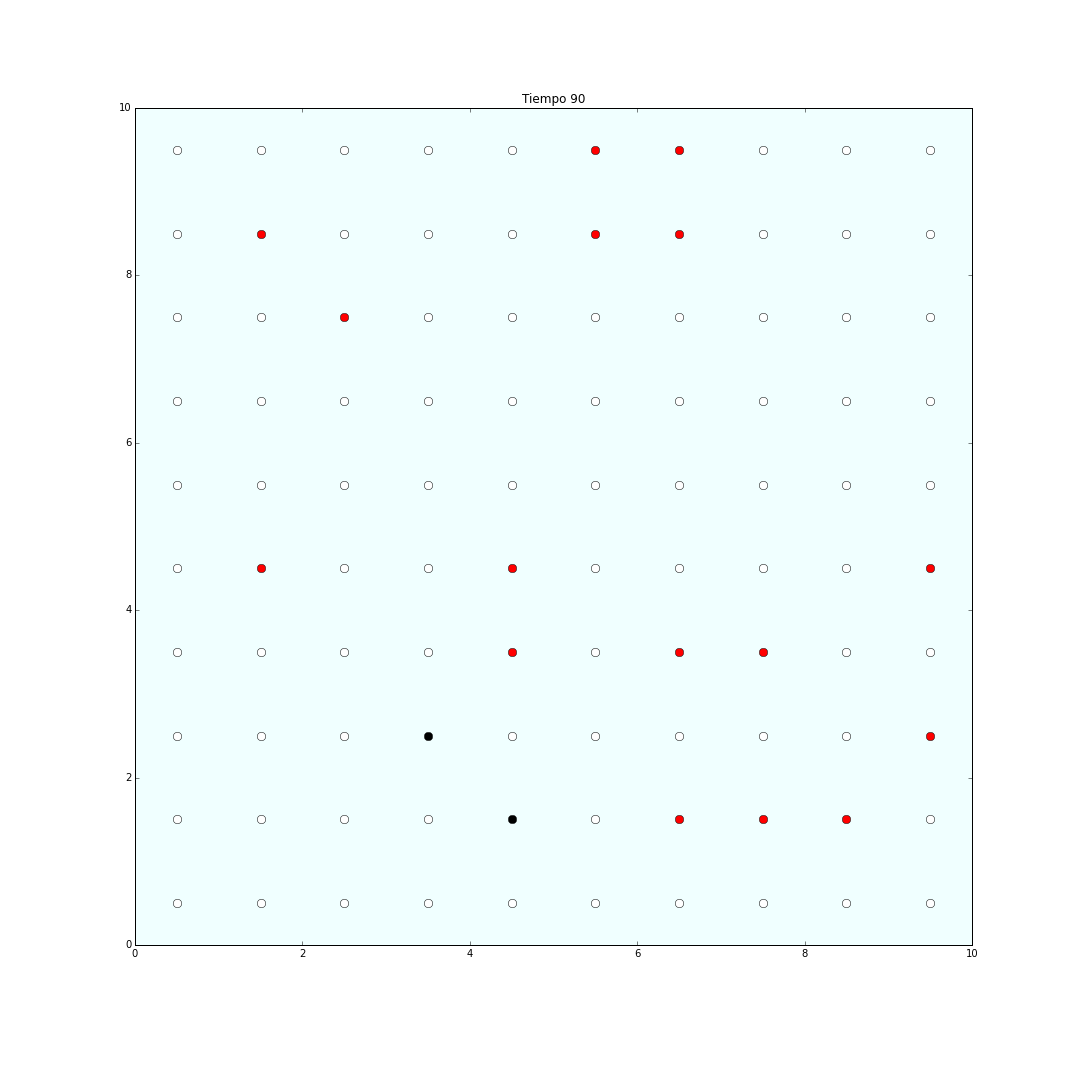
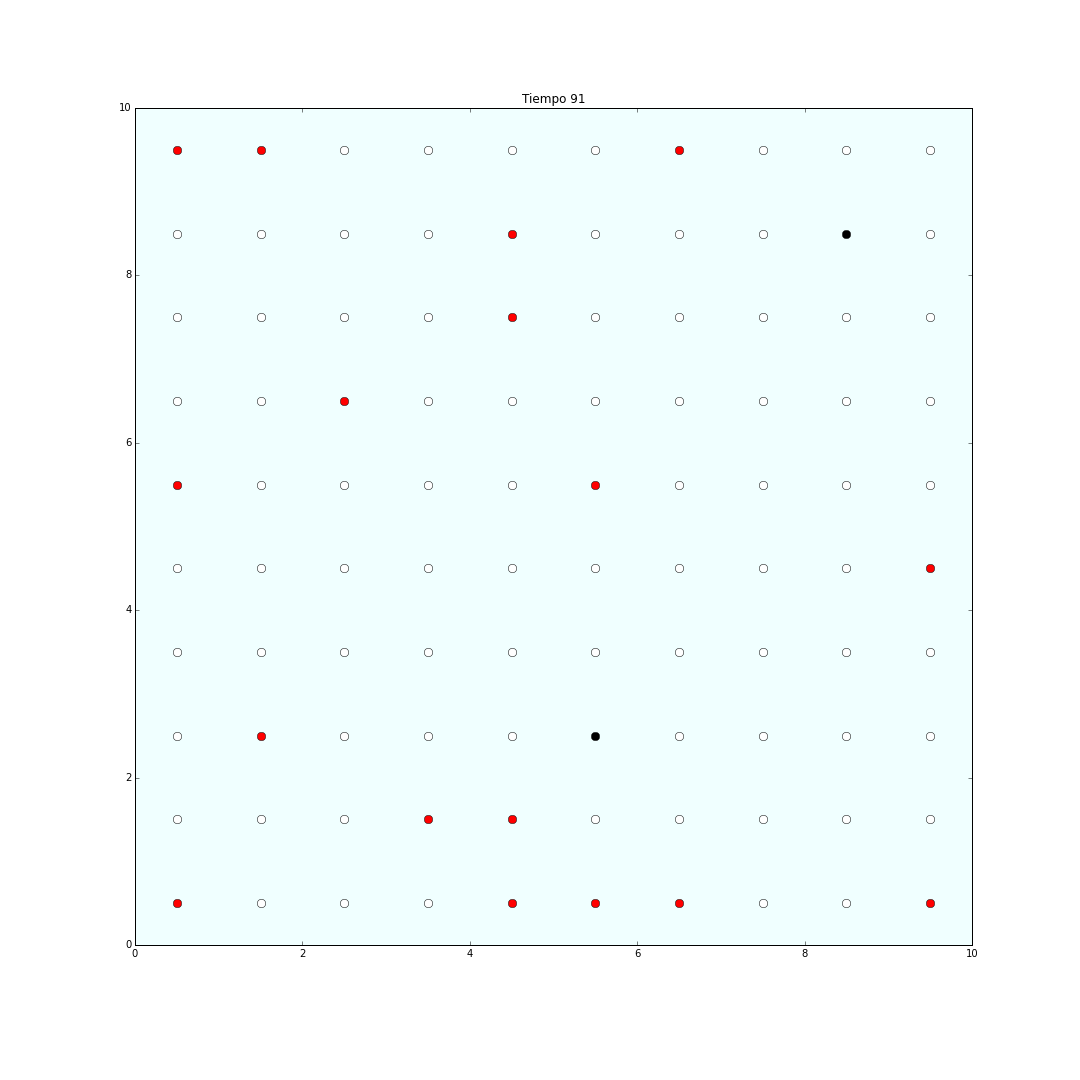
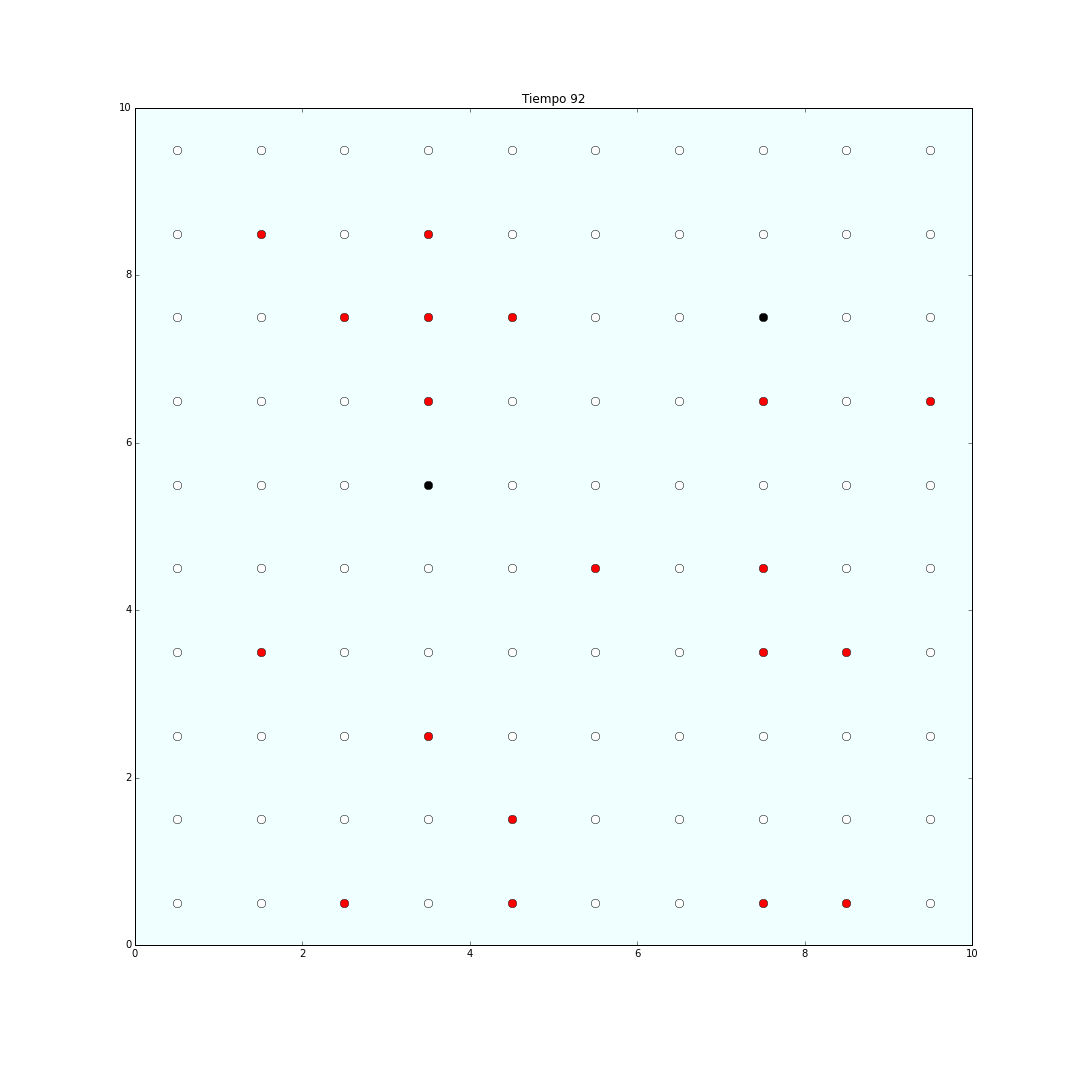
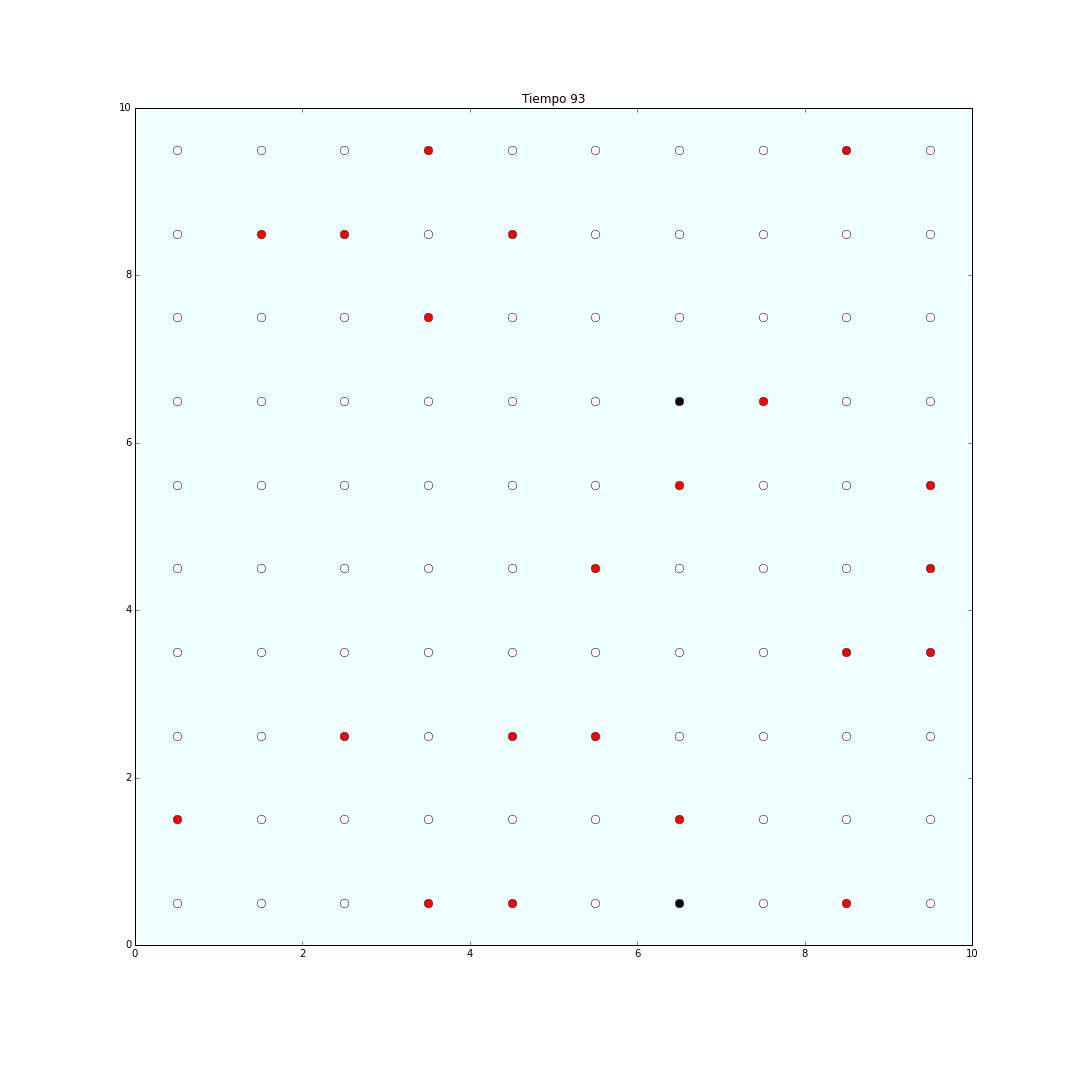
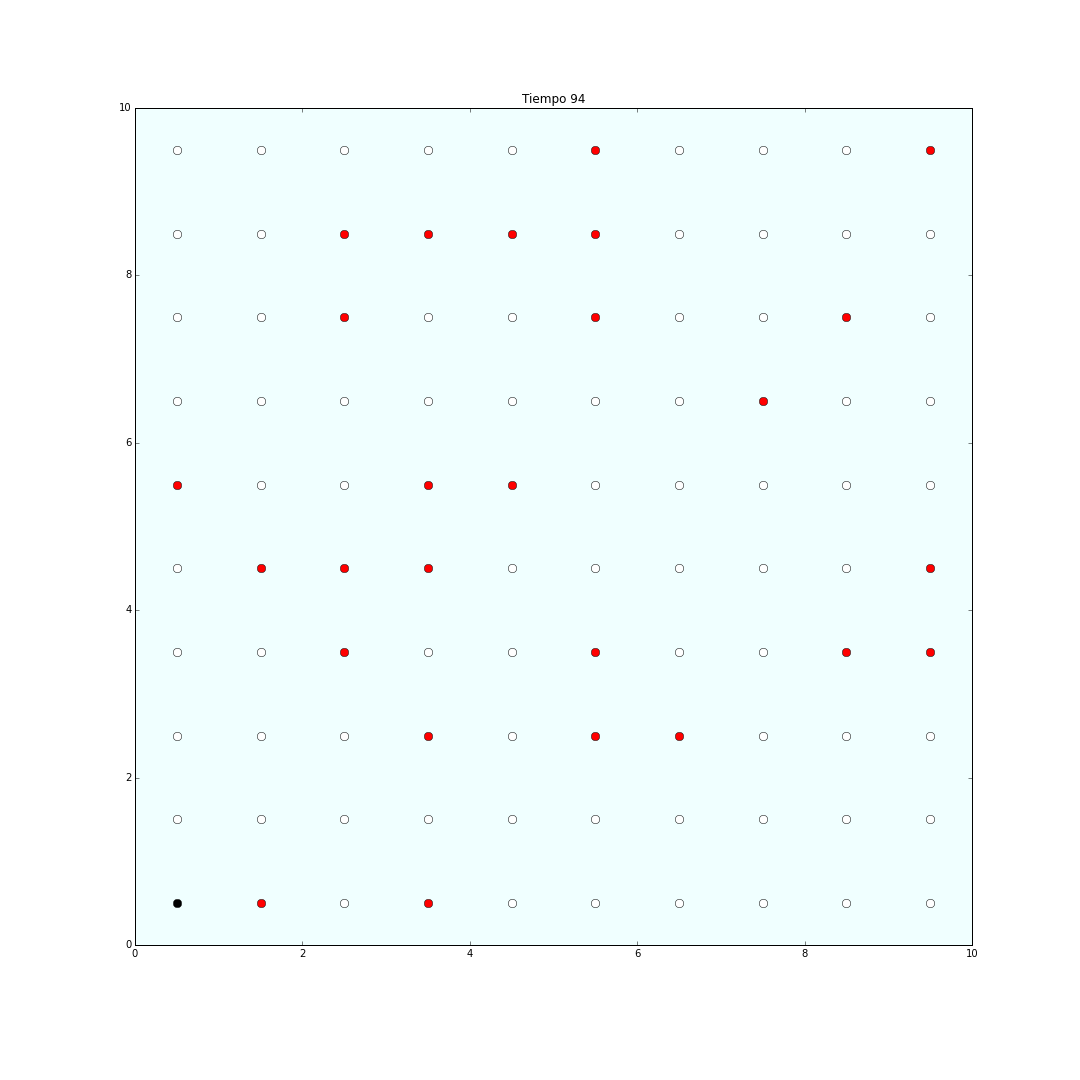
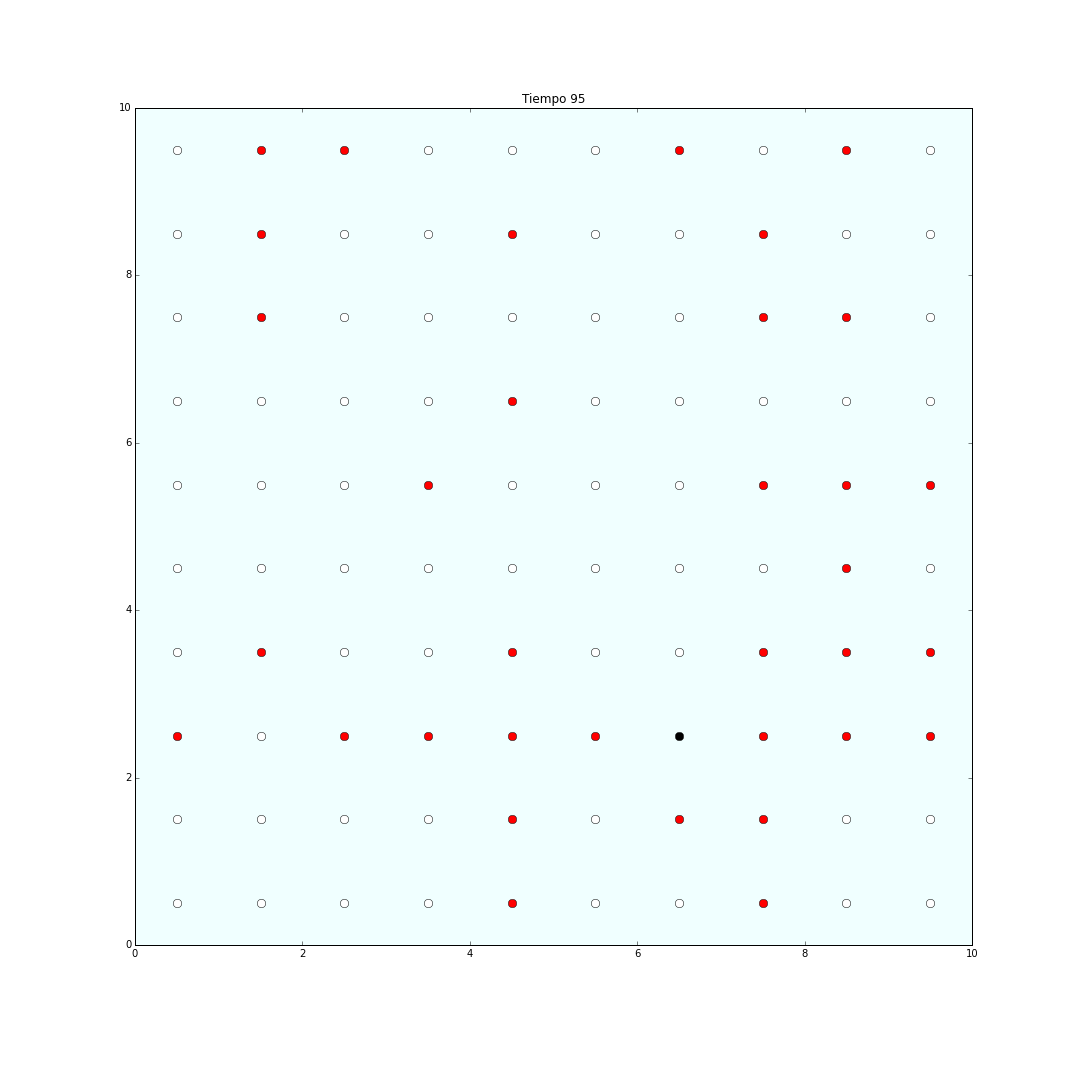
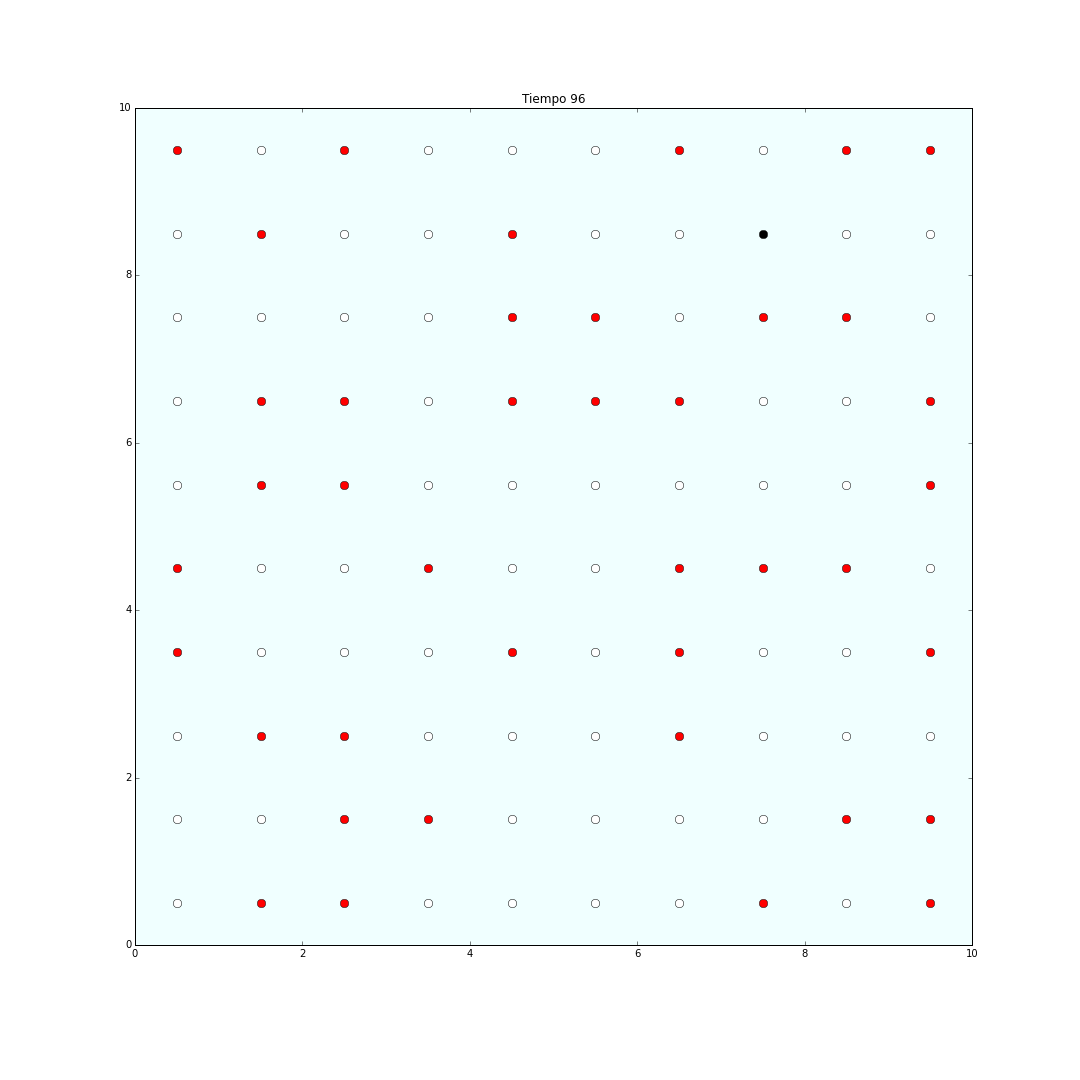
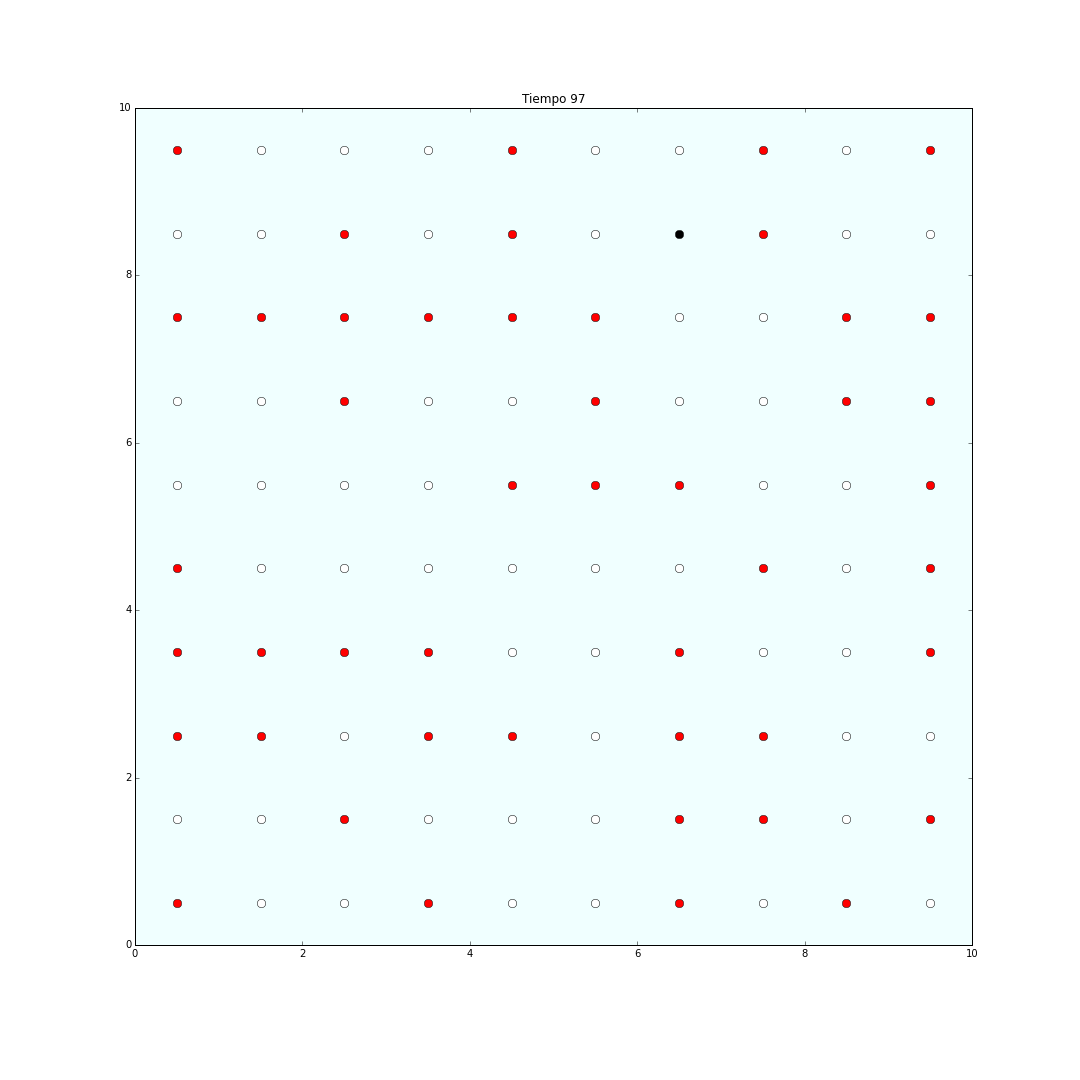
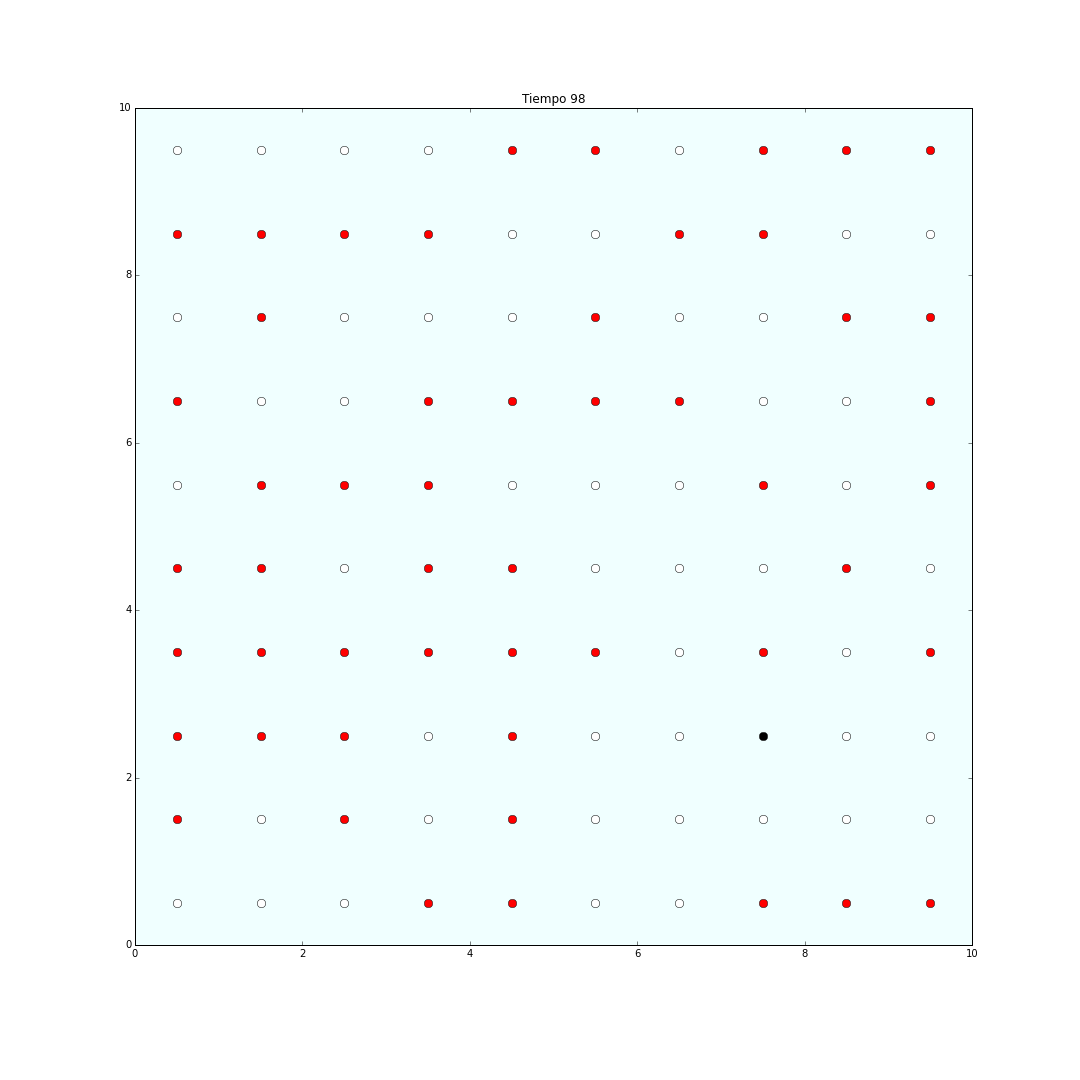
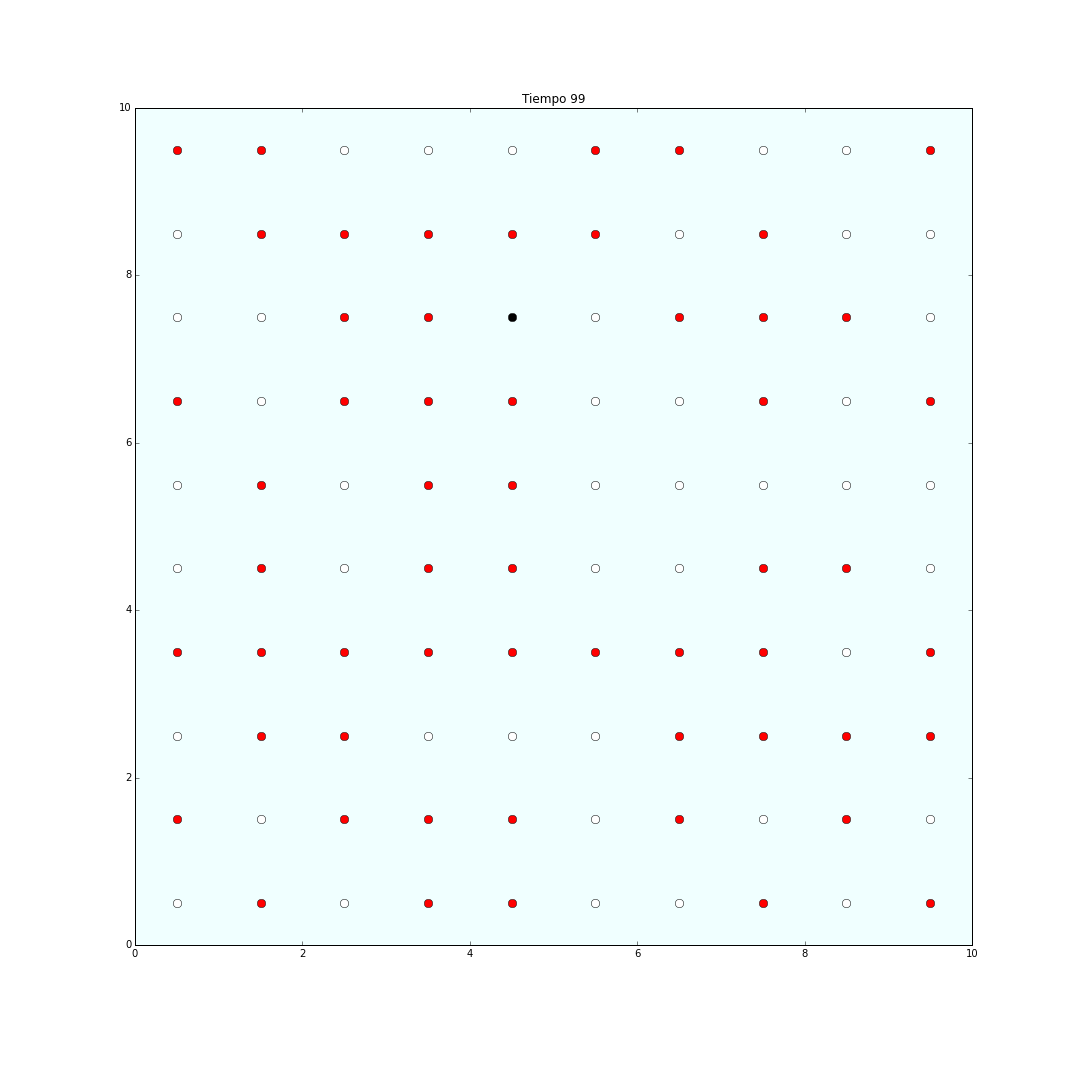

In [23]:
agentes = [Agente(tipo=0,locacion = pos[0][i]) for i in range(len(pos[0]))]
agentes.extend(Agente(tipo=1,locacion= pos[1][i]) for i in range(len(pos[1])))
agentes.extend(Agente(tipo=2,locacion= pos[2][i]) for i in range(len(pos[2])))
sin_chiste = Mundo2(agentes = agentes,ar_negra = area_negra,ar_blanca=area_blanca,ar_fertil=area_fertil, steps = 100)
sin_chiste.simular()

list

In [19]:
class Agente:
    """ Agente general """
    def __init__(self, tipo, locacion):
        self.tipo = tipo
        self.locacion = np.array(locacion)
     
    def actualizar(self, tipo,locacion):
        self.tipo = tipo
        self.locacion = np.array(locacion)

In [21]:
class Mundo2:
    def __init__(self, agentes,ar_negra,ar_blanca,ar_fertil, ancho=15, alto=15, steps=100):
        self.agentes = agentes
        self.ancho = ancho
        self.alto = alto
        self.steps = steps
        self.ar_negra = ar_negra
        self.ar_blanca = ar_blanca
        self.ar_fertil = ar_fertil
        self.init_anim()
            
    def init_anim(self):
        self.fig = plt.figure(figsize=(self.ancho, self.alto))
        self.ax = plt.axes(xlim=(0, 10), ylim=(0, 10))
        self.ax.set_axis_bgcolor('azure')
        plot_args = {'markersize' : 8, 'alpha' : 1}
        self.puntos_0, = self.ax.plot([], [], 'o', markerfacecolor='white', **plot_args)
        self.puntos_1, = self.ax.plot([], [], 'o', markerfacecolor='black', **plot_args)
        self.puntos_2, = self.ax.plot([], [], 'o', markerfacecolor='red', **plot_args)

    def dibujar(self, step):
        x_values_0, y_values_0 = [], []
        x_values_1, y_values_1 = [], []
        x_values_2, y_values_2 = [], []
        for agente in self.agentes:
            x, y = agente.locacion
            if agente.tipo == 0:
                x_values_0.append(x)
                y_values_0.append(y)
                
            if agente.tipo == 1:
                    x_values_1.append(x)
                    y_values_1.append(y)
            if agente.tipo == 2:
                    x_values_2.append(x)
                    y_values_2.append(y)        
            
        self.puntos_0.set_data(x_values_1, y_values_1)
        self.puntos_1.set_data(x_values_0, y_values_0)
        self.puntos_2.set_data(x_values_2, y_values_2)
       
        self.ax.set_title('Tiempo {}'.format(step))
        
        return 
       
    def actualizar(self, step):   
        self.dibujar(step) # Dibuja el mundo 
        pos = obtener_posiciones(self.ar_negra,self.ar_blanca,self.ar_fertil,step)
        for i in range(len(pos[0])):
            self.agentes[i].actualizar(0,pos[0][i])
        for i in range(len(pos[1])):
            self.agentes[i+len(pos[0])].actualizar(1,pos[1][i])
        for i in range(len(pos[2])):
            self.agentes[i+len(pos[0])+len(pos[1])].actualizar(2,pos[2][i])
            
            
    
    def clean_screen(self):
        self.puntos_0.set_data([], [])
        self.puntos_1.set_data([], [])
        self.puntos_2.set_data([], [])
        
        return 
          
    def simular(self):
        anim = animation.FuncAnimation(self.fig, self.actualizar, init_func=self.clean_screen, frames=self.steps, interval=100, blit=True)
        return anim